In [1]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression

import xgboost
from xgboost import XGBRegressor

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter
from sklearn.gaussian_process import GaussianProcessRegressor
from copy import deepcopy
import matplotlib
import numpy as np
import math
import random
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt

def performance_metric(y_true, y_predict):
    score = -r2_score(y_true,y_predict)
    return score

In [13]:
1- admet[:,2]

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [12]:
admet

array([[0, 1, 1, 0, 0],
       [0, 1, 1, 0, 0],
       [0, 1, 1, 0, 1],
       ...,
       [0, 1, 0, 0, 1],
       [0, 1, 0, 0, 1],
       [0, 1, 1, 0, 1]], dtype=int64)

In [14]:
MD = pd.read_csv("MD_mRMR__.csv")
ADMET = pd.read_excel("ADMET.xlsx")
admet = ADMET.iloc[:,1:6].values
Act = pd.read_excel("ERα_activity.xlsx", sheet_name=0)
pIC50 = Act.iloc[:, 2].values
MD['pIC50'] = pIC50
MD['ADMET'] = admet[:,0] + admet[:,1] + (1- admet[:,2]) + admet[:,3]  + (1- admet[:,4])
MD

,MDEC-23,C1SP2,SHsOH,maxssO,minsOH,LipoaffinityIndex,MLFER_A,nHBAcc,ndssC,minsssN,...,MDEO-12,SsOH,MDEC-33,SHBint10,minHBint5,MLFER_S,XLogP,minHBint10,pIC50,ADMET
0,28.277932,0,0.469126,6.593009,9.968948,11.830949,0.546,1,0,2.516142,...,0.269680,9.968948,9.238227,0.000000,3.092949,2.288,4.666,0.000000,8.602060,2
1,31.076748,0,0.449126,6.674642,10.058948,13.149974,0.546,1,0,2.521244,...,0.269680,10.058948,9.238227,0.000000,2.997752,2.288,5.804,0.000000,8.124939,2
2,30.901064,0,0.997247,6.502751,9.752886,10.577177,1.089,1,0,2.484448,...,0.495846,19.730394,10.328977,9.842059,3.125957,2.901,2.964,4.688339,8.508638,1
3,30.570001,0,0.456486,6.622142,10.025028,13.212767,0.546,1,0,2.519774,...,0.269680,10.025028,8.529910,0.000000,3.022916,2.288,6.015,0.000000,8.408935,2
4,30.570001,0,0.473631,6.552810,9.993342,12.489691,0.546,1,0,2.504217,...,0.269680,9.993342,8.529910,0.000000,3.103616,2.603,4.462,0.000000,8.130768,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,45.421854,0,1.014091,6.299676,9.808143,10.292932,1.089,3,2,0.000000,...,1.933548,19.671114,17.109186,17.160557,0.000000,3.627,2.526,2.986389,6.131944,1
1970,45.421854,0,2.095765,6.260832,9.696786,7.884092,2.175,3,2,0.000000,...,1.906625,39.000194,17.109186,17.177035,0.000000,3.901,1.884,2.974232,5.850781,1
1971,44.466435,0,2.118206,6.247428,9.645181,7.965074,2.175,3,2,0.000000,...,1.850440,38.871608,16.351392,23.334095,0.000000,3.901,1.884,2.956091,7.721246,2
1972,32.179316,0,1.065131,6.182281,9.668706,6.236558,1.089,3,2,0.000000,...,1.666336,19.375230,13.747820,17.182692,0.000000,2.841,0.782,2.970346,7.886057,2


In [125]:
MD3 = MD
MD3['A'] = admet[:,0]
MD3['D'] = admet[:,1]
MD3['M'] = admet[:,2]
MD3['E'] = admet[:,3]
MD3['T'] = admet[:,4]
MD3

,MDEC-23,C1SP2,SHsOH,maxssO,minsOH,LipoaffinityIndex,MLFER_A,nHBAcc,ndssC,minsssN,...,MLFER_S,XLogP,minHBint10,pIC50,ADMET,A,D,M,E,T
0,28.277932,0,0.469126,6.593009,9.968948,11.830949,0.546,1,0,2.516142,...,2.288,4.666,0.000000,8.602060,2,0,1,1,0,0
1,31.076748,0,0.449126,6.674642,10.058948,13.149974,0.546,1,0,2.521244,...,2.288,5.804,0.000000,8.124939,2,0,1,1,0,0
2,30.901064,0,0.997247,6.502751,9.752886,10.577177,1.089,1,0,2.484448,...,2.901,2.964,4.688339,8.508638,1,0,1,1,0,1
3,30.570001,0,0.456486,6.622142,10.025028,13.212767,0.546,1,0,2.519774,...,2.288,6.015,0.000000,8.408935,2,0,1,1,0,0
4,30.570001,0,0.473631,6.552810,9.993342,12.489691,0.546,1,0,2.504217,...,2.603,4.462,0.000000,8.130768,2,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,45.421854,0,1.014091,6.299676,9.808143,10.292932,1.089,3,2,0.000000,...,3.627,2.526,2.986389,6.131944,1,0,1,1,0,1
1970,45.421854,0,2.095765,6.260832,9.696786,7.884092,2.175,3,2,0.000000,...,3.901,1.884,2.974232,5.850781,1,0,1,1,0,1
1971,44.466435,0,2.118206,6.247428,9.645181,7.965074,2.175,3,2,0.000000,...,3.901,1.884,2.956091,7.721246,2,0,1,0,0,1
1972,32.179316,0,1.065131,6.182281,9.668706,6.236558,1.089,3,2,0.000000,...,2.841,0.782,2.970346,7.886057,2,0,1,0,0,1


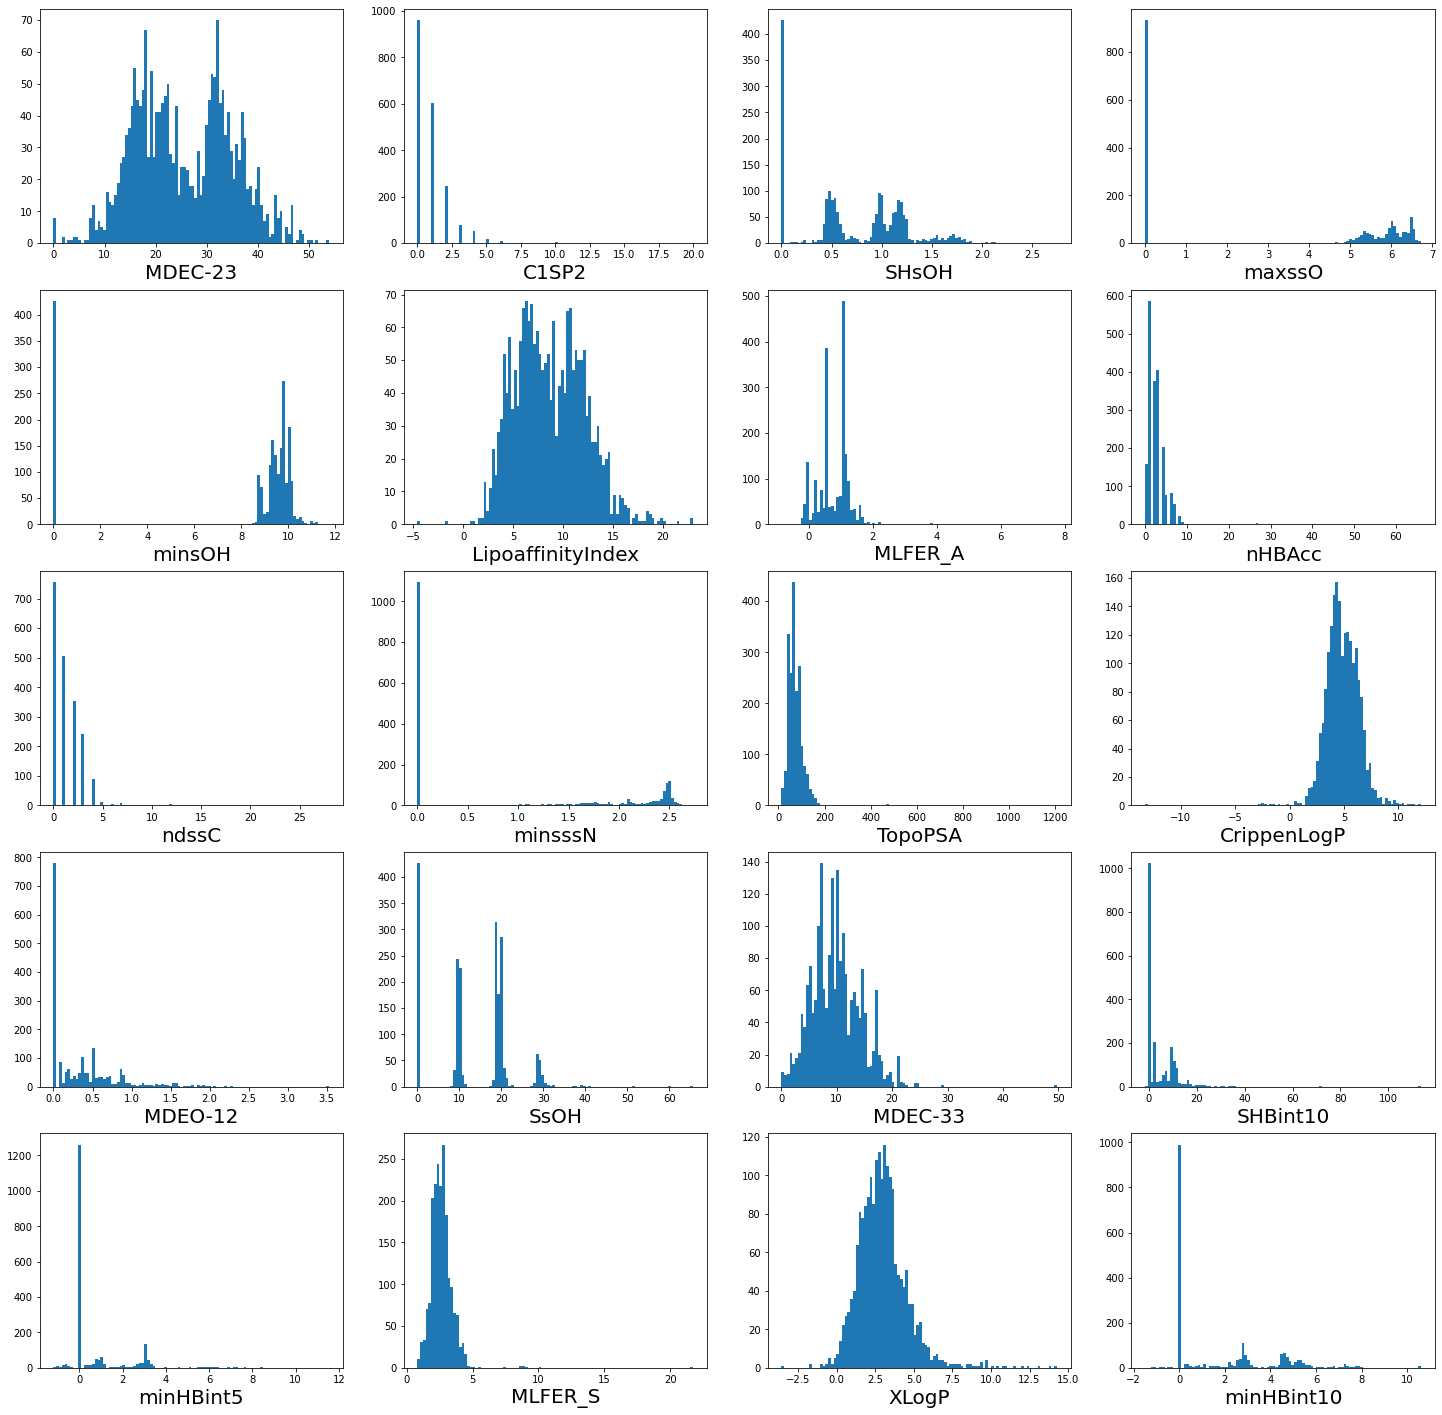

In [17]:
plt.figure(figsize=(25, 25))
for i in range(1, 21):
    plt.subplot(5, 4, i)
    plt.hist(MD.iloc[:,i-1], bins=100)
    plt.xlabel(MD.columns[i-1],fontsize=20)
plt.savefig('特征直方图.jpg',dpi = 600)


In [59]:
#对8 11 16 18进行离群值处理
print(f'对{MD.columns[7]},{MD.columns[10]},{MD.columns[15]},{MD.columns[17]}进行离群值处理')

对nHBAcc,TopoPSA,SHBint10,MLFER_S进行离群值处理


In [18]:
MD_ = MD
MD_ = MD_[MD_.loc[:,'nHBAcc'] < 10]
MD_ = MD_[MD_.loc[:,'TopoPSA'] < 500]
MD_ = MD_[MD_.loc[:,'MLFER_S'] < 10]
MD_ = MD_[MD_.loc[:,'SHBint10'] < 40]
MD_

,MDEC-23,C1SP2,SHsOH,maxssO,minsOH,LipoaffinityIndex,MLFER_A,nHBAcc,ndssC,minsssN,...,MDEO-12,SsOH,MDEC-33,SHBint10,minHBint5,MLFER_S,XLogP,minHBint10,pIC50,ADMET
0,28.277932,0,0.469126,6.593009,9.968948,11.830949,0.546,1,0,2.516142,...,0.269680,9.968948,9.238227,0.000000,3.092949,2.288,4.666,0.000000,8.602060,2
1,31.076748,0,0.449126,6.674642,10.058948,13.149974,0.546,1,0,2.521244,...,0.269680,10.058948,9.238227,0.000000,2.997752,2.288,5.804,0.000000,8.124939,2
2,30.901064,0,0.997247,6.502751,9.752886,10.577177,1.089,1,0,2.484448,...,0.495846,19.730394,10.328977,9.842059,3.125957,2.901,2.964,4.688339,8.508638,1
3,30.570001,0,0.456486,6.622142,10.025028,13.212767,0.546,1,0,2.519774,...,0.269680,10.025028,8.529910,0.000000,3.022916,2.288,6.015,0.000000,8.408935,2
4,30.570001,0,0.473631,6.552810,9.993342,12.489691,0.546,1,0,2.504217,...,0.269680,9.993342,8.529910,0.000000,3.103616,2.603,4.462,0.000000,8.130768,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,45.421854,0,1.014091,6.299676,9.808143,10.292932,1.089,3,2,0.000000,...,1.933548,19.671114,17.109186,17.160557,0.000000,3.627,2.526,2.986389,6.131944,1
1970,45.421854,0,2.095765,6.260832,9.696786,7.884092,2.175,3,2,0.000000,...,1.906625,39.000194,17.109186,17.177035,0.000000,3.901,1.884,2.974232,5.850781,1
1971,44.466435,0,2.118206,6.247428,9.645181,7.965074,2.175,3,2,0.000000,...,1.850440,38.871608,16.351392,23.334095,0.000000,3.901,1.884,2.956091,7.721246,2
1972,32.179316,0,1.065131,6.182281,9.668706,6.236558,1.089,3,2,0.000000,...,1.666336,19.375230,13.747820,17.182692,0.000000,2.841,0.782,2.970346,7.886057,2


In [126]:
MD3_ = MD3
MD3_ = MD3_[MD3_.loc[:,'nHBAcc'] < 10]
MD3_ = MD3_[MD3_.loc[:,'TopoPSA'] < 500]
MD3_ = MD3_[MD3_.loc[:,'MLFER_S'] < 10]
MD3_ = MD3_[MD3_.loc[:,'SHBint10'] < 40]
MD3_

,MDEC-23,C1SP2,SHsOH,maxssO,minsOH,LipoaffinityIndex,MLFER_A,nHBAcc,ndssC,minsssN,...,MLFER_S,XLogP,minHBint10,pIC50,ADMET,A,D,M,E,T
0,28.277932,0,0.469126,6.593009,9.968948,11.830949,0.546,1,0,2.516142,...,2.288,4.666,0.000000,8.602060,2,0,1,1,0,0
1,31.076748,0,0.449126,6.674642,10.058948,13.149974,0.546,1,0,2.521244,...,2.288,5.804,0.000000,8.124939,2,0,1,1,0,0
2,30.901064,0,0.997247,6.502751,9.752886,10.577177,1.089,1,0,2.484448,...,2.901,2.964,4.688339,8.508638,1,0,1,1,0,1
3,30.570001,0,0.456486,6.622142,10.025028,13.212767,0.546,1,0,2.519774,...,2.288,6.015,0.000000,8.408935,2,0,1,1,0,0
4,30.570001,0,0.473631,6.552810,9.993342,12.489691,0.546,1,0,2.504217,...,2.603,4.462,0.000000,8.130768,2,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,45.421854,0,1.014091,6.299676,9.808143,10.292932,1.089,3,2,0.000000,...,3.627,2.526,2.986389,6.131944,1,0,1,1,0,1
1970,45.421854,0,2.095765,6.260832,9.696786,7.884092,2.175,3,2,0.000000,...,3.901,1.884,2.974232,5.850781,1,0,1,1,0,1
1971,44.466435,0,2.118206,6.247428,9.645181,7.965074,2.175,3,2,0.000000,...,3.901,1.884,2.956091,7.721246,2,0,1,0,0,1
1972,32.179316,0,1.065131,6.182281,9.668706,6.236558,1.089,3,2,0.000000,...,2.841,0.782,2.970346,7.886057,2,0,1,0,0,1


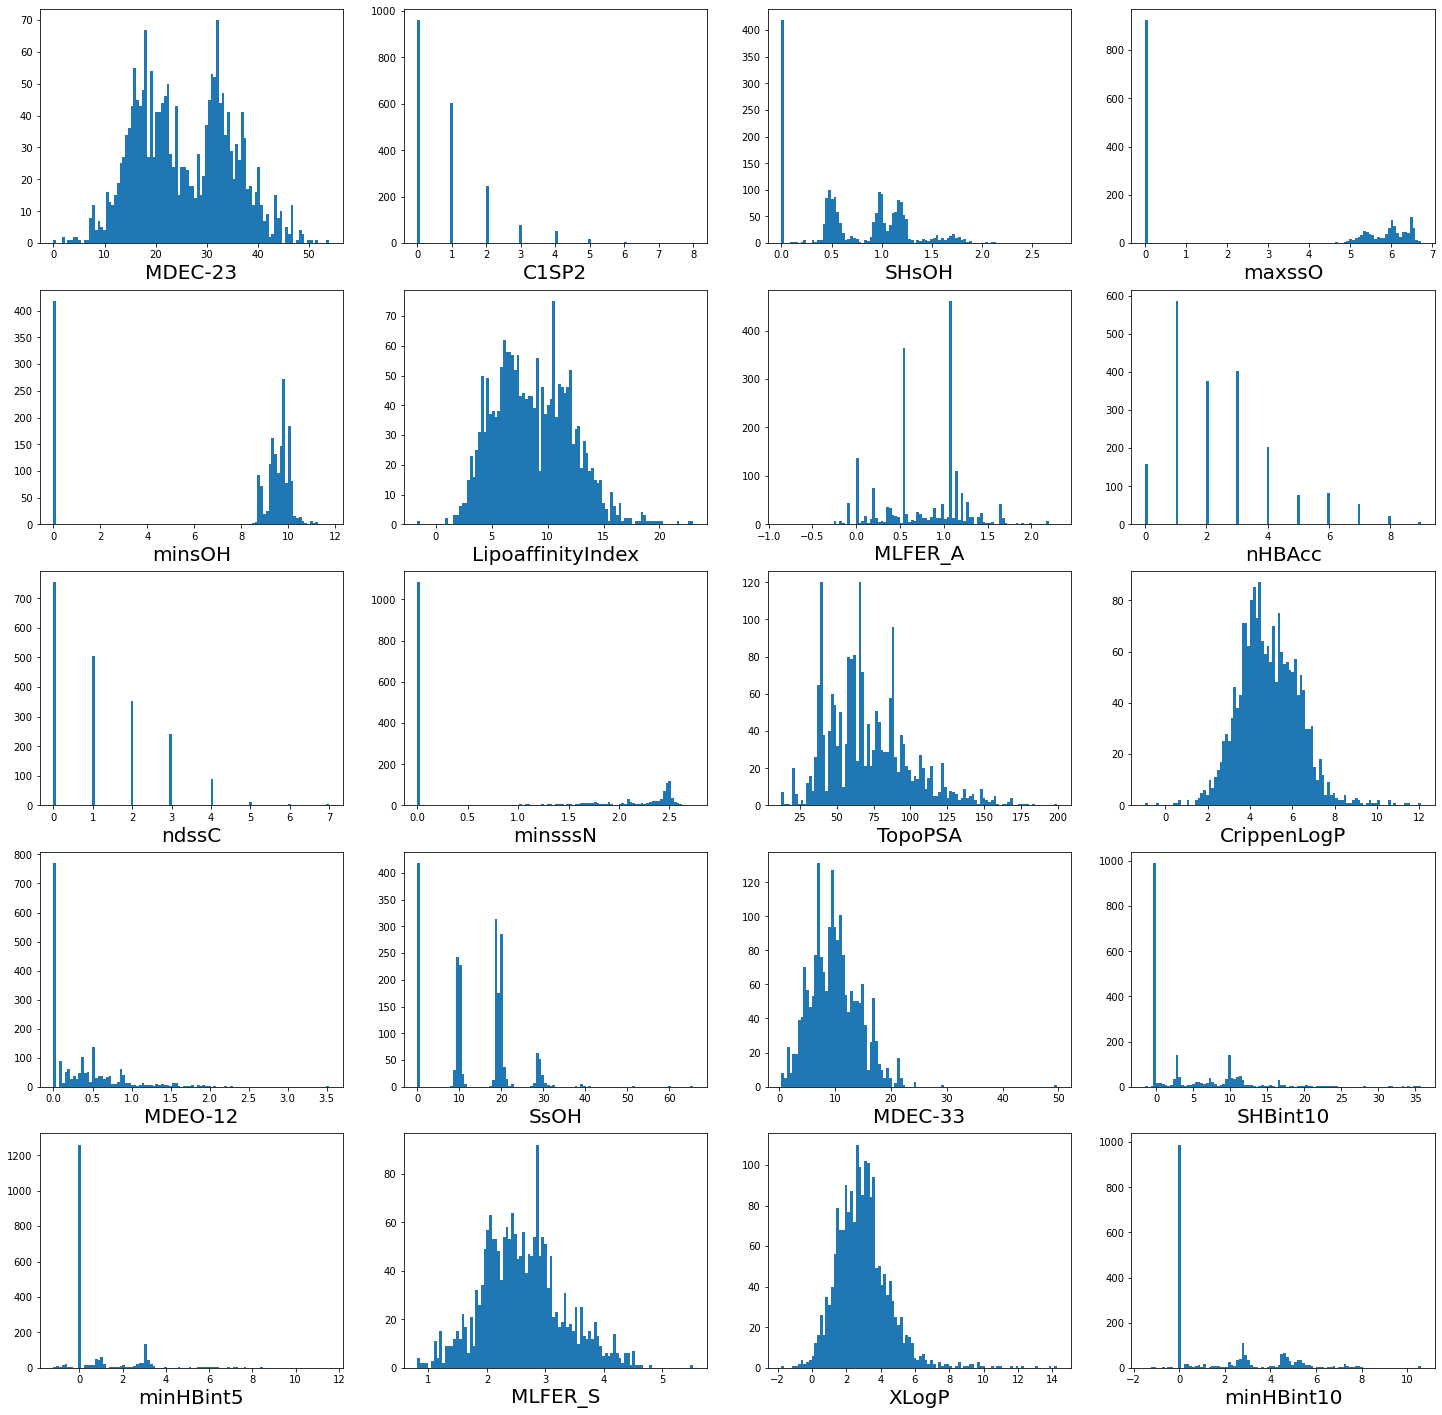

In [20]:
plt.figure(figsize=(25, 25))
for i in range(1, 21):
    plt.subplot(5, 4, i)
    plt.hist(MD_.iloc[:,i-1], bins=100)
    plt.xlabel(MD.columns[i-1],fontsize=20)
plt.savefig('处理后特征直方图.jpg',dpi = 600)


In [21]:
MD__ = MD_
MD__ = MD__[MD__.loc[:,'ADMET'] >= 3]
MD__.sort_values("pIC50",inplace=True, ascending = False)

D:\anaconda3\envs\pytorch\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [184]:
MD3__ = MD3_
MD3__ = MD3__[MD3__.loc[:,'ADMET'] >= 3]
MD3__.sort_values("pIC50",inplace=True, ascending = False)
MD3__.iloc[:50,:]

D:\anaconda3\envs\pytorch\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,MDEC-23,C1SP2,SHsOH,maxssO,minsOH,LipoaffinityIndex,MLFER_A,nHBAcc,ndssC,minsssN,...,MLFER_S,XLogP,minHBint10,pIC50,ADMET,A,D,M,E,T
1569,27.600881,1,0.703337,0.000000,8.801599,12.073950,0.962,4,1,1.797587,...,2.213,3.126,2.335719,9.860121,3,1,1,1,1,1
236,43.651140,1,0.976266,0.000000,9.779280,10.516141,1.089,4,2,1.922732,...,4.354,2.855,4.510976,9.337242,3,0,1,0,1,1
1513,33.227507,2,1.267040,6.051023,8.772873,9.971727,1.134,3,4,0.000000,...,3.508,4.125,0.000000,9.301030,3,0,1,0,1,1
237,43.711304,1,0.976711,0.000000,9.778265,10.535577,1.089,4,2,1.913835,...,4.354,2.855,4.512837,9.107905,3,0,1,0,1,1
1592,28.867717,0,0.529820,5.827329,9.686429,11.761859,0.546,1,2,2.100448,...,2.164,4.742,3.087433,8.886057,3,1,1,1,0,0
33,23.178146,0,0.756822,0.000000,9.677187,7.627875,0.891,1,0,0.000000,...,1.364,3.472,2.487539,8.886057,3,1,1,1,0,0
1422,22.998597,0,1.071096,0.000000,9.678853,5.792165,1.147,2,0,0.000000,...,1.632,2.871,2.487968,8.771856,4,1,1,0,0,0
246,43.494837,1,0.975751,0.000000,9.780452,10.479291,1.089,4,2,1.938229,...,4.354,3.066,4.508810,8.764472,3,0,1,0,1,1
1636,32.110597,0,0.970962,5.943681,9.779377,18.956315,1.021,2,1,0.000000,...,3.054,10.933,4.488797,8.744727,3,0,1,0,0,0
445,17.801928,0,1.605152,0.000000,9.381808,2.995065,2.002,1,3,0.000000,...,2.673,1.480,5.193228,8.698970,3,1,1,0,0,1


In [23]:
# 过采样
y_sa = MD__.iloc[0:150,-2].values
x_sa_ = MD__.iloc[0:150,:-2].values
tmp = np.r_[x_sa_,x_sa_]
tmpy = np.r_[y_sa,y_sa]
tmp = np.r_[tmp,tmp]
tmpy = np.r_[tmpy,tmpy]
# tmp = np.r_[tmp,tmp]
# tmpy = np.r_[tmpy,tmpy]
tmp.shape

(600, 20)

In [317]:
#初代的适应度和初代表现型
fit_0 = MD__.iloc[0:50,-2].values
population_0 = MD__.iloc[0:50,:-2].values
population_0

array([[ 33.68594064,   0.        ,   0.46736383,   5.96166044,
         10.03521242,  11.18832141,   0.546     ,   2.        ,
          1.        ,   2.46264435,  78.01      ,   6.44267   ,
          0.24618298,  10.03521242,  13.74918133,   0.38586515,
          0.        ,   3.124     ,   3.378     ,   0.38586515],
       [ 27.60088063,   1.        ,   0.70333706,   0.        ,
          8.80159931,  12.07395043,   0.962     ,   4.        ,
          1.        ,   1.79758745,  56.33      ,   5.24467   ,
          0.        ,   8.80159931,  17.19403733,   8.16061691,
          4.56746877,   2.213     ,   3.126     ,   2.33571913],
       [ 44.36966878,   0.        ,   0.4289435 ,   6.29542697,
         10.19166349,  14.06929298,   0.546     ,   1.        ,
          2.        ,   2.28250811,  41.93      ,   6.80081   ,
          0.19069252,  10.19166349,  14.68666173,   2.70038249,
          0.        ,   2.571     ,   5.901     ,   2.70038249],
       [ 45.80225527,   0.        ,  

In [405]:
#min_max标准化
min_max_scaler = preprocessing.MinMaxScaler()
# population_p_0_minmax = min_max_scaler.fit_transform(population_0)

In [98]:
#还原
# min_max_scaler.inverse_transform(population_p_0_minmax)

array([[ 33.68594064,   0.        ,   0.46736383,   5.96166044,
         10.03521242,  11.18832141,   0.546     ,   2.        ,
          1.        ,   2.46264435,  78.01      ,   6.44267   ,
          0.24618298,  10.03521242,  13.74918133,   0.38586515,
          0.        ,   3.124     ,   3.378     ,   0.38586515],
       [ 27.60088063,   1.        ,   0.70333706,   0.        ,
          8.80159931,  12.07395043,   0.962     ,   4.        ,
          1.        ,   1.79758745,  56.33      ,   5.24467   ,
          0.        ,   8.80159931,  17.19403733,   8.16061691,
          4.56746877,   2.213     ,   3.126     ,   2.33571913],
       [ 44.36966878,   0.        ,   0.4289435 ,   6.29542697,
         10.19166349,  14.06929298,   0.546     ,   1.        ,
          2.        ,   2.28250811,  41.93      ,   6.80081   ,
          0.19069252,  10.19166349,  14.68666173,   2.70038249,
          0.        ,   2.571     ,   5.901     ,   2.70038249],
       [ 45.80225527,   0.        ,  

0.8024318084870692

D:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 39044 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 30495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 23454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 39044 missing 

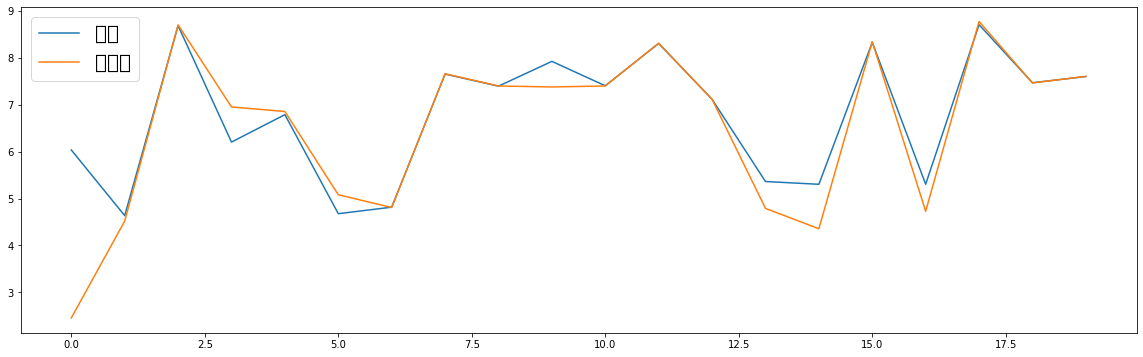

In [24]:
#活性预测模型验证
# M1_ = RandomForestRegressor(n_estimators = 1000)
# M2_ = XGBRegressor(n_estimators = 1000)
M2_ = RandomForestRegressor(n_estimators = 1000)
M1_ = XGBRegressor(n_estimators = 1000)

X_ = MD__.iloc[:,:20].values
Y_ = MD__.iloc[:,-2].values
X__ = np.r_[tmp, X_]
Y = np.r_[tmpy, Y_]

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X__)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.9,test_size=0.1)
M1_.fit(X_train, Y_train) 
M2_.fit(X_train, Y_train)

Y_pre1 = M1_.predict(X_test)
Y_pre2 = M2_.predict(X_test)
Y_pre = (Y_pre1 + Y_pre2)/2
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(20)
line1, = ax.plot(Y_pre[:20],label='预测')
line2, =ax.plot(Y_test[:20],label='真实值')
plt.legend(fontsize=20)
-performance_metric(Y_test,Y_pre)

0.9587323567748085

D:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 39044 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 30495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 23454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 39044 missing 

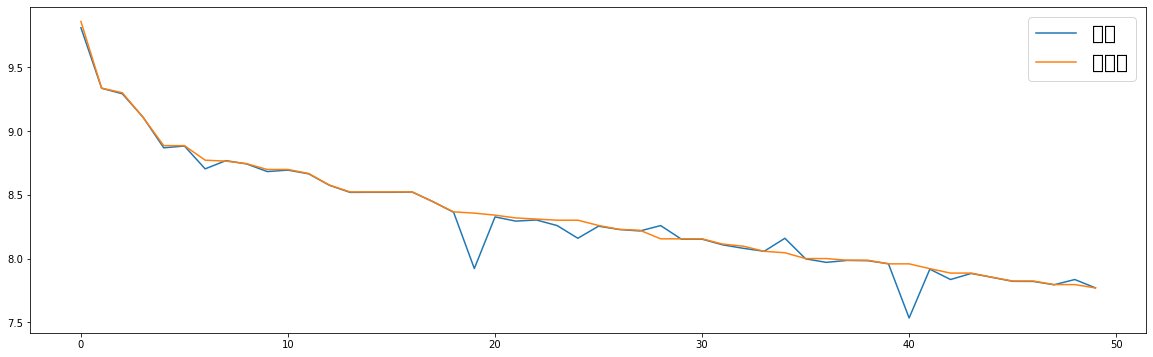

In [28]:
#初代的适应度和初代表现型
fit_0 = MD__.iloc[0:50,-2].values
population_0 = MD__.iloc[0:50,:-2].values
population_p_0_minmax = min_max_scaler.transform(population_0)

f1 = M1_.predict(population_p_0_minmax)
f2 = M2_.predict(population_p_0_minmax)
ff = (f1+f2) /2

f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(20)
line1, = ax.plot(ff,label='预测')
line2, =ax.plot(fit_0,label='真实值')
plt.legend(fontsize=20)
-performance_metric(ff,fit_0)

In [27]:
#初代的适应度和初代表现型
fit_0 = MD__.iloc[0:50,-2].values
population_0 = MD__.iloc[0:50,:-2].values
population_0

f1 = M1.predict(population_p_0_minmax)
f2 = M2.predict(population_p_0_minmax)
ff = (f1+f2) /2

f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(20)
line1, = ax.plot(ff,label='预测')
line2, =ax.plot(fit_0,label='真实值')
plt.legend(fontsize=20)
-performance_metric(ff,fit_0)

NameError: name 'population_p_0_minmax' is not defined

In [114]:
#活性预测模型建立
M2 = RandomForestRegressor(n_estimators = 1000)
M1 = XGBRegressor(n_estimators = 1000)

X_ = MD__.iloc[:,:20].values
Y_ = MD__.iloc[:,-2].values
X__ = np.r_[tmp, X_]
Y = np.r_[tmpy, Y_]

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X__)

M1.fit(X, Y) 
M2.fit(X, Y)

fit_0 = MD__.iloc[0:50,-2].values
population_0 = MD__.iloc[0:50,:-2].values
population_p_0_minmax = min_max_scaler.transform(population_0)

0.9494896378607047

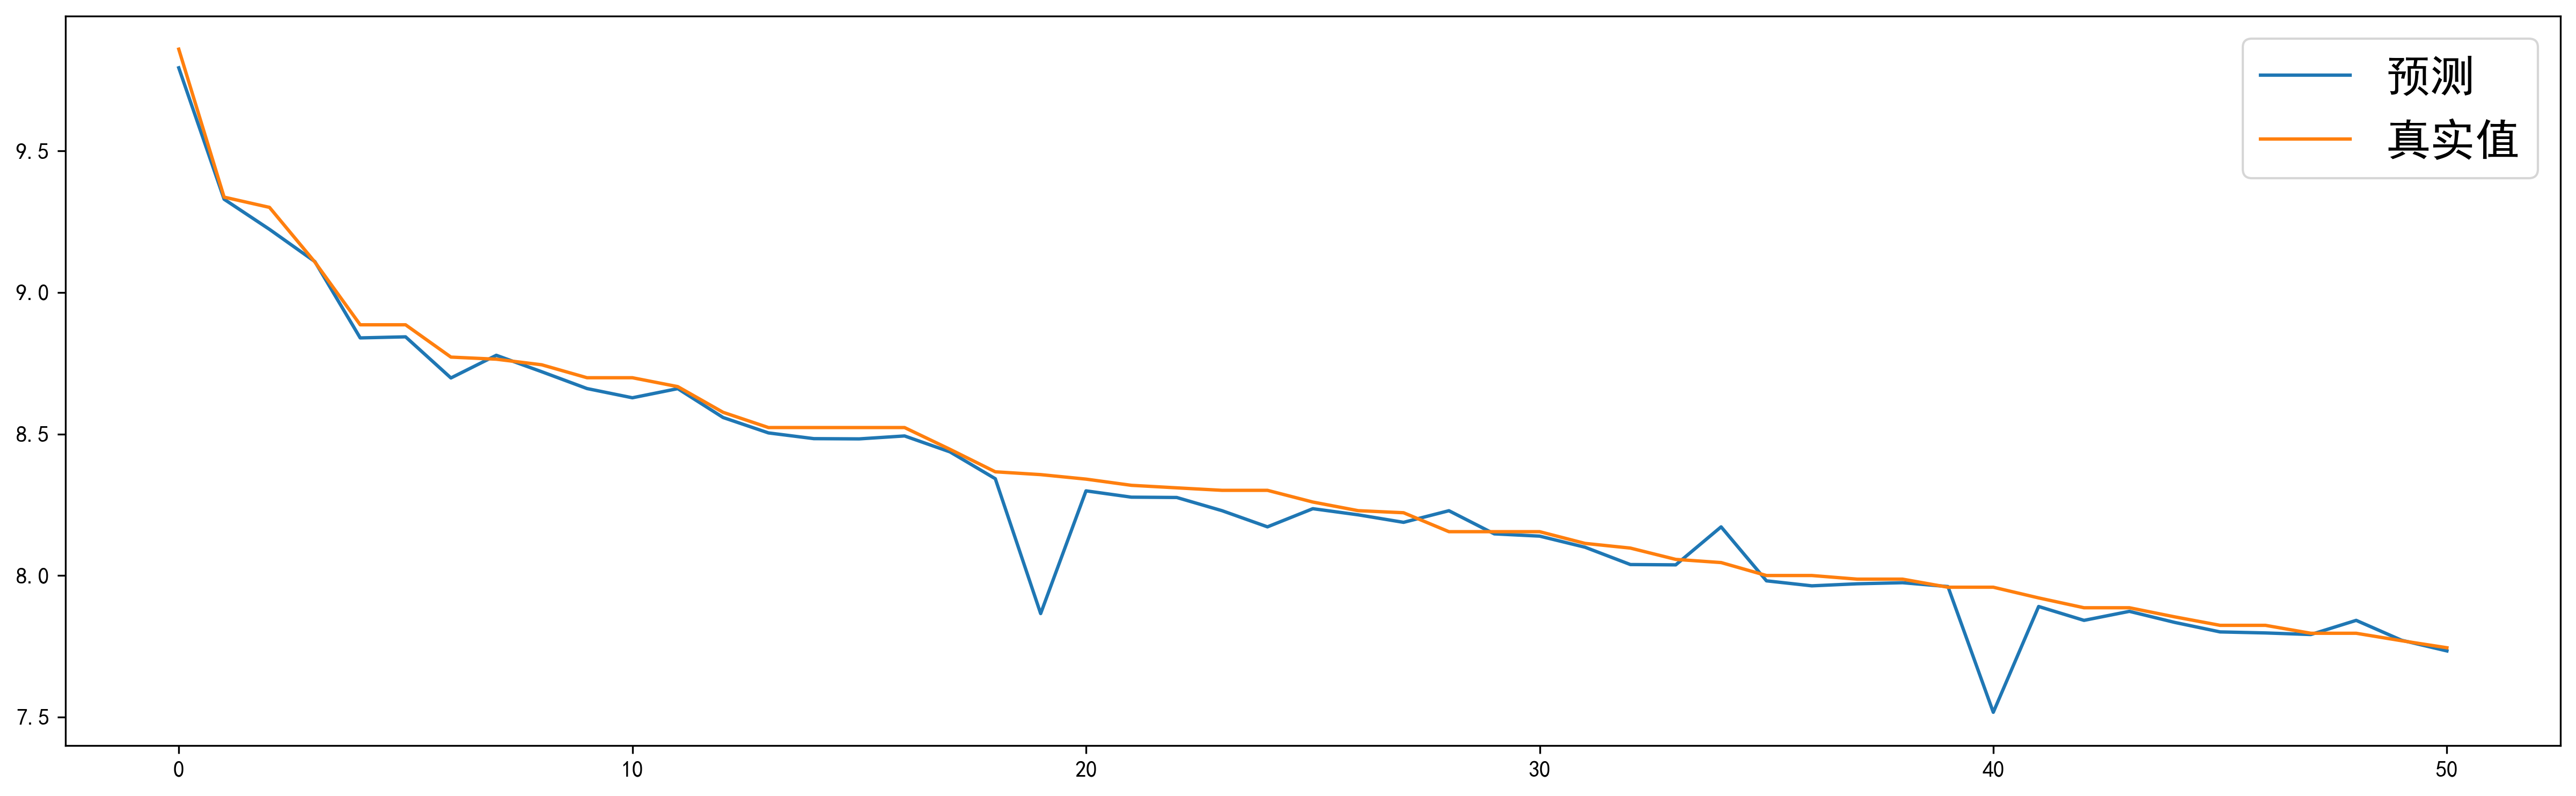

In [430]:
f1 = M1.predict(population_p_0_minmax)
f2 = M2.predict(population_p_0_minmax)
ff = (f1+f2) /2

f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(20)
line1, = ax.plot(ff,label='预测')
line2, =ax.plot(fit_0,label='真实值')
plt.legend(fontsize=20)
-performance_metric(ff,fit_0)

In [105]:
ADMET3 = pd.read_excel("ADMET.xlsx")
MD3 = pd.read_excel("Molecular_Descriptor.xlsx")
MD3

,SMILES,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,MW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5C...,0,-0.2860,0.081796,126.1188,74.170169,12,12,64,31,...,439.218115,64.771680,2.089409,15.471445,8.858910,3.406628,3011,47,4.666,166
1,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN...,0,-0.8620,0.743044,131.9420,80.357341,12,12,70,33,...,467.249415,68.960024,2.089698,15.486947,8.863774,3.406648,3516,54,5.804,174
2,Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN...,0,0.7296,0.532316,139.9304,74.064997,18,18,62,33,...,463.181729,68.748923,2.083301,18.011114,11.390412,3.406644,3542,52,2.964,176
3,Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCC...,0,-0.3184,0.101379,133.4822,80.357341,12,12,70,33,...,467.249415,68.883696,2.087385,15.468365,8.857943,3.406624,3594,50,6.015,174
4,Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCC...,0,1.3551,1.836296,143.1903,76.356583,18,18,64,33,...,461.202465,68.883696,2.087385,15.468365,8.857943,3.406624,3594,50,4.462,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,COc1cc(OC)cc(\C=C\c2cccc(OS(=O)(=O)C3CC4OC3C(=...,0,1.8193,3.309852,177.6817,89.159790,24,24,73,43,...,598.166139,88.709996,2.063023,25.470481,21.946991,0.000000,7121,70,2.526,236
1970,Oc1ccc(cc1)C2=C(C3OC2CC3S(=O)(=O)Oc4cccc(\C=C\...,0,1.6903,2.857114,167.6057,82.972618,24,24,67,41,...,570.134839,84.662088,2.064929,24.928962,21.405589,0.000000,6171,66,1.884,228
1971,Oc1ccc(cc1)C2=C(C3OC2CC3S(=O)(=O)Oc4ccc(\C=C\c...,0,1.6903,2.857114,167.6057,82.972618,24,24,67,41,...,570.134839,84.660642,2.064894,24.923083,21.400883,0.000000,6421,66,1.884,228
1972,Oc1ccc(cc1)C2=C([C@H]3O[C@H]2C[C@@H]3S(=O)(=O)...,0,1.3365,1.786232,125.5605,63.287860,18,18,51,31,...,436.098059,64.171346,2.070043,19.841924,16.326873,0.000000,2583,50,0.782,174


In [110]:
A = ADMET3.iloc[:,1].values
D = ADMET3.iloc[:,2].values
M = ADMET3.iloc[:,3].values
E = ADMET3.iloc[:,4].values
T = ADMET3.iloc[:,5].values
print(np.mean(A), np.mean(D), np.mean(M), np.mean(E), np.mean(T))
# X_un = MD3.iloc[:,1:].values
# # X = preprocessing.scale(X_un)
# X = X_un
# print(X.shape)

0.3844984802431611 0.7401215805471124 0.5567375886524822 0.25785207700101315 0.7669706180344478
(1974, 729)


In [233]:
X_T3 = MD3__.iloc[:50,:20].values
aa, dd, mm, ee, tt = admet_predict(X_T3)

In [234]:
aa

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [235]:
model1.predict(X_T3)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [236]:
A[:50]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0], dtype=int64)

In [203]:
MD3__.iloc[:50,-1]

1569    1
236     1
1513    1
237     1
1592    0
33      0
1422    0
246     1
1636    0
445     1
743     0
248     1
234     1
1485    0
1484    0
15      0
877     1
250     1
8       0
1625    0
1424    0
1050    0
1469    0
1051    0
1052    0
1621    0
1633    0
427     1
641     1
17      0
1061    0
1598    0
1493    1
1007    0
1063    0
1519    1
464     0
1010    0
462     0
12      0
1623    0
1829    1
1069    0
261     0
642     1
1527    1
885     1
1070    0
643     1
116     0
Name: T, dtype: int64

In [219]:
X_3_ = MD3_.iloc[:,:-7].values
X_3 = min_max_scaler.transform(X_3_)
A = MD3_.iloc[:,-5].values
D = MD3_.iloc[:,-4].values
M= MD3_.iloc[:,-3].values
E= MD3_.iloc[:,-2].values
T = MD3_.iloc[:,-1].values

In [215]:
MD3_.sort_values("pIC50",inplace=True, ascending = False)
MD3_

,MDEC-23,C1SP2,SHsOH,maxssO,minsOH,LipoaffinityIndex,MLFER_A,nHBAcc,ndssC,minsssN,...,MLFER_S,XLogP,minHBint10,pIC50,ADMET,A,D,M,E,T
1840,33.685941,0,0.467364,5.961660,10.035212,11.188321,0.546,2,1,2.462644,...,3.124,3.378,0.385865,10.337242,1,0,1,1,0,1
1919,37.205868,0,0.924225,6.467811,10.057063,11.991200,1.089,1,2,2.499274,...,2.806,3.662,2.771615,10.000000,2,0,1,1,0,0
1925,37.450089,0,0.982895,6.477313,9.803002,12.047303,1.089,1,2,2.501632,...,2.806,3.451,4.620754,10.000000,2,0,1,1,0,0
1569,27.600881,1,0.703337,0.000000,8.801599,12.073950,0.962,4,1,1.797587,...,2.213,3.126,2.335719,9.860121,3,1,1,1,1,1
1500,34.010477,1,1.227242,0.000000,8.804754,10.319321,1.134,2,3,0.000000,...,2.212,5.973,0.000000,9.823909,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946,42.757570,0,0.000000,0.000000,0.000000,11.556413,0.003,3,2,0.000000,...,2.571,3.766,0.000000,3.316683,1,0,1,1,0,1
1940,37.661741,0,0.000000,0.000000,0.000000,13.057484,0.003,3,2,0.000000,...,2.491,4.358,0.000000,3.231221,1,0,1,1,0,1
1413,21.300380,0,1.389669,6.072610,9.469654,5.083523,1.637,2,1,0.000000,...,2.684,1.456,3.017697,3.000000,3,1,1,0,0,1
1415,7.845398,1,0.635225,0.000000,10.274127,4.089319,0.949,3,1,0.000000,...,1.080,1.511,0.000000,2.552842,3,0,1,0,0,0


In [180]:
population_p_0_minmax[0]

array([0.61530423, 0.16666667, 0.29837917, 0.        , 0.78273155,
       0.61999271, 0.49591837, 0.44444444, 0.14285714, 0.70363803,
       0.23465839, 0.49697625, 0.        , 0.17071875, 0.69988576,
       0.23220247, 0.58317505, 0.3666318 , 0.34273447, 0.30218455])

In [182]:
A

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [140]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth = 2, label=label)
    plt.plot([0,1], [0,1],'k--')

In [153]:
def admet_predict(AA):
    pre_a1 = model_a1.predict(AA)
    pre_a2 = model_a2.predict(AA)
    pre_a3 = model_a3.predict(AA)
    pre_d1 = model_d1.predict(AA)
    pre_d2 = model_d2.predict(AA)
    pre_d3 = model_d3.predict(AA)
    pre_e1 = model_e1.predict(AA)
    pre_e2 = model_e2.predict(AA)
    pre_e3 = model_e3.predict(AA)
    pre_m1 = model_m1.predict(AA)
    pre_m2 = model_m2.predict(AA)
    pre_m3 = model_m3.predict(AA)
    pre_t1 = model_t1.predict(AA)
    pre_t2 = model_t2.predict(AA)
    pre_t3 = model_t3.predict(AA)

    pre_a = [0]*len(pre_a1)
    for i in range(len(pre_a1)):
            if pre_a1[i] + pre_a2[i] + pre_a3[i] <= 1:
                pre_a[i] = 0
            else:
                pre_a[i] = 1
    pre_d = [0]*len(pre_d1)
    for i in range(len(pre_d1)):
            if pre_d1[i] + pre_d2[i] + pre_d3[i] <= 1:
                pre_d[i] = 0
            else:
                pre_d[i] = 1
    pre_e = [0]*len(pre_e1)
    for i in range(len(pre_e1)):
            if pre_e1[i] + pre_e2[i] + pre_e3[i] <= 1:
                pre_e[i] = 0
            else:
                pre_e[i] = 1
    pre_m = [0]*len(pre_m1)
    for i in range(len(pre_m1)):
            if pre_m1[i] + pre_m2[i] + pre_m3[i] <= 1:
                pre_m[i] = 0
            else:
                pre_m[i] = 1
    pre_t = [0]*len(pre_t1)
    for i in range(len(pre_t1)):
            if pre_t1[i] + pre_t2[i] + pre_t3[i] <= 1:
                pre_t[i] = 0
            else:
                pre_t[i] = 1
    return pre_a, pre_d, pre_e, pre_m, pre_t

In [218]:
#投票法
Y = A
# model = RandomForestClassifier(n_estimators=500) #0.910
model1 = logistic = LogisticRegression(penalty='l2', 
            dual=False, 
            tol=0.0001, 
            C=1.0, 
            fit_intercept=True, 
            intercept_scaling=1, 
            class_weight=None, 
            random_state=None, 
            solver='liblinear', 
            max_iter=100, 
            multi_class='ovr', 
            verbose=0, 
            warm_start=False, 
            n_jobs=1)
model2 = RandomForestClassifier(n_estimators=500)
model3 = SVC(kernel='rbf')

X_,X__,Y_,Y__ = train_test_split(X_3,Y,train_size=0.9,test_size=0.1)
Loss = []
Score = []
P = []
R = []
kf=KFold(n_splits=10,shuffle=True)
for train_index,test_index in kf.split(X_):
    # print(train_index, test_index)
    train_X, train_y = X_[train_index,:], Y_[train_index]
    test_X, test_y = X_[test_index], Y_[test_index]
    X_resampled, Y_resampled = SMOTE().fit_resample(train_X, train_y)
    # X_resampled, Y_resampled = BorderlineSMOTE().fit_resample(train_X, train_y)
    model1.fit(X_resampled, Y_resampled)
    model2.fit(X_resampled, Y_resampled)
    model3.fit(X_resampled, Y_resampled)
    predit_y1 = model1.predict(test_X)
    predit_y2 = model2.predict(test_X)
    predit_y3 = model3.predict(test_X)
    loss = (log_loss(test_y,predit_y1) + log_loss(test_y,predit_y2) + log_loss(test_y,predit_y3))/3
    score = (accuracy_score(test_y,predit_y1) + accuracy_score(test_y,predit_y2) + accuracy_score(test_y,predit_y3))/3
    predit_y = [0] * len(predit_y1)
    for i in range(len(predit_y1)):
        if predit_y1[i] + predit_y2[i] + predit_y3[i] <= 1:
            predit_y[i] = 0
        else:
            predit_y[i] = 1

    p = precision_score(test_y, predit_y)
    r = recall_score(test_y, predit_y)
    Loss.append(loss)
    Score.append(score)
    P.append(p)
    R.append(r)
print(P)
print(R)
print(f'平均准确率为{np.mean(Score)}，平均对数损失为{np.mean(Loss)}')
print(f'平均精准度为{np.mean(P)}，平均召回率为{np.mean(R)}')
confusion_matrix(test_y, predit_y)

[0.7721518987341772, 0.7922077922077922, 0.8157894736842105, 0.9041095890410958, 0.8428571428571429, 0.859375, 0.8048780487804879, 0.7307692307692307, 0.7763157894736842, 0.8714285714285714]
[0.9242424242424242, 0.8133333333333334, 0.9253731343283582, 0.868421052631579, 0.9076923076923077, 0.8870967741935484, 0.88, 0.9047619047619048, 0.9076923076923077, 0.8472222222222222]
平均准确率为0.8725624892997775，平均对数损失为4.401601205543874
平均精准度为0.8169882536976392，平均召回率为0.8865835461097985


array([[95,  9],
       [11, 61]], dtype=int64)

In [209]:
X_train = X_3
#ADEMT
model_a1 = logistic = LogisticRegression(penalty='l2', 
            dual=False, 
            tol=0.0001, 
            C=1.0, 
            fit_intercept=True, 
            intercept_scaling=1, 
            class_weight=None, 
            random_state=None, 
            solver='liblinear', 
            max_iter=100, 
            multi_class='ovr', 
            verbose=0, 
            warm_start=False, 
            n_jobs=1) #0.924
model_a2 = RandomForestClassifier(n_estimators=500)
model_a3 = SVC(kernel='rbf')
model_d1 = logistic = LogisticRegression(penalty='l2', 
            dual=False, 
            tol=0.0001, 
            C=1.0, 
            fit_intercept=True, 
            intercept_scaling=1, 
            class_weight=None, 
            random_state=None, 
            solver='liblinear', 
            max_iter=100, 
            multi_class='ovr', 
            verbose=0, 
            warm_start=False, 
            n_jobs=1) #0.924
model_d2 = RandomForestClassifier(n_estimators=500)
model_d3 = SVC(kernel='rbf')
model_e1 = logistic = LogisticRegression(penalty='l2', 
            dual=False, 
            tol=0.0001, 
            C=1.0, 
            fit_intercept=True, 
            intercept_scaling=1, 
            class_weight=None, 
            random_state=None, 
            solver='liblinear', 
            max_iter=100, 
            multi_class='ovr', 
            verbose=0, 
            warm_start=False, 
            n_jobs=1) #0.924
model_e2 = RandomForestClassifier(n_estimators=500)
model_e3 = SVC(kernel='rbf')
model_m1 = logistic = LogisticRegression(penalty='l2', 
            dual=False, 
            tol=0.0001, 
            C=1.0, 
            fit_intercept=True, 
            intercept_scaling=1, 
            class_weight=None, 
            random_state=None, 
            solver='liblinear', 
            max_iter=100, 
            multi_class='ovr', 
            verbose=0, 
            warm_start=False, 
            n_jobs=1) #0.924
model_m2 = RandomForestClassifier(n_estimators=500)
model_m3 = SVC(kernel='rbf')
model_t1 = logistic = LogisticRegression(penalty='l2', 
            dual=False, 
            tol=0.0001, 
            C=1.0, 
            fit_intercept=True, 
            intercept_scaling=1, 
            class_weight=None, 
            random_state=None, 
            solver='liblinear', 
            max_iter=100, 
            multi_class='ovr', 
            verbose=0, 
            warm_start=False, 
            n_jobs=1) #0.924
model_t2 = RandomForestClassifier(n_estimators=500)
model_t3 = SVC(kernel='rbf')
model_a1.fit(X_train, A)
model_a2.fit(X_train, A)
model_a3.fit(X_train, A)
model_d1.fit(X_train, D)
model_d2.fit(X_train, D)
model_d3.fit(X_train, D)
model_e1.fit(X_train, E)
model_e2.fit(X_train, E)
model_e3.fit(X_train, E)
model_m1.fit(X_train, M)
model_m2.fit(X_train, M)
model_m3.fit(X_train, M)
model_t1.fit(X_train, T)
model_t2.fit(X_train, T)
model_t3.fit(X_train, T)

SVC()

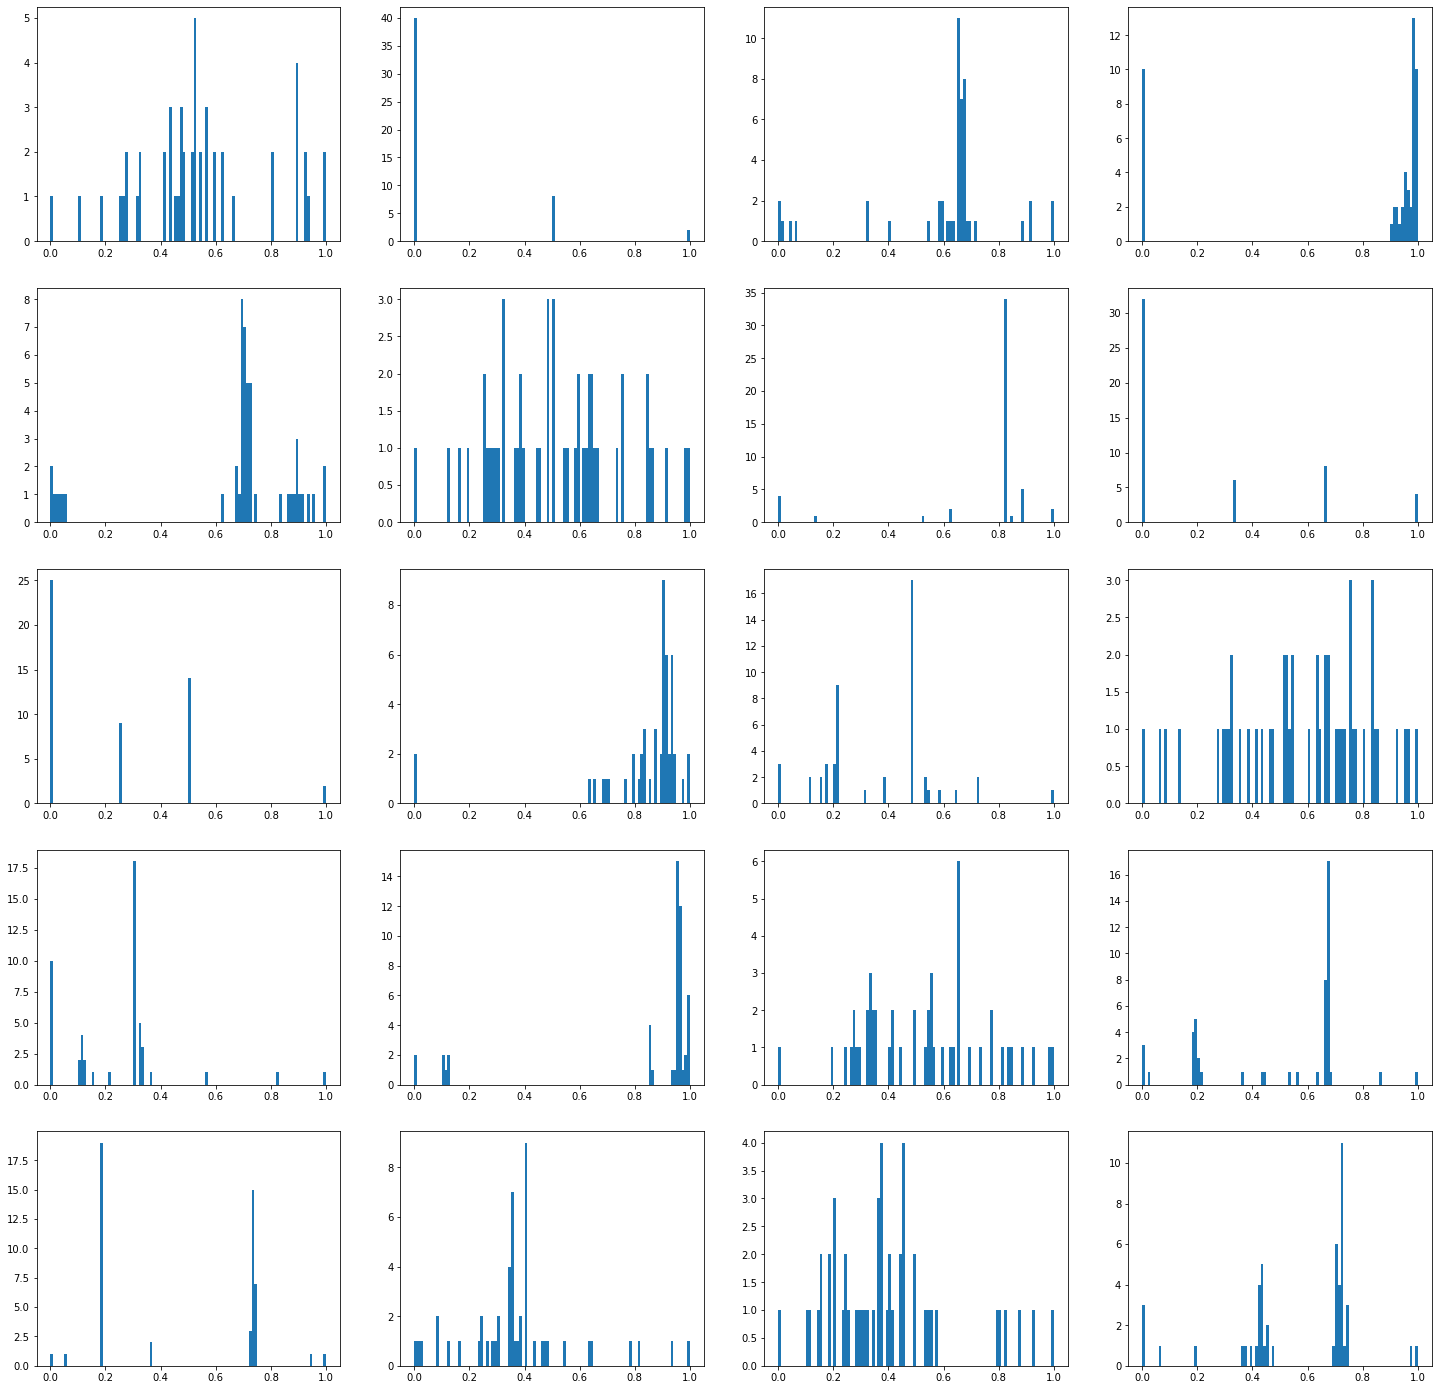

In [99]:
plt.figure(figsize=(25, 25))
for i in range(1, 21):
    plt.subplot(5, 4, i)
    plt.hist(population_p_0_minmax[:,i-1], bins=100)

In [64]:
def encoder(ind_p):
    ind_g = []
    for p in ind_p:
        tmp = int(p*20*10e6)
        bin_tmp = bin(tmp)[2:]
        while(len(bin_tmp)<=27):
            bin_tmp = '0'+bin_tmp
        # ind_g.append(bin_tmp[0:27])
        ind_g.append(bin_tmp)
    return ind_g

def decoder(ind_g):
    ind_p = []
    for g in ind_g:
        ind_p.append(int(g,2)/(20*10e6))
    
    return ind_p


In [78]:
def init(population_p_0_minmax): #初始化
    population_g = []
    for ind in population_p_0_minmax:
        population_g.append(encoder(ind))
    return population_g

def fitness(population_g): #计算适应度
    A = []
    for ind in population_g:
        # ind_p_ = decoder(ind)
        ind_p = decoder(ind)
        A.append(ind_p)
    AA = np.array(A)
    f1 = M1.predict(AA)
    f2 = M2.predict(AA)
    f = (f1+f2) /2
    return f

def sel(population_g):
    f = fitness(population_g)
    tmp = [math.exp(i) for i in f]
    prob = [i / sum(tmp) for i in tmp] #每个个体被选中的概率
    prob_sum = np.cumsum(prob)
    target = random.random()
    index = -1
    for p in range(len(prob)):
        if prob_sum[p] >= target:
            index = p
            break 
    return index  #返回一个父辈的索引
#选择算法
def select(population_g):
    index1 =sel(population_g)
    index2 =sel(population_g)
    while(index1 == index2):
        index2 =sel(population_g)
    return index1, index2

def cross(g1, g2, cross_prob): #选择操作
    if random.random() > cross_prob: #不交叉
            return g1, g2 
    ng1 = deepcopy(g1)
    ng2 = deepcopy(g2)
    tmp = random.randint(0,19)
    # print(tmp)
    t1 = random.randint(0, len(ng1[tmp])-1)  #交叉点1
    t2 = random.randint(0, len(ng1[tmp])-1)  #交叉点2
    start = min(t1,t2) #交叉起点
    end = max(t1,t2) #交叉终点
    # print(f'在第{tmp}个基因上交叉，交叉点为{start}和{end}')
    tp1 = list(ng1[tmp])
    tp2 = list(ng2[tmp])
    # print(tp1)
    # print(tp2)
    # tp1[start:end+1], tp2[tmp][start:end+1] = tp2[tmp][start:end+1], tp1[start:end+1]
    tp1[start:end+1], tp2[start:end+1] = tp2[start:end+1], tp1[start:end+1]
    ng1[tmp] = ''.join(tp1)
    ng2[tmp] = ''.join(tp2)
    # ng1[tmp][start:end+1], ng2[tmp][start:end+1] = g2[tmp][start:end+1], g1[tmp][start:end+1]
    return ng1, ng2

def matute(g, matute_prob):
    ng = deepcopy((g))
    for i in range(len(g)):
        for j in range(len(g[0])):
            if random.random() < matute_prob: #不变异
                tmp = list(ng[i])
                # print(len(g[0]),len(ng[i]), j)
                if ng[i][j] == '1':
                    tmp[j] = '0'
                else:
                    tmp[j] = '1'
                ng[i] = ''.join(tmp)
                
    return ng

def reproduct(population_g, fit):
    return population_g[np.argmax(fit)]

In [145]:
def fitness2(population_g): #计算适应度
    A = []
    for ind in population_g:
        # ind_p_ = decoder(ind)
        ind_p = decoder(ind)
        A.append(ind_p)
    AA = np.array(A)
    f1 = M1.predict(AA)
    f2 = M2.predict(AA)
    f = (f1+f2) /2
    
    pre_a1 = model_a1.predict(AA)
    pre_a2 = model_a2.predict(AA)
    pre_a3 = model_a3.predict(AA)
    pre_d1 = model_d1.predict(AA)
    pre_d2 = model_d2.predict(AA)
    pre_d3 = model_d3.predict(AA)
    pre_e1 = model_e1.predict(AA)
    pre_e2 = model_e2.predict(AA)
    pre_e3 = model_e3.predict(AA)
    pre_m1 = model_m1.predict(AA)
    pre_m2 = model_m2.predict(AA)
    pre_m3 = model_m3.predict(AA)
    pre_t1 = model_t1.predict(AA)
    pre_t2 = model_t2.predict(AA)
    pre_t3 = model_t3.predict(AA)

    pre_a = [0]*len(pre_a1)
    for i in range(len(pre_a1)):
            if pre_a1[i] + pre_a2[i] + pre_a3[i] <= 1:
                pre_a[i] = 0
            else:
                pre_a[i] = 1
    pre_d = [0]*len(pre_d1)
    for i in range(len(pre_d1)):
            if pre_d1[i] + pre_d2[i] + pre_d3[i] <= 1:
                pre_d[i] = 0
            else:
                pre_d[i] = 1
    pre_e = [0]*len(pre_e1)
    for i in range(len(pre_e1)):
            if pre_e1[i] + pre_e2[i] + pre_e3[i] <= 1:
                pre_e[i] = 0
            else:
                pre_e[i] = 1
    pre_m = [0]*len(pre_m1)
    for i in range(len(pre_m1)):
            if pre_m1[i] + pre_m2[i] + pre_m3[i] <= 1:
                pre_m[i] = 0
            else:
                pre_m[i] = 1
    pre_t = [0]*len(pre_t1)
    for i in range(len(pre_t1)):
            if pre_t1[i] + pre_t2[i] + pre_t3[i] <= 1:
                pre_t[i] = 0
            else:
                pre_t[i] = 1

    for i in range(len(pre_t1)):
        ademt_tmp = pre_a[i] + pre_d[i] + (1-pre_e[i]) + pre_m[i] + (1-pre_t[i])
        if ademt_tmp < 3:
            f[i] = 0
        elif ademt_tmp == 4:
            f[i] += 3
        else:
            f[i] += 5
    return f

In [160]:
aa, dd, mm ,ee, tt = admet_predict(init(population_p_0_minmax))
tt

D:\anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
D:\anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
D:\anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explici

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [237]:
fitness2(init(population_p_0_minmax))

array([14.79426782,  0.        ,  0.        ,  0.        , 11.83969866,
       11.84348386, 11.69816535,  0.        , 11.72027372, 11.66070005,
        0.        ,  0.        ,  0.        , 11.50395178, 13.4836827 ,
       11.48284084, 13.49323061,  0.        , 13.34207789, 12.8654923 ,
       13.29918803,  0.        , 13.27574826, 11.22900764, 11.17196457,
       13.23614829, 11.21445352,  0.        , 11.22900764, 11.14718175,
       13.13917796, 13.10001682,  0.        , 13.03762332, 11.17196457,
       12.98118457, 12.96351628, 12.97072303, 10.97455089, 10.96098587,
       10.5165795 ,  0.        , 10.84149373, 12.87333274,  0.        ,
       12.80067088, 12.79704741, 12.79143909, 10.84149373, 10.77127109])

In [238]:
fitness(init(population_p_0_minmax))

array([9.79426782, 9.32976443, 9.223362  , 9.10950242, 8.83969866,
       8.84348386, 8.69816535, 8.77830297, 8.72027372, 8.66070005,
       8.62810975, 8.66042513, 8.55835594, 8.50395178, 8.4836827 ,
       8.48284084, 8.49323061, 8.43695662, 8.34207789, 7.8654923 ,
       8.29918803, 8.27686173, 8.27574826, 8.22900764, 8.17196457,
       8.23614829, 8.21445352, 8.18792511, 8.22900764, 8.14718175,
       8.13917796, 8.10001682, 8.03876482, 8.03762332, 8.17196457,
       7.98118457, 7.96351628, 7.97072303, 7.97455089, 7.96098587,
       7.5165795 , 7.89050865, 7.84149373, 7.87333274, 7.83423364,
       7.80067088, 7.79704741, 7.79143909, 7.84149373, 7.77127109])

In [239]:
#初代的适应度和初代表现型
fit_0 = MD__.iloc[0:51,-2].values
population_0 = MD__.iloc[0:51,:-2].values
population_0
population_p_0_minmax = min_max_scaler.transform(population_0)

In [270]:
iter_num = 50
cross_prob = 0.8
matute_prob = 0.01


g_best = []
f_best = []
f_mean = []

population_pre = init(population_p_0_minmax)
fit_pre = fitness2(population_pre)
g_best.append(population_pre[0])
f_best.append(np.max(fit_pre))
f_mean.append(np.mean(fit_pre))

In [271]:
for it in range(iter_num):
    population_cur = []
    population_cur.append(reproduct(population_pre, fit_pre))
    for i in range(50):
        id1, id2 = select(population_pre)
        g1, g2 = population_pre[id1], population_pre[id2]
        ng1, ng2 = cross(g1, g2, cross_prob)
        nng1 = matute(ng1, matute_prob)
        nng2 = matute(ng2, matute_prob)
        population_cur.append(nng1)
        population_cur.append(nng2)
    population_pre = population_cur
    fit_pre = fitness2(population_pre)
    f_best.append(np.max(fit_pre))
    f_mean.append(np.mean(fit_pre))
    g_best.append(reproduct(population_pre, fit_pre))
    print(f'第{it+1}代种群最优适应度为{f_best[-1]},平均适应度为{f_mean[-1]}')

第1代种群最优适应度为14.814642118903649,平均适应度为7.978855862399136
第2代种群最优适应度为14.814642118903649,平均适应度为8.30387284265663
第3代种群最优适应度为14.814642118903649,平均适应度为10.96499578919623
第4代种群最优适应度为14.822349124119803,平均适应度为12.501124496061507
第5代种群最优适应度为14.822349124119803,平均适应度为12.591143131997546
第6代种群最优适应度为14.861129277227981,平均适应度为13.019844640097237
第7代种群最优适应度为14.861129277227981,平均适应度为13.058632277754903
第8代种群最优适应度为14.861129277227981,平均适应度为13.836331413268201
第9代种群最优适应度为14.861129277227981,平均适应度为13.524462713769699
第10代种群最优适应度为14.861129277227981,平均适应度为13.23030185125398
第11代种群最优适应度为14.861129277227981,平均适应度为13.281118634330431
第12代种群最优适应度为14.861129277227981,平均适应度为13.189653338980238
第13代种群最优适应度为14.861129277227981,平均适应度为13.192293051816156
第14代种群最优适应度为14.86206083868923,平均适应度为13.037051698421005
第15代种群最优适应度为14.86206083868923,平均适应度为12.566175271586246
第16代种群最优适应度为14.86206083868923,平均适应度为12.713631203649985
第17代种群最优适应度为14.86206083868923,平均适应度为12.211600240056358
第18代种群最优适应度为14.86206083868923,平均适应度为13.275898710690539
第19代种群最优适应度

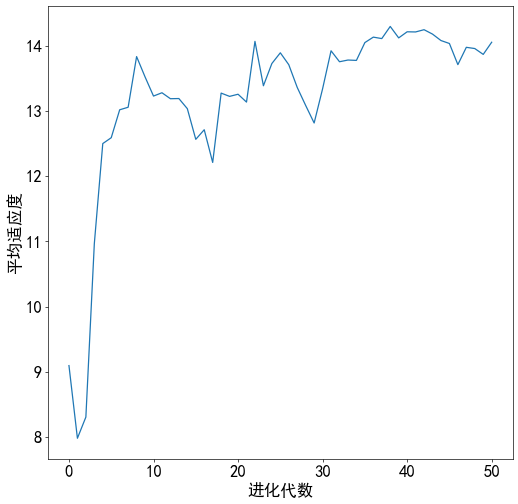

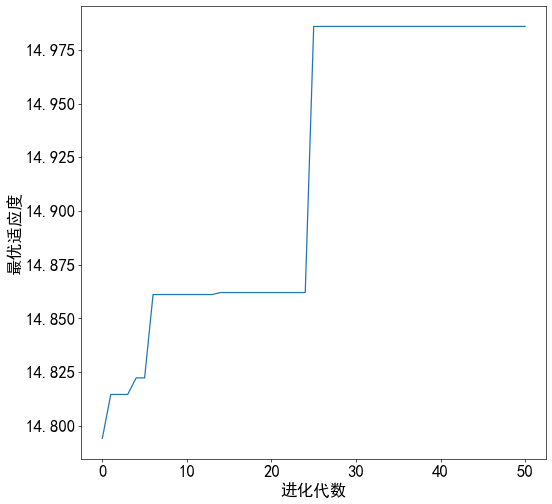

In [494]:
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
x = range(len(f_mean))
y1 = f_mean
y2 = f_best
plt.figure(figsize=(10,10),dpi=60)
plt.plot(x,y1)
plt.xlabel("进化代数",fontsize=20)
plt.ylabel("平均适应度",fontsize=20)
plt.tick_params(labelsize=20)
plt.savefig("平均适应度.jpg",dpi=600)


plt.show()
plt.figure(figsize=(10,10),dpi=60)
plt.plot(x,y2)
plt.xlabel("进化代数",fontsize=20)
plt.ylabel("最优适应度",fontsize=20)
plt.tick_params(labelsize=20)
plt.savefig("最优适应度.jpg",dpi = 600)


plt.show()

In [277]:
fitness(population_pre)

array([9.98584933, 9.65532382, 9.47229351, 9.69957704, 9.85936994,
       9.83983328, 8.88482961, 9.57067452, 9.4588906 , 9.62353764,
       9.55391617, 8.32983952, 9.01520759, 9.84645405, 9.620134  ,
       9.65455532, 9.92452372, 9.85619764, 9.55697463, 9.52538641,
       9.43845722, 8.94254499, 9.39442638, 8.9252927 , 9.21733845,
       9.21128972, 9.47737248, 9.26426215, 9.82530711, 8.88278011,
       9.26322726, 9.51495986, 9.26039145, 9.08843594, 9.19059447,
       9.65554939, 9.21144743, 9.61637969, 9.72700656, 9.52434781,
       9.64393916, 9.26700875, 9.5076087 , 9.2510755 , 9.61543393,
       8.85908747, 7.68910666, 9.82203021, 9.32807809, 9.64679303,
       9.2582516 , 9.18171871, 9.8639789 , 9.24789008, 8.8185929 ,
       9.57877035, 9.73103374, 9.49776767, 8.41477358, 9.20897441,
       9.47473291, 9.565979  , 8.69104835, 9.44686081, 9.41826672,
       9.25671072, 9.39511481, 9.47977366, 7.99929474, 9.53713601,
       9.16029176, 7.86740878, 9.05423898, 8.20708897, 9.34818

In [281]:
decoder(population_pre[0])

[0.615314305,
 0.166671785,
 0.29609565,
 0.04202528,
 0.78273411,
 1.20723899,
 0.495836445,
 0.445099805,
 0.16370562,
 0.708875785,
 0.17173487,
 0.495588765,
 2e-08,
 0.17104727,
 0.70251626,
 0.232202465,
 0.577927045,
 0.361219985,
 0.342693505,
 0.30251159]

In [323]:
population_pre

[['0111010101011100101001001101',
  '0001111111001010010001010101',
  '0011100001111001110010111010',
  '0000100000000100000001000000',
  '1001010101001011011100000110',
  '1110011001000011001101110110',
  '0101111010010010110000111001',
  '0101010011100101011000111001',
  '0001111100111001011100000100',
  '1000011100110101000100110101',
  '0010000011000001011111011110',
  '0101111010000110101010111001',
  '0000000000000000000000000100',
  '0010000010011111111010101110',
  '1000010111111110100011010100',
  '0010110001001010000000101101',
  '0110111000111011000110000001',
  '0100010011100101101100011101',
  '0100000101011101000101001101',
  '0011100110110011000100101110'],
 ['0101110101011100101001001101',
  '0110111111001000010011010000',
  '0011100001011000110010011000',
  '0000100000001100000011001000',
  '1001000001101011001100000111',
  '1110011011000001000101110110',
  '0101111010110010110010111001',
  '0101110111100101011010011100',
  '0001110110110000011100001101',
  '1000011110

In [290]:
BEST101 = []
for i in range(101):
    gp = decoder(population_pre[i])
    BEST101.append(gp)
BEST101

AttributeError: 'list' object has no attribute 'shape'

In [297]:
BEST101 = np.array(BEST101)
BEST101_ = min_max_scaler.inverse_transform(BEST101)

In [319]:
BEST101_[:,7] = [int(i) for  i in BEST101_[:,7] ]
BEST101_[:,8] = [int(i) for  i in BEST101_[:,8] ]
for i in range(len(BEST101_)):
    if BEST101_[i,1] >=0.5:
        BEST101_[i,1] = 1
    else:
        BEST101_[i,1] = 0

In [376]:
BEST_101_DF = pd.DataFrame(columns = MD.columns[:20], data = BEST101_ )
BEST_101_DF

,MDEC-23,C1SP2,SHsOH,maxssO,minsOH,LipoaffinityIndex,MLFER_A,nHBAcc,ndssC,minsssN,TopoPSA,CrippenLogP,MDEO-12,SsOH,MDEC-33,SHBint10,minHBint5,MLFER_S,XLogP,minHBint10
0,27.601303,1.0,0.697954,0.282710,8.801628,22.709649,0.961799,4.0,1.0,1.810968,44.568965,5.229181,4.383745e-08,8.818537,17.257408,8.160617,4.518629,2.192305,3.125513,2.339581
1,22.331787,1.0,0.696361,0.283817,8.514166,22.756338,0.963406,4.0,1.0,1.817665,14.491136,12.676721,4.040498e-04,8.877665,17.257406,8.160615,5.346615,2.187920,3.128554,2.339569
2,27.596371,1.0,0.697942,1.411337,1.255365,22.519740,2.599745,4.0,1.0,1.813486,48.496400,5.228724,7.452367e-07,9.113916,17.257523,8.172178,3.341334,2.108038,3.250063,2.587213
3,29.357808,1.0,0.696361,0.283817,8.566730,22.756338,0.961801,4.0,1.0,1.816828,14.491136,12.662210,4.051019e-04,8.877665,17.257406,8.160615,5.346615,2.187910,3.112985,2.339569
4,27.601289,1.0,0.697906,0.282710,8.749985,22.709649,0.961799,4.0,1.0,1.810968,44.568965,5.229181,2.298349e-02,8.818537,17.257408,6.685114,4.518653,2.192295,3.063239,2.339581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,27.707034,1.0,0.704134,1.975654,9.214427,22.522707,0.961674,4.0,2.0,1.757394,44.565135,5.228265,5.747309e-03,8.810090,17.241620,20.229508,3.932739,2.187294,3.125392,9.768396
97,27.542419,1.0,2.276738,1.560836,9.741162,23.468520,0.961805,3.0,1.0,1.810757,60.897422,5.200144,1.256907e-02,9.891304,17.178583,8.115278,5.202432,2.192308,3.120808,6.237532
98,27.601303,1.0,0.697954,2.542451,7.858352,22.718504,0.961799,4.0,3.0,1.810968,44.568965,12.720710,5.745862e-03,8.818537,17.251487,8.114552,4.518629,2.193558,3.132325,2.339581
99,27.594332,0.0,0.697930,0.299804,8.802549,10.649404,0.961849,4.0,0.0,1.814317,44.086136,14.592484,7.463326e-04,9.354654,19.246702,8.160615,4.531590,2.193559,4.239780,2.341039


In [325]:
fit = fitness(population_pre)
fit2 = fitness2(population_pre)

In [377]:
BEST_101_DF['pIC50'] = fit
BEST_101_DF['good_ADMET_score'] = fit2-fit

In [396]:
BEST_101_DF.sort_values("pIC50",inplace=True, ascending = False)
BEST_101_DF.iloc[:85,0:20]

,MDEC-23,C1SP2,SHsOH,maxssO,minsOH,LipoaffinityIndex,MLFER_A,nHBAcc,ndssC,minsssN,TopoPSA,CrippenLogP,MDEO-12,SsOH,MDEC-33,SHBint10,minHBint5,MLFER_S,XLogP,minHBint10
0,27.601303,1.0,0.697954,0.282710,8.801628,22.709649,0.961799,4.0,1.0,1.810968,44.568965,5.229181,4.383745e-08,8.818537,17.257408,8.160617,4.518629,2.192305,3.125513,2.339581
16,27.597309,1.0,0.694865,1.554903,9.741162,23.468520,0.961805,3.0,1.0,1.817454,60.866799,5.200144,1.077349e-03,8.810094,17.146884,8.115278,5.202432,2.192308,3.369908,2.337408
82,27.597309,1.0,0.694865,1.554903,9.741163,23.468149,0.974650,3.0,1.0,1.817454,60.897423,5.199917,1.077349e-03,8.810094,19.167507,8.115276,5.202432,2.192308,3.369908,2.275501
98,27.601303,1.0,0.697954,2.542451,7.858352,22.718504,0.961799,4.0,3.0,1.810968,44.568965,12.720710,5.745862e-03,8.818537,17.251487,8.114552,4.518629,2.193558,3.132325,2.339581
52,27.601303,1.0,0.697954,2.548384,7.858352,22.712616,0.961799,4.0,3.0,1.810968,44.565138,12.720710,5.745906e-03,8.818537,17.251487,8.114552,4.518623,2.193558,3.132325,2.339581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,29.357688,1.0,0.500169,0.317978,8.801571,22.757080,0.961801,4.0,1.0,1.764098,63.792763,12.603675,4.616084e-05,8.810089,21.283359,6.686553,5.360338,4.759174,3.132325,2.277676
33,27.594332,1.0,0.697930,0.300354,7.844535,10.649404,0.961850,4.0,0.0,1.810969,169.519299,12.719595,2.182820e-03,9.354654,19.246702,8.160615,2.969862,2.193559,4.239780,2.341039
72,27.597768,1.0,0.696456,4.797251,5.061691,24.228549,0.955378,4.0,0.0,1.921894,44.568957,5.229195,3.647714e-04,8.810090,17.257406,7.438020,2.957291,2.176016,5.111988,1.349081
12,27.540299,1.0,2.279833,0.000563,8.919537,22.708904,0.964904,9.0,2.0,1.817681,48.037057,12.724625,1.156498e-02,8.804810,16.704824,8.527783,4.530821,2.835120,3.125513,1.861324


In [361]:
BEST_101_DF[:84].to_excel("BEST_MORE_THAN_9.0.xlsx",index=False)

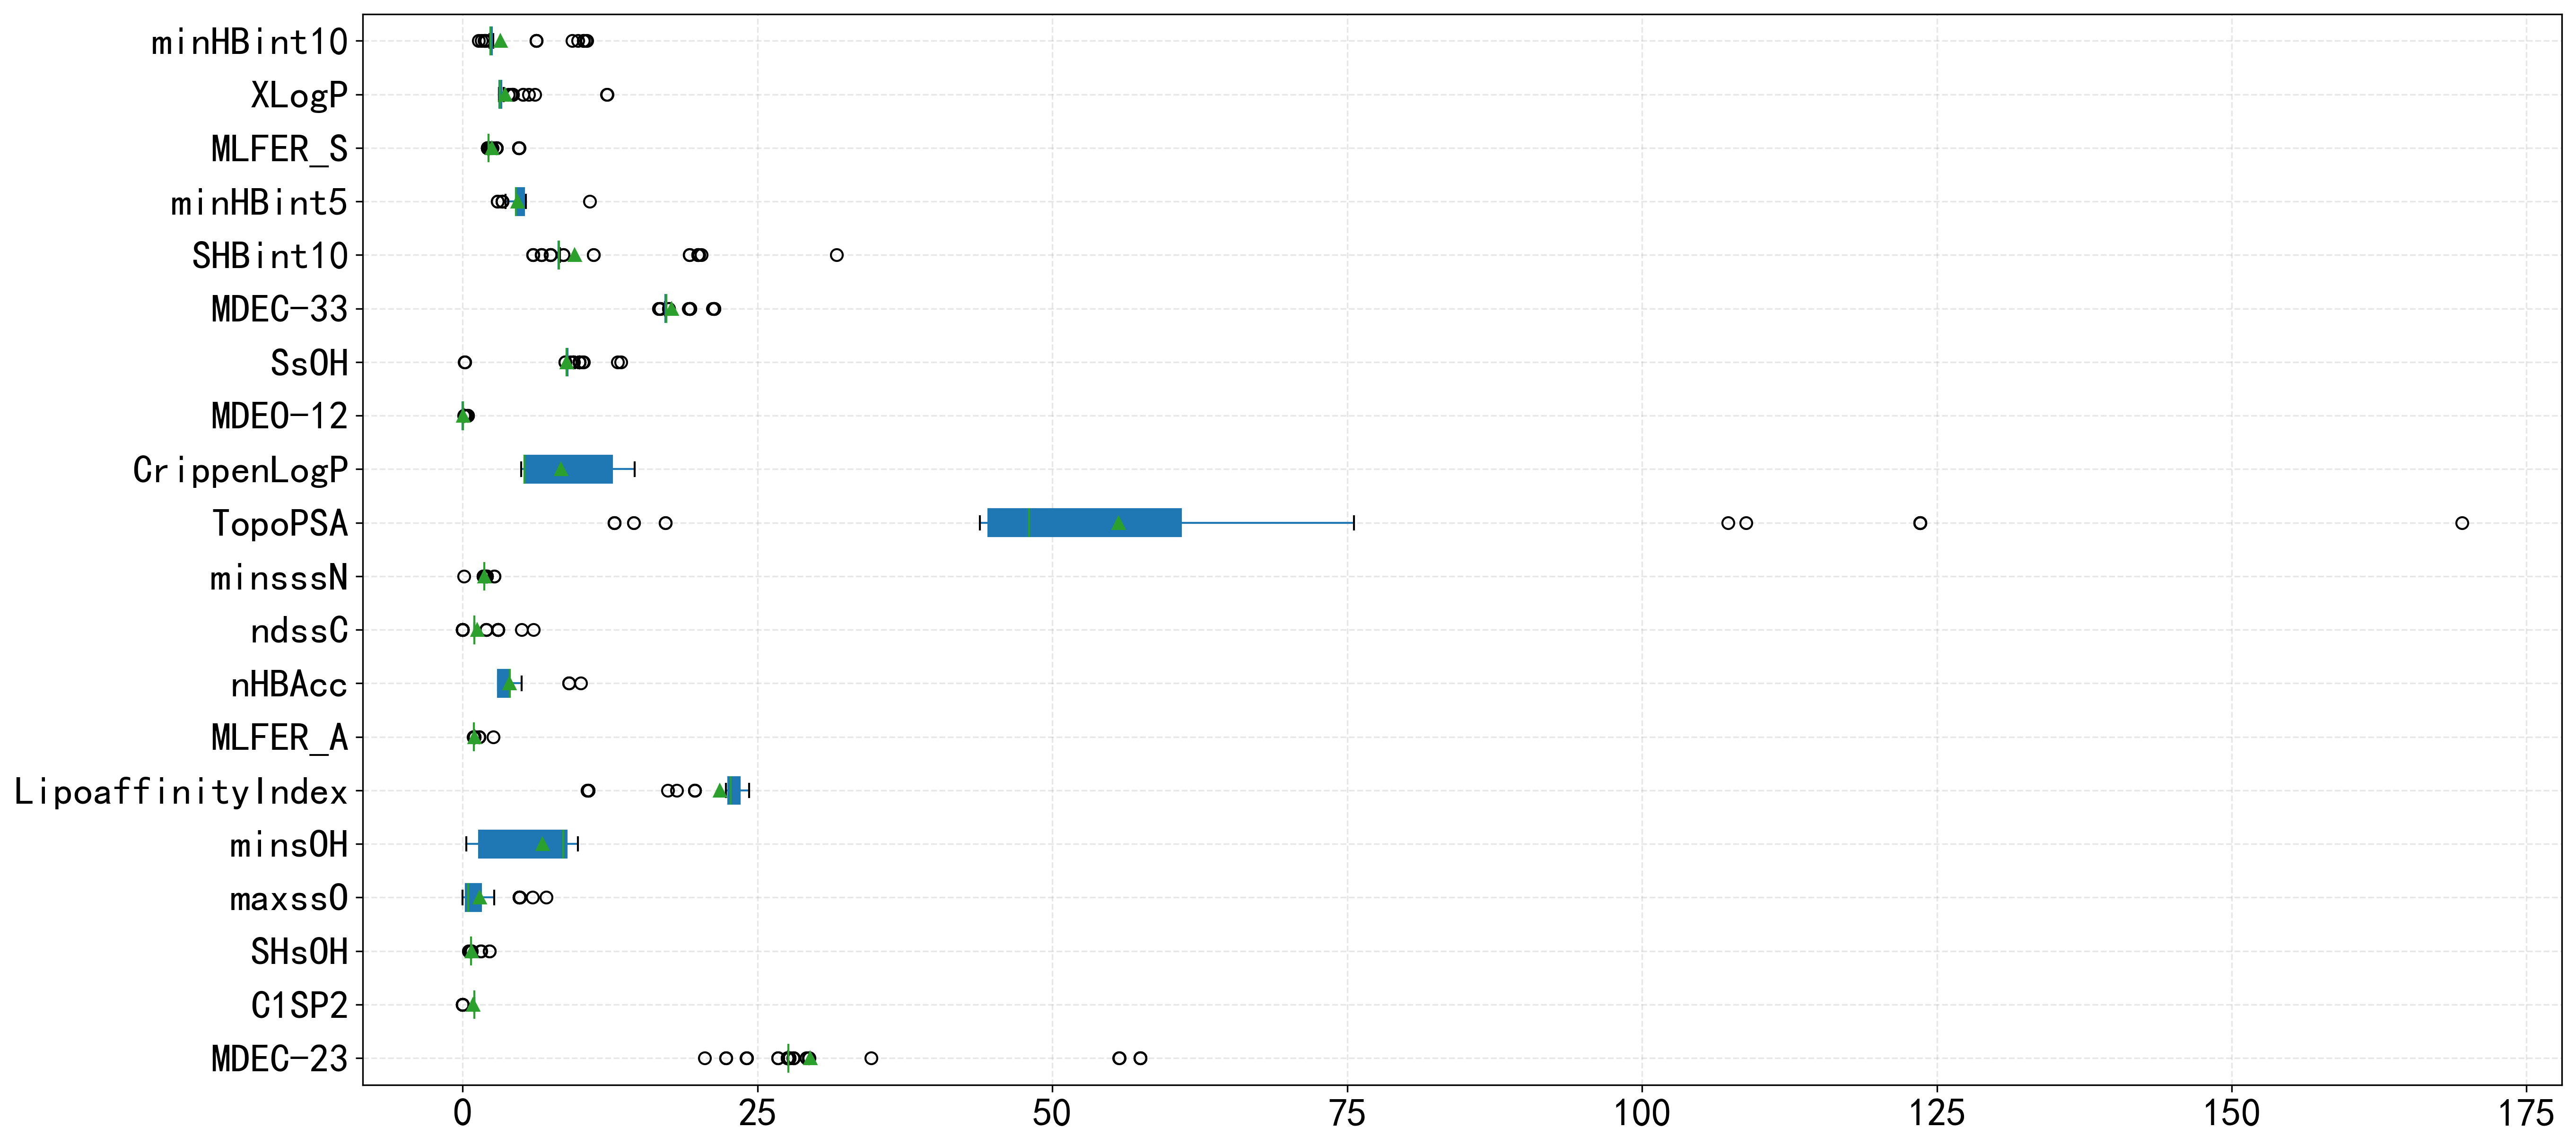

In [495]:
plt.figure(figsize=(20,10))
BEST_101_DF.iloc[:85,0:20].boxplot(sym = 'o',            #异常点形状
               vert = False,          # 是否垂直
               whis=1.5,             # IQR
               patch_artist = True,  # 上下四分位框是否填充
               meanline = False,showmeans = True,  # 是否有均值线及其形状
               showbox = True,   # 是否显示箱线
               showfliers = True,  #是否显示异常值
               notch = False,    # 中间箱体是否缺口
               )  # 返回类型为字典

plt.grid(linestyle="--", alpha=0.3)
plt.tick_params(labelsize=20)
plt.savefig("箱型图.jpg",dpi = 1500)
plt.show()

In [419]:
BEST = BEST_101_DF.iloc[0:1,:-2]
BEST

,MDEC-23,C1SP2,SHsOH,maxssO,minsOH,LipoaffinityIndex,MLFER_A,nHBAcc,ndssC,minsssN,TopoPSA,CrippenLogP,MDEO-12,SsOH,MDEC-33,SHBint10,minHBint5,MLFER_S,XLogP,minHBint10
0,27.601303,1.0,0.697954,0.28271,8.801628,22.709649,0.961799,4.0,1.0,1.810968,44.568965,5.229181,4.383745e-08,8.818537,17.257408,8.160617,4.518629,2.192305,3.125513,2.339581


In [414]:
"""
27.597309
1.000000
0.697930
 0.460164
 8.543644
22.718504
 0.961805
4.000000
 1.000000
 1.814742
 48.037057
5.229195
   0.005746
8.810110
 17.255434
 8.153419
4.518677
2.192308
3.133298
2.339588
"""

'\n27.597309\n1.000000\n0.697930\n\xa00.460164\n\xa08.543644\n22.718504\n\xa00.961805\n4.000000\n\xa01.000000\n\xa01.814742\n\xa048.037057\n5.229195\n\xa0\xa0\xa00.005746\n8.810110\n\xa017.255434\n\xa08.153419\n4.518677\n2.192308\n3.133298\n2.339588\n'

In [433]:
MDEC23

,MDEC-23,C1SP2,SHsOH,maxssO,minsOH,LipoaffinityIndex,MLFER_A,nHBAcc,ndssC,minsssN,TopoPSA,CrippenLogP,MDEO-12,SsOH,MDEC-33,SHBint10,minHBint5,MLFER_S,XLogP,minHBint10
0,13.800652,1.0,0.697954,0.28271,8.801628,22.709649,0.961799,4.0,1.0,1.810968,44.568965,5.229181,4.383745e-08,8.818537,17.257408,8.160617,4.518629,2.192305,3.125513,2.339581
1,19.320912,1.0,0.697954,0.28271,8.801628,22.709649,0.961799,4.0,1.0,1.810968,44.568965,5.229181,4.383745e-08,8.818537,17.257408,8.160617,4.518629,2.192305,3.125513,2.339581
2,24.841173,1.0,0.697954,0.28271,8.801628,22.709649,0.961799,4.0,1.0,1.810968,44.568965,5.229181,4.383745e-08,8.818537,17.257408,8.160617,4.518629,2.192305,3.125513,2.339581
3,30.361433,1.0,0.697954,0.28271,8.801628,22.709649,0.961799,4.0,1.0,1.810968,44.568965,5.229181,4.383745e-08,8.818537,17.257408,8.160617,4.518629,2.192305,3.125513,2.339581
4,35.881694,1.0,0.697954,0.28271,8.801628,22.709649,0.961799,4.0,1.0,1.810968,44.568965,5.229181,4.383745e-08,8.818537,17.257408,8.160617,4.518629,2.192305,3.125513,2.339581
5,41.401955,1.0,0.697954,0.28271,8.801628,22.709649,0.961799,4.0,1.0,1.810968,44.568965,5.229181,4.383745e-08,8.818537,17.257408,8.160617,4.518629,2.192305,3.125513,2.339581


array([9.39918785, 9.58801504, 9.86073258, 9.97914818, 9.75749489,
       9.75704726])

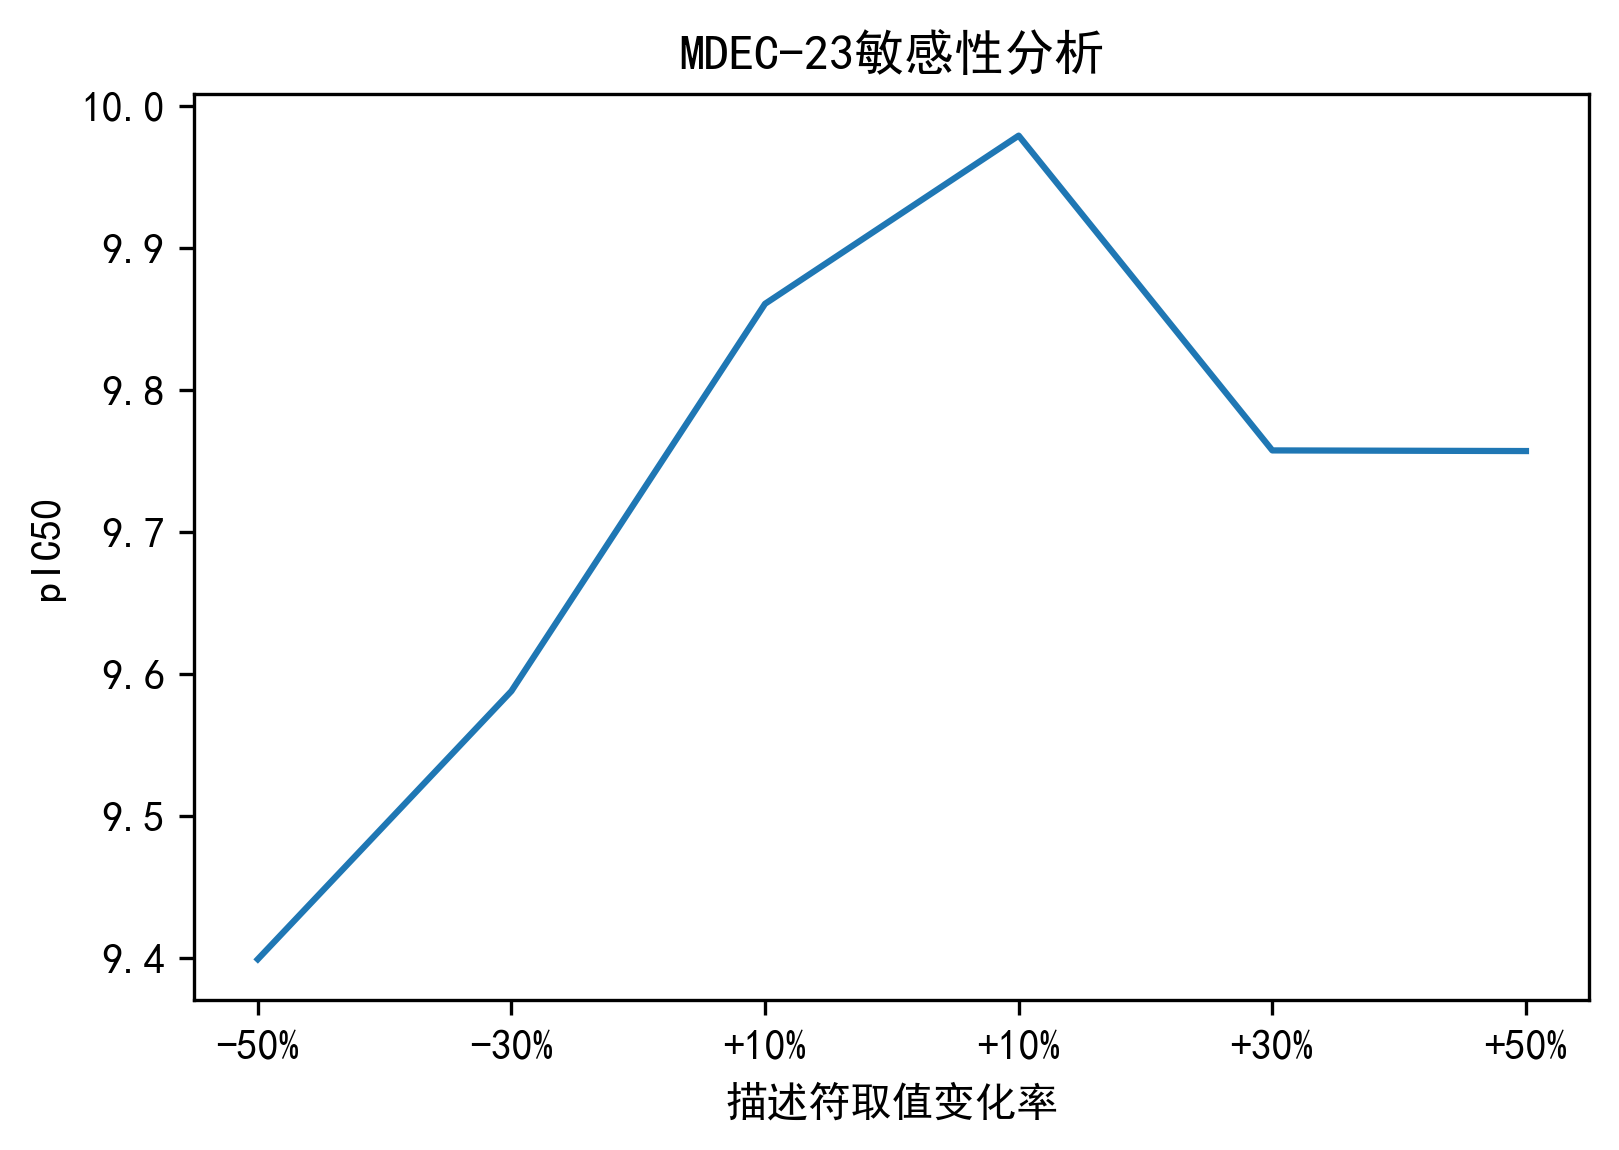

In [449]:
MDEC23 = pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
MDEC23['MDEC-23'] = np.linspace(27.601303*0.5,27.601303*1.5,6)
X_TMP = min_max_scaler.transform(MDEC23.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff1 = (f1+f2) /2
plt.xticks( range(6), ["-50%","-30%","+10%","+10%","+30%","+50%"] )
plt.title("MDEC-23敏感性分析",)
plt.xlabel("描述符取值变化率")
plt.ylabel("pIC50")
plt.savefig("MDEC23敏感性.jpg",dpi = 300)
plt.plot(range(len(ff1)),ff1)


array([9.66390802, 9.98491777])

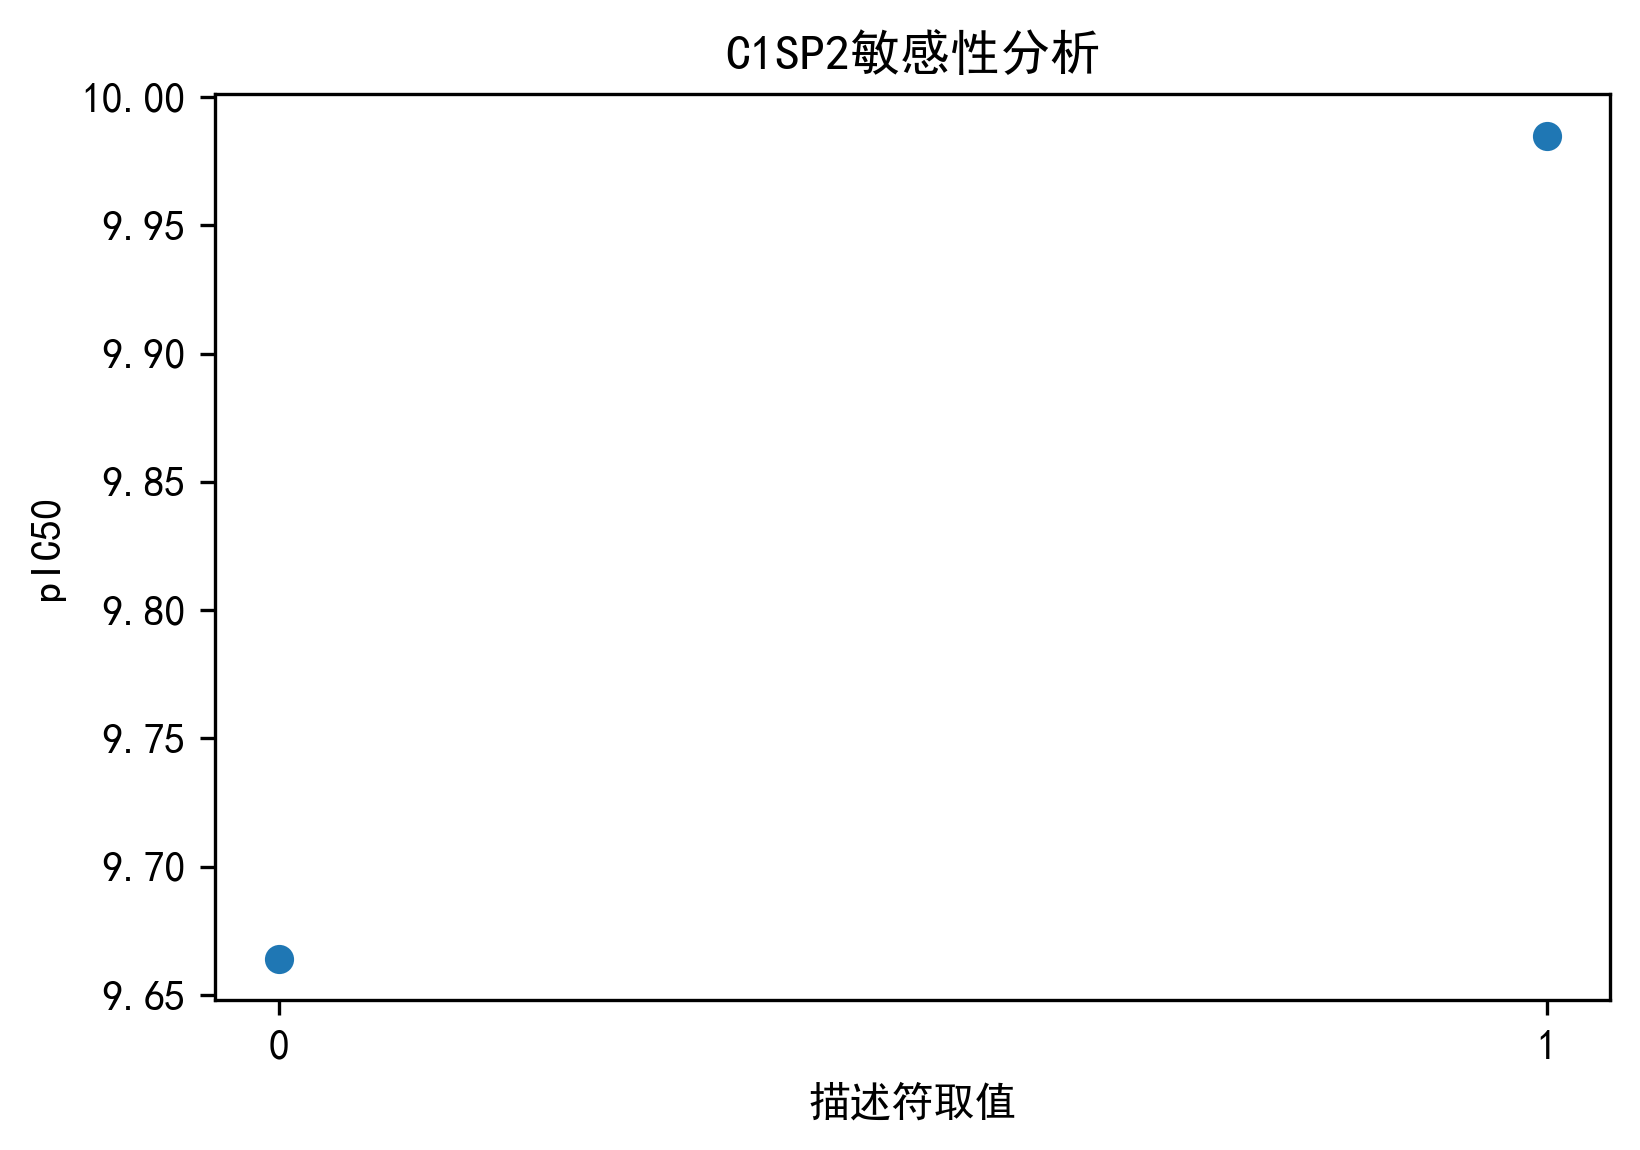

In [483]:
C1SP2 = pd.DataFrame(np.repeat(BEST.values,2,axis=0), columns=BEST.columns)
C1SP2['C1SP2'] =  range(0,2)
X_TMP = min_max_scaler.transform(C1SP2.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff3 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(2), ["0","1"] )
plt.title("C1SP2敏感性分析",)
plt.xlabel("描述符取值")
plt.ylabel("pIC50")
plt.savefig("C1SP2敏感性.jpg",dpi = 300)
plt.scatter(range(len(ff3)),ff3)
ff3

array([9.14140171, 9.92225751, 9.94916172, 9.97652986, 9.96760808,
       9.89158238])

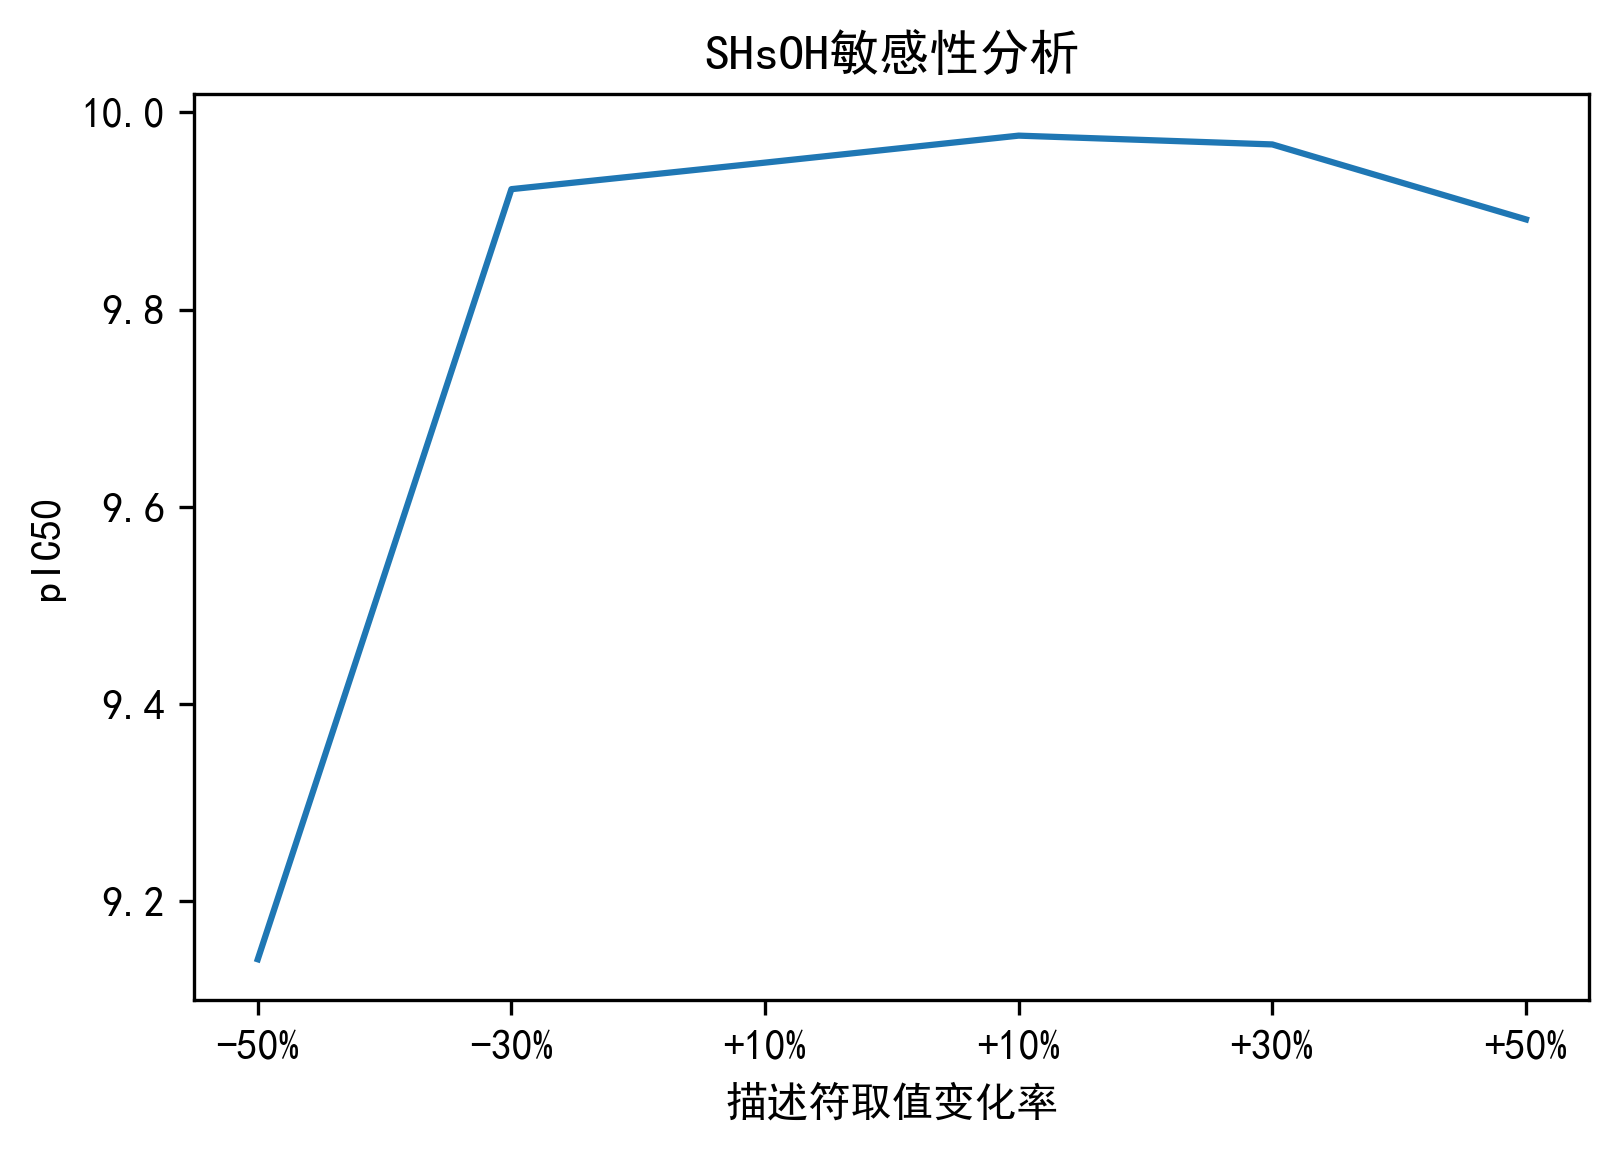

In [452]:
SHsOH = pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
SHsOH['SHsOH'] = np.linspace(0.697930*0.5,0.697930*1.5,6)
X_TMP = min_max_scaler.transform(SHsOH.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff2 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(6), ["-50%","-30%","+10%","+10%","+30%","+50%"] )
plt.title("SHsOH敏感性分析",)
plt.xlabel("描述符取值变化率")
plt.ylabel("pIC50")
plt.savefig("SHsOH敏感性.jpg",dpi = 300)
plt.plot(range(len(ff2)),ff2)
ff2

array([9.98491777, 9.98491777, 9.98491777, 9.98491777, 9.98491777,
       9.98491777])

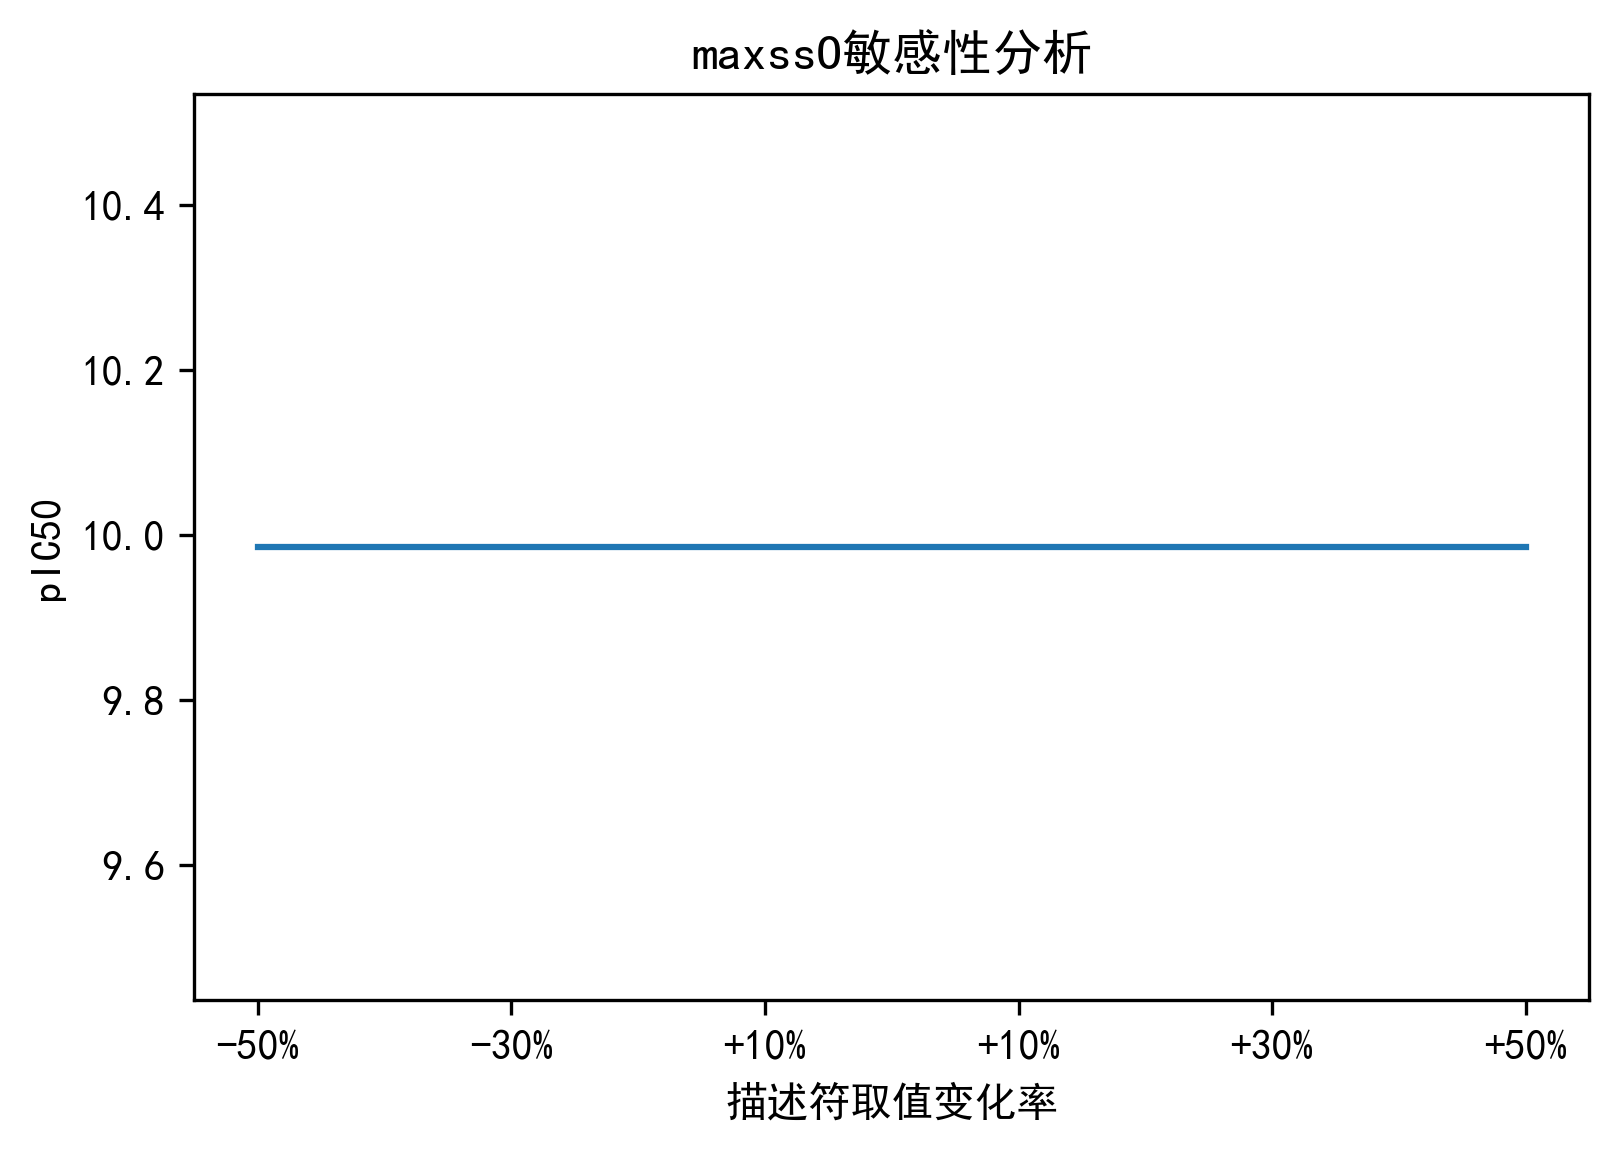

In [457]:
maxssO = pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
maxssO['maxssO'] = np.linspace(0.28271*0.5,0.28271*1.5,6)
X_TMP = min_max_scaler.transform(maxssO.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff3 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(6), ["-50%","-30%","+10%","+10%","+30%","+50%"] )
plt.title("maxssO敏感性分析",)
plt.xlabel("描述符取值变化率")
plt.ylabel("pIC50")
plt.savefig("maxssO敏感性.jpg",dpi = 300)
plt.plot(range(len(ff3)),ff3)
ff3

array([9.97590296, 9.97568906, 9.97568906, 9.97331173, 8.65426972,
       8.65426972])

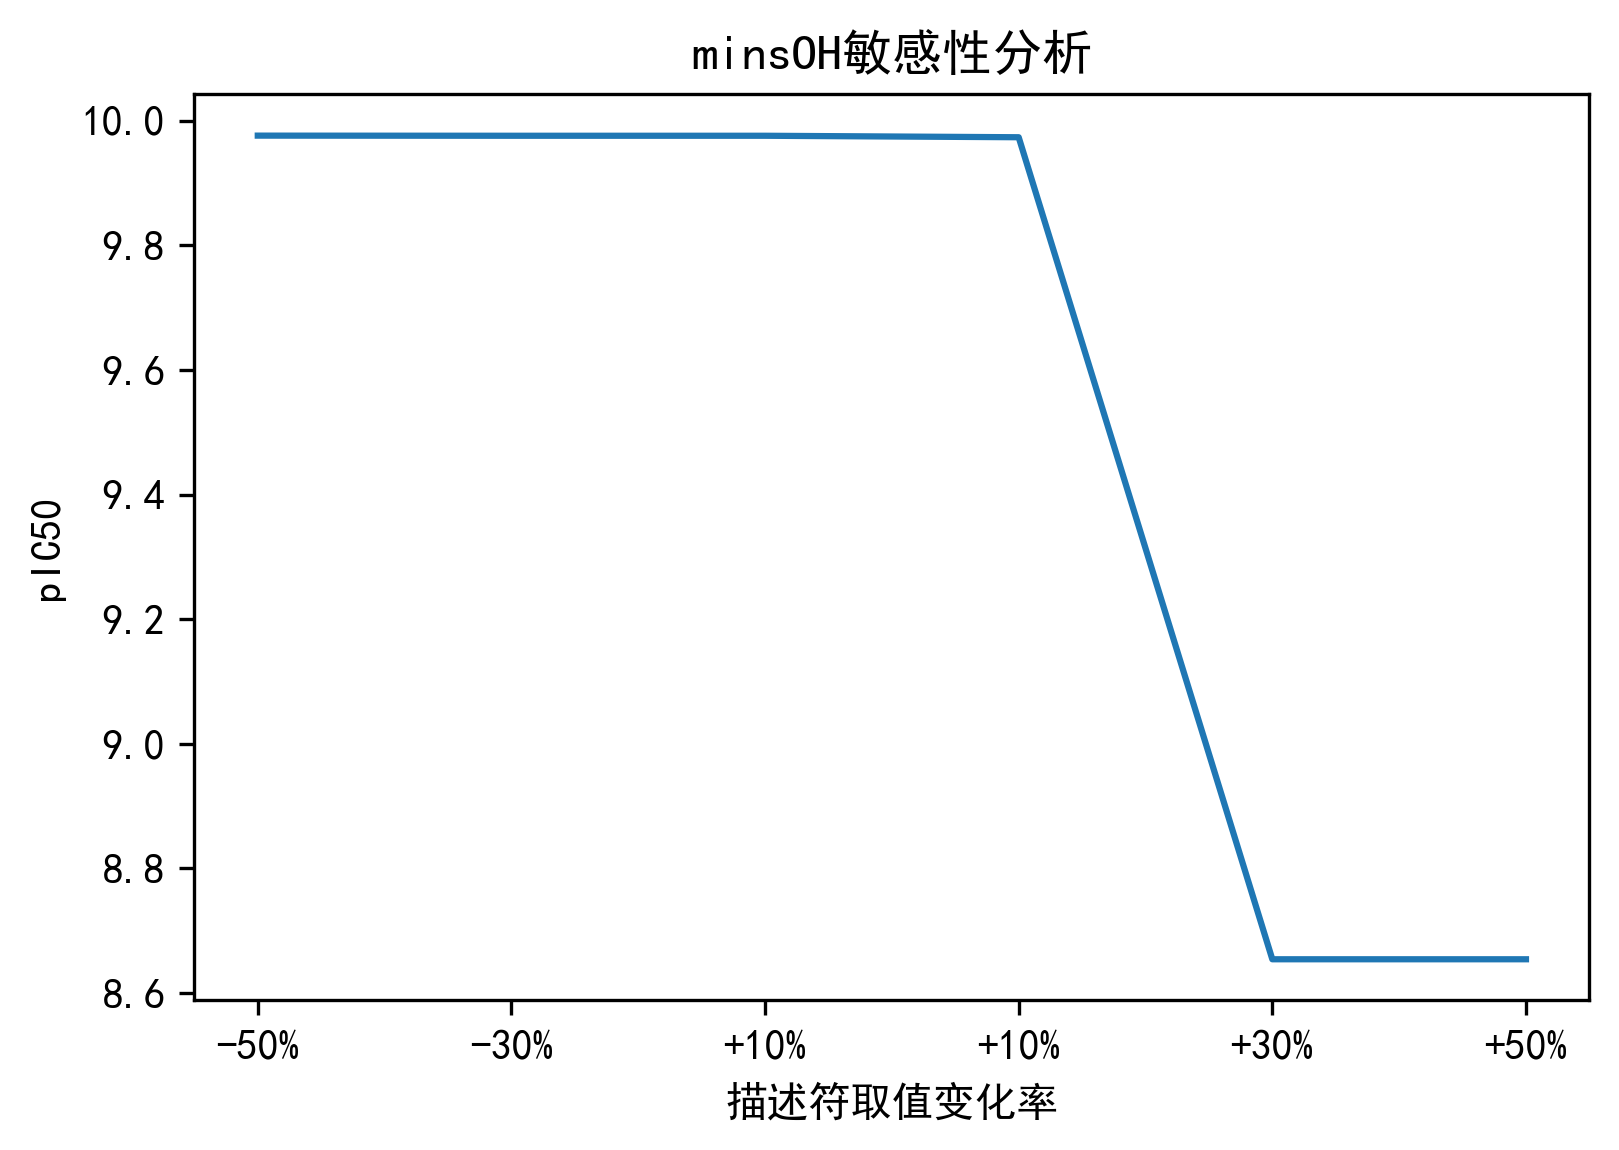

In [460]:
minsOH = pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
minsOH['minsOH'] = np.linspace(8.801628*0.5,8.801628*1.5,6)
X_TMP = min_max_scaler.transform(minsOH.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff3 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(6), ["-50%","-30%","+10%","+10%","+30%","+50%"] )
plt.title("minsOH敏感性分析",)
plt.xlabel("描述符取值变化率")
plt.ylabel("pIC50")
plt.savefig("minsOH敏感性.jpg",dpi = 300)
plt.plot(range(len(ff3)),ff3)
ff3

array([9.7388334 , 9.67055334, 9.98491777, 9.98491777, 9.98491777,
       9.98491777])

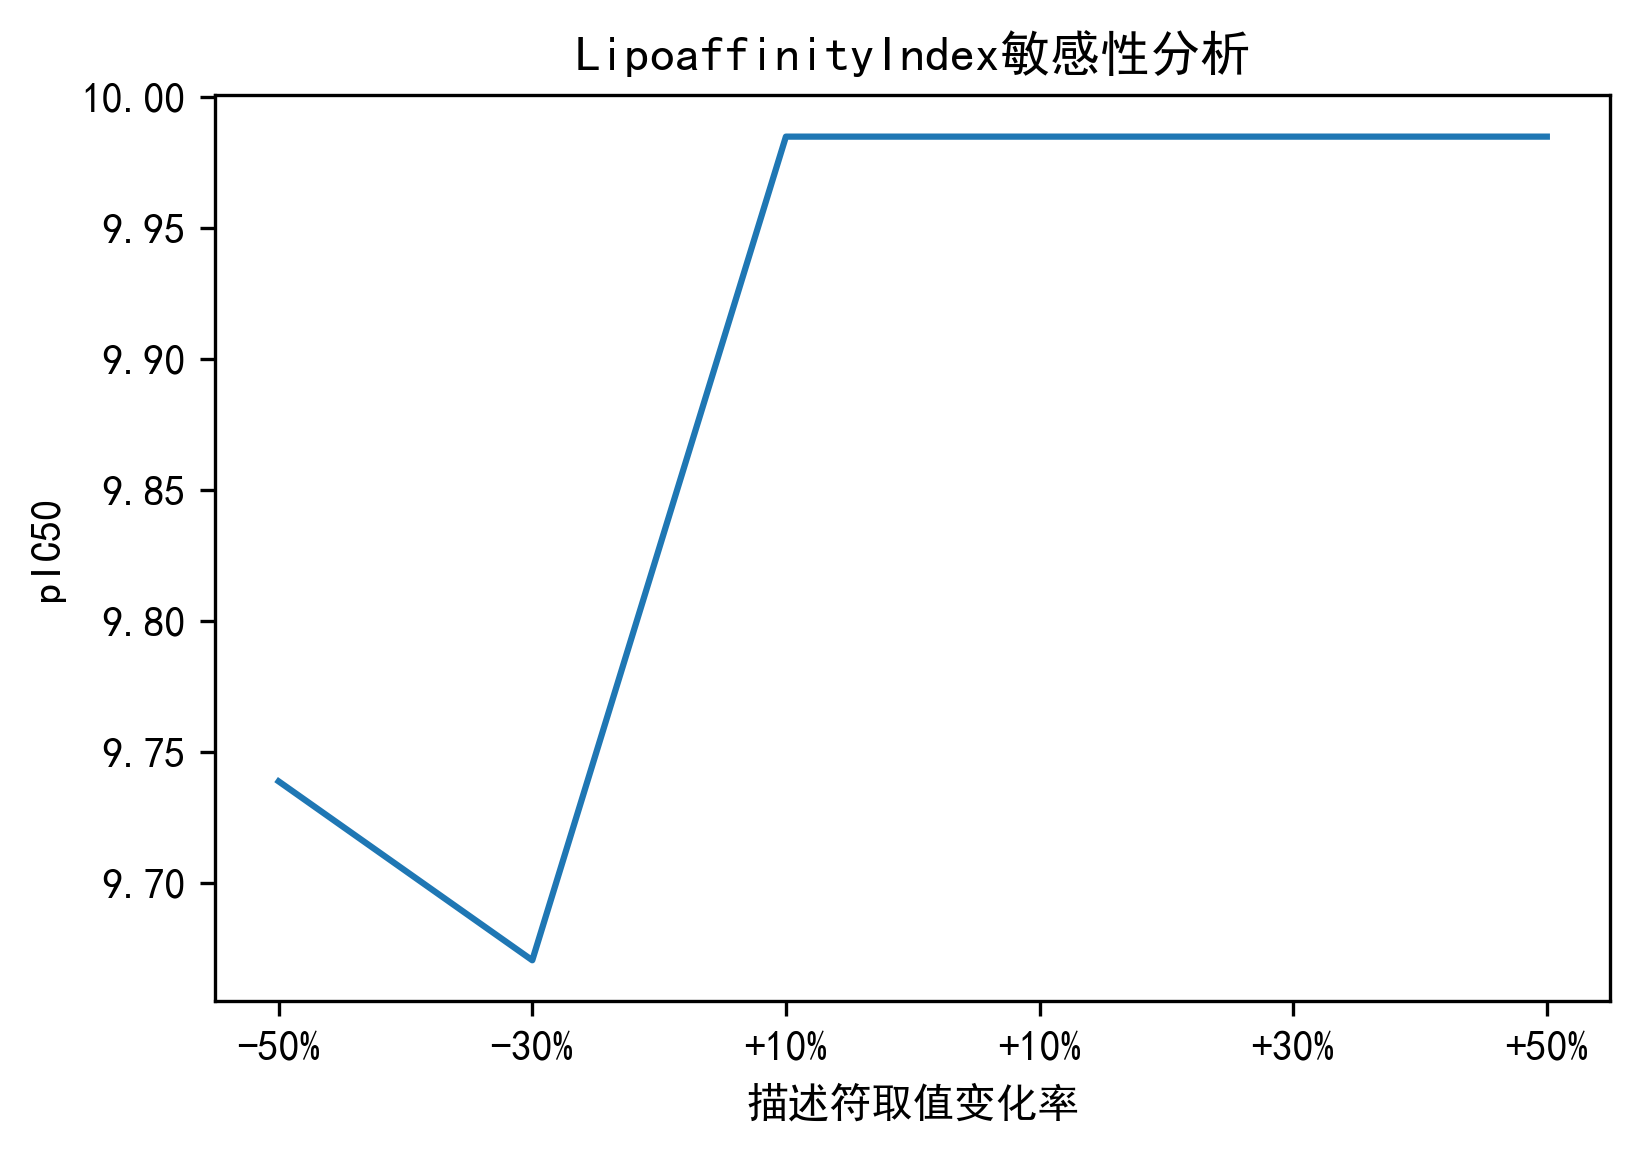

In [459]:
LipoaffinityIndex = pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
LipoaffinityIndex['LipoaffinityIndex'] = np.linspace(22.709649	*0.5,22.709649	*1.5,6)
X_TMP = min_max_scaler.transform(LipoaffinityIndex.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff3 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(6), ["-50%","-30%","+10%","+10%","+30%","+50%"] )
plt.title("LipoaffinityIndex敏感性分析",)
plt.xlabel("描述符取值变化率")
plt.ylabel("pIC50")
plt.savefig("LipoaffinityIndex敏感性.jpg",dpi = 300)
plt.plot(range(len(ff3)),ff3)
ff3

array([9.52850316, 9.52402007, 9.06911026, 9.96334717, 9.77225022,
       9.76136558])

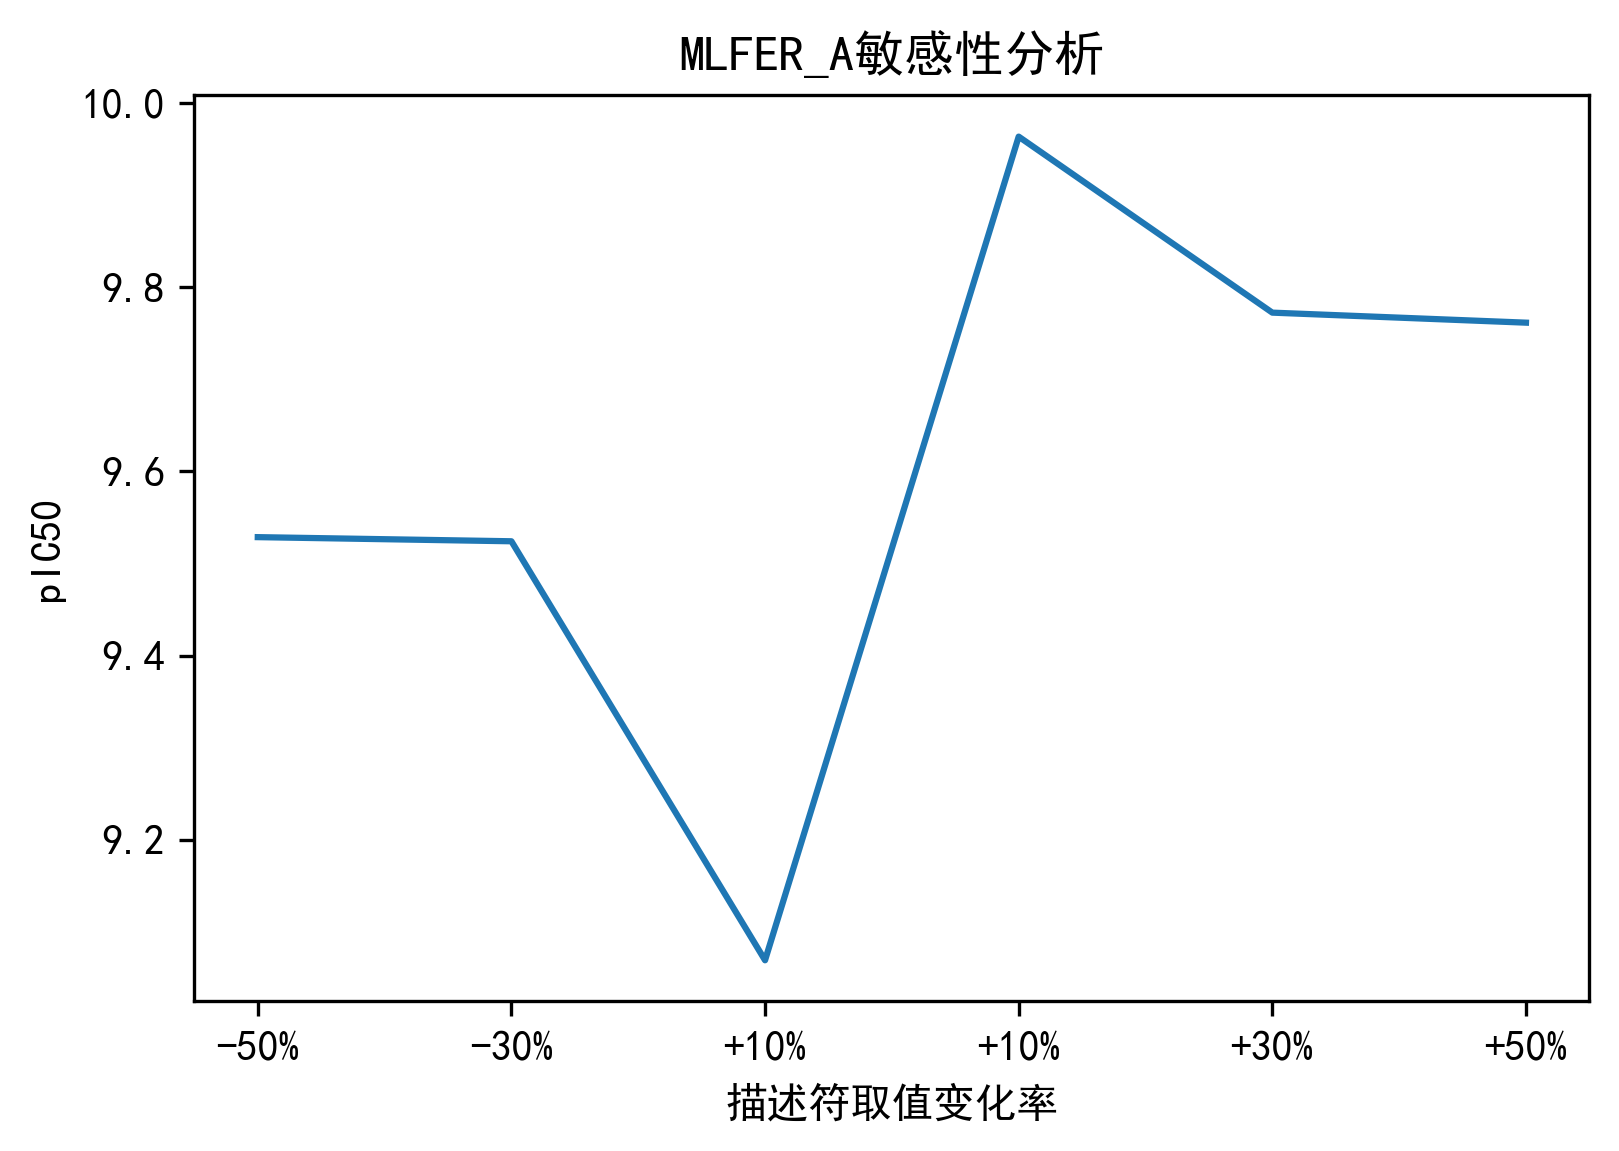

In [461]:
MLFER_A	 = pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
MLFER_A	['MLFER_A'] = np.linspace(0.961799	*0.5,0.961799*1.5,6)
X_TMP = min_max_scaler.transform(MLFER_A.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff3 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(6), ["-50%","-30%","+10%","+10%","+30%","+50%"] )
plt.title("MLFER_A敏感性分析",)
plt.xlabel("描述符取值变化率")
plt.ylabel("pIC50")
plt.savefig("MLFER_A敏感性.jpg",dpi = 300)
plt.plot(range(len(ff3)),ff3)
ff3

array([9.64613683, 9.63651213, 9.66574278, 9.98491777, 9.73199869,
       9.70388387])

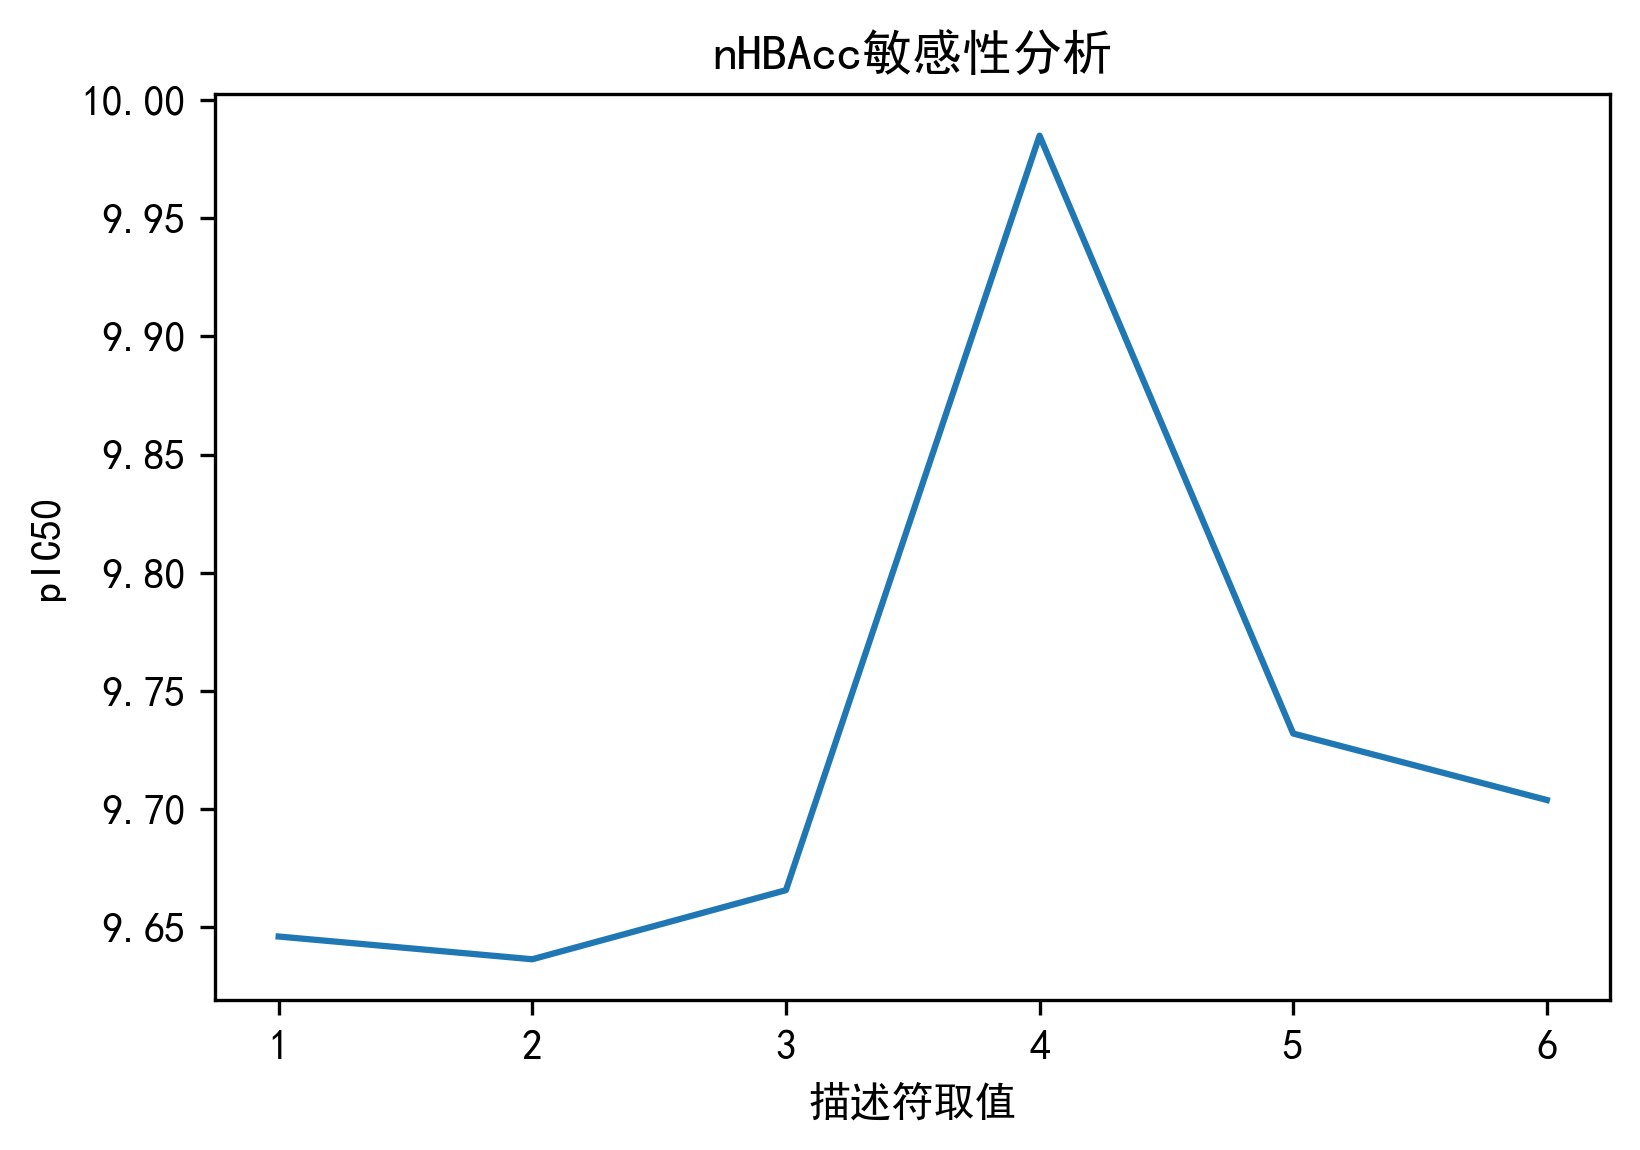

In [463]:
nHBAcc	 = pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
nHBAcc	['nHBAcc'] = range(1,7)
X_TMP = min_max_scaler.transform(nHBAcc.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff3 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(6), ["1","2","3","4","5","6"] )
plt.title("nHBAcc敏感性分析",)
plt.xlabel("描述符取值")
plt.ylabel("pIC50")
plt.savefig("nHBAcc敏感性.jpg",dpi = 300)
plt.plot(range(len(ff3)),ff3)
ff3

array([9.89267564, 9.98491777, 9.97145479, 9.9399076 , 9.70159554,
       9.70159554])

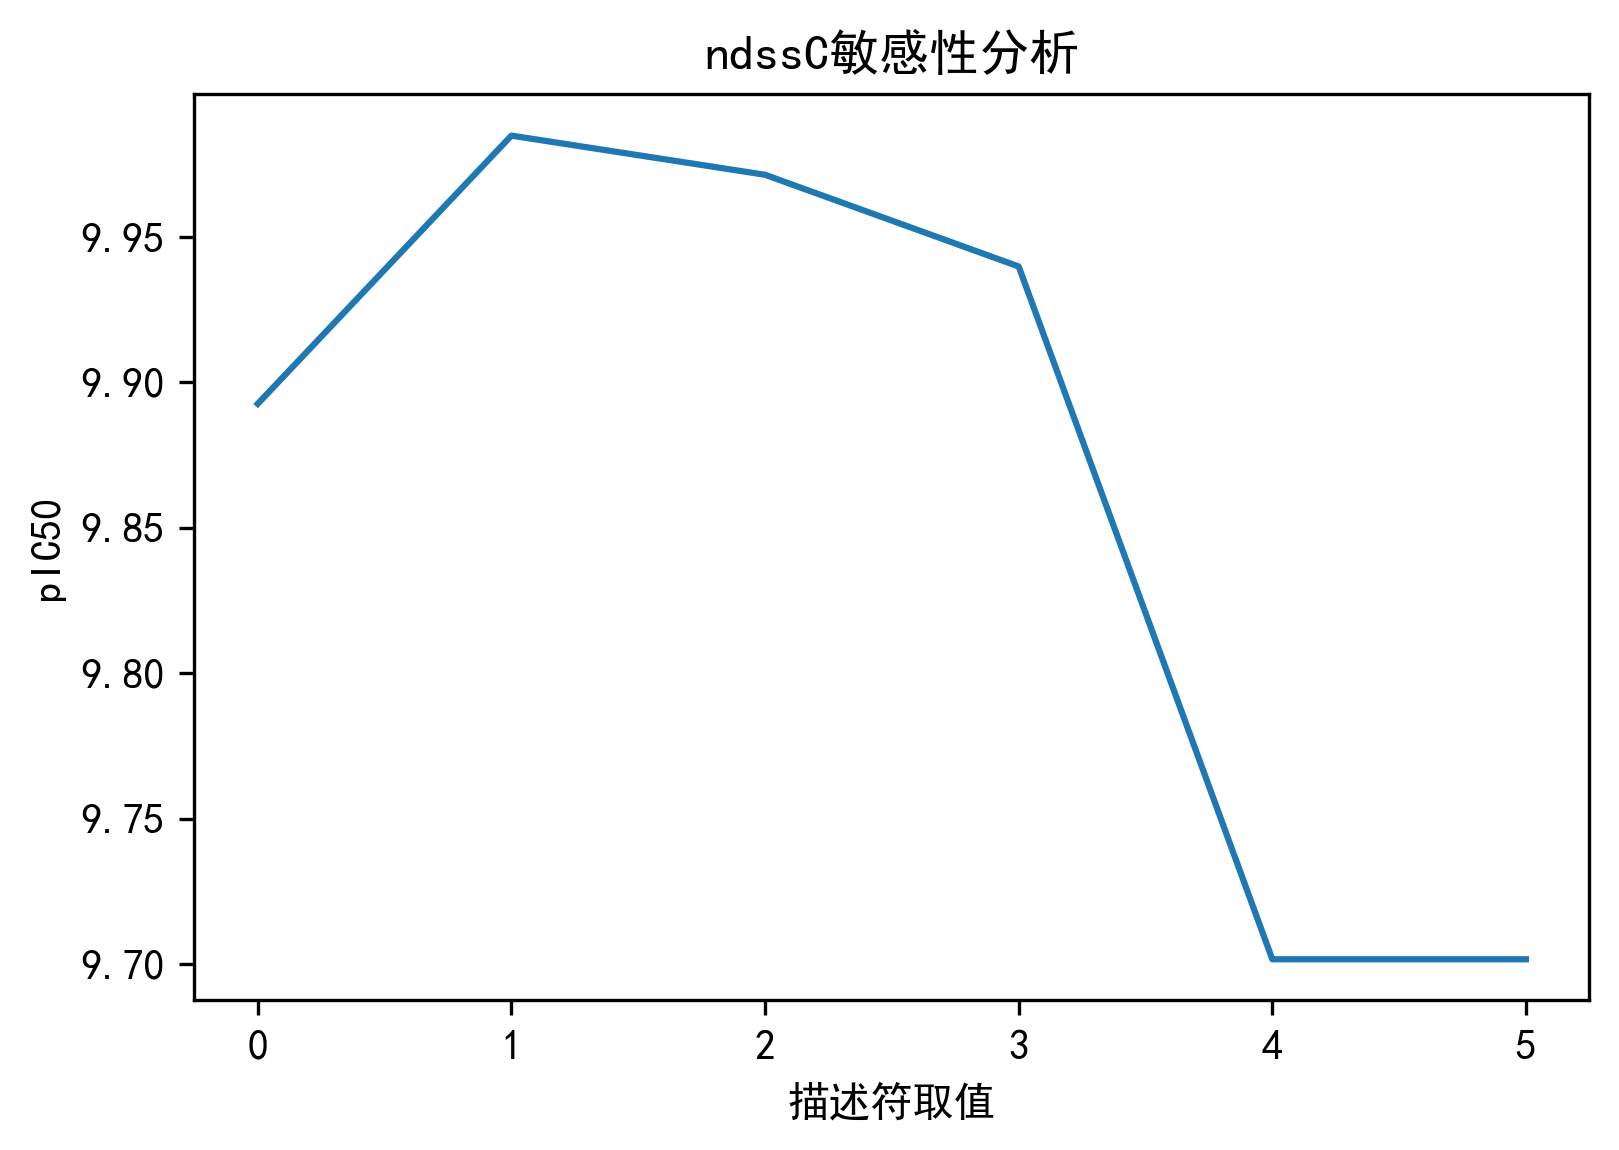

In [464]:
ndssC	 = pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
ndssC	['ndssC'] = range(0,6)
X_TMP = min_max_scaler.transform(ndssC.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff3 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(6), ["0","1","2","3","4","5"] )
plt.title("ndssC敏感性分析",)
plt.xlabel("描述符取值")
plt.ylabel("pIC50")
plt.savefig("ndssC敏感性.jpg",dpi = 300)
plt.plot(range(len(ff3)),ff3)
ff3

D:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


array([9.13262288, 9.13367635, 9.84588917, 9.95285559, 9.9368349 ,
       9.90254519])

D:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


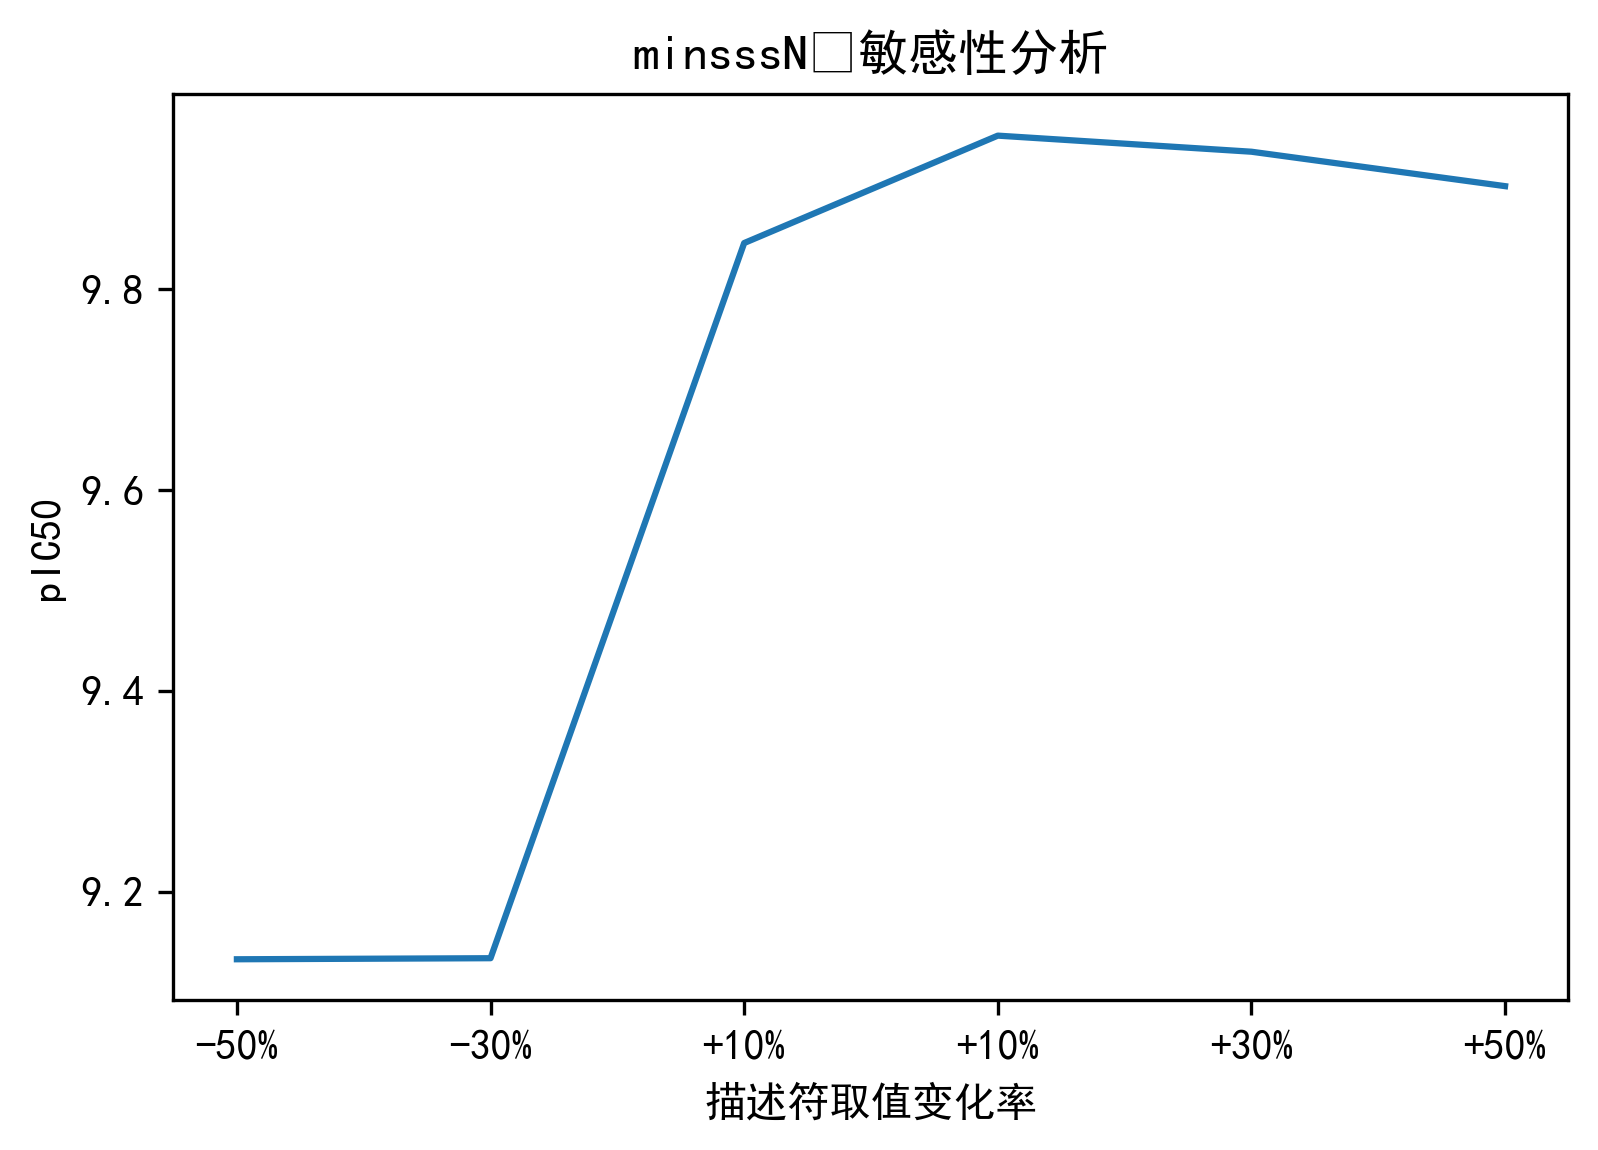

In [467]:
minsssN	 = pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
minsssN	['minsssN'] = np.linspace(1.810968*0.5,1.810968*1.5,6)
X_TMP = min_max_scaler.transform(minsssN.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff3 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(6), ["-50%","-30%","+10%","+10%","+30%","+50%"] )
plt.title("minsssN	敏感性分析",)
plt.xlabel("描述符取值变化率")
plt.ylabel("pIC50")
plt.savefig("minsssN敏感性.jpg",dpi = 300)
plt.plot(range(len(ff3)),ff3)
ff3

array([9.95579118, 9.95085818, 9.96849025, 9.93394835, 9.93458494,
       9.92455108])

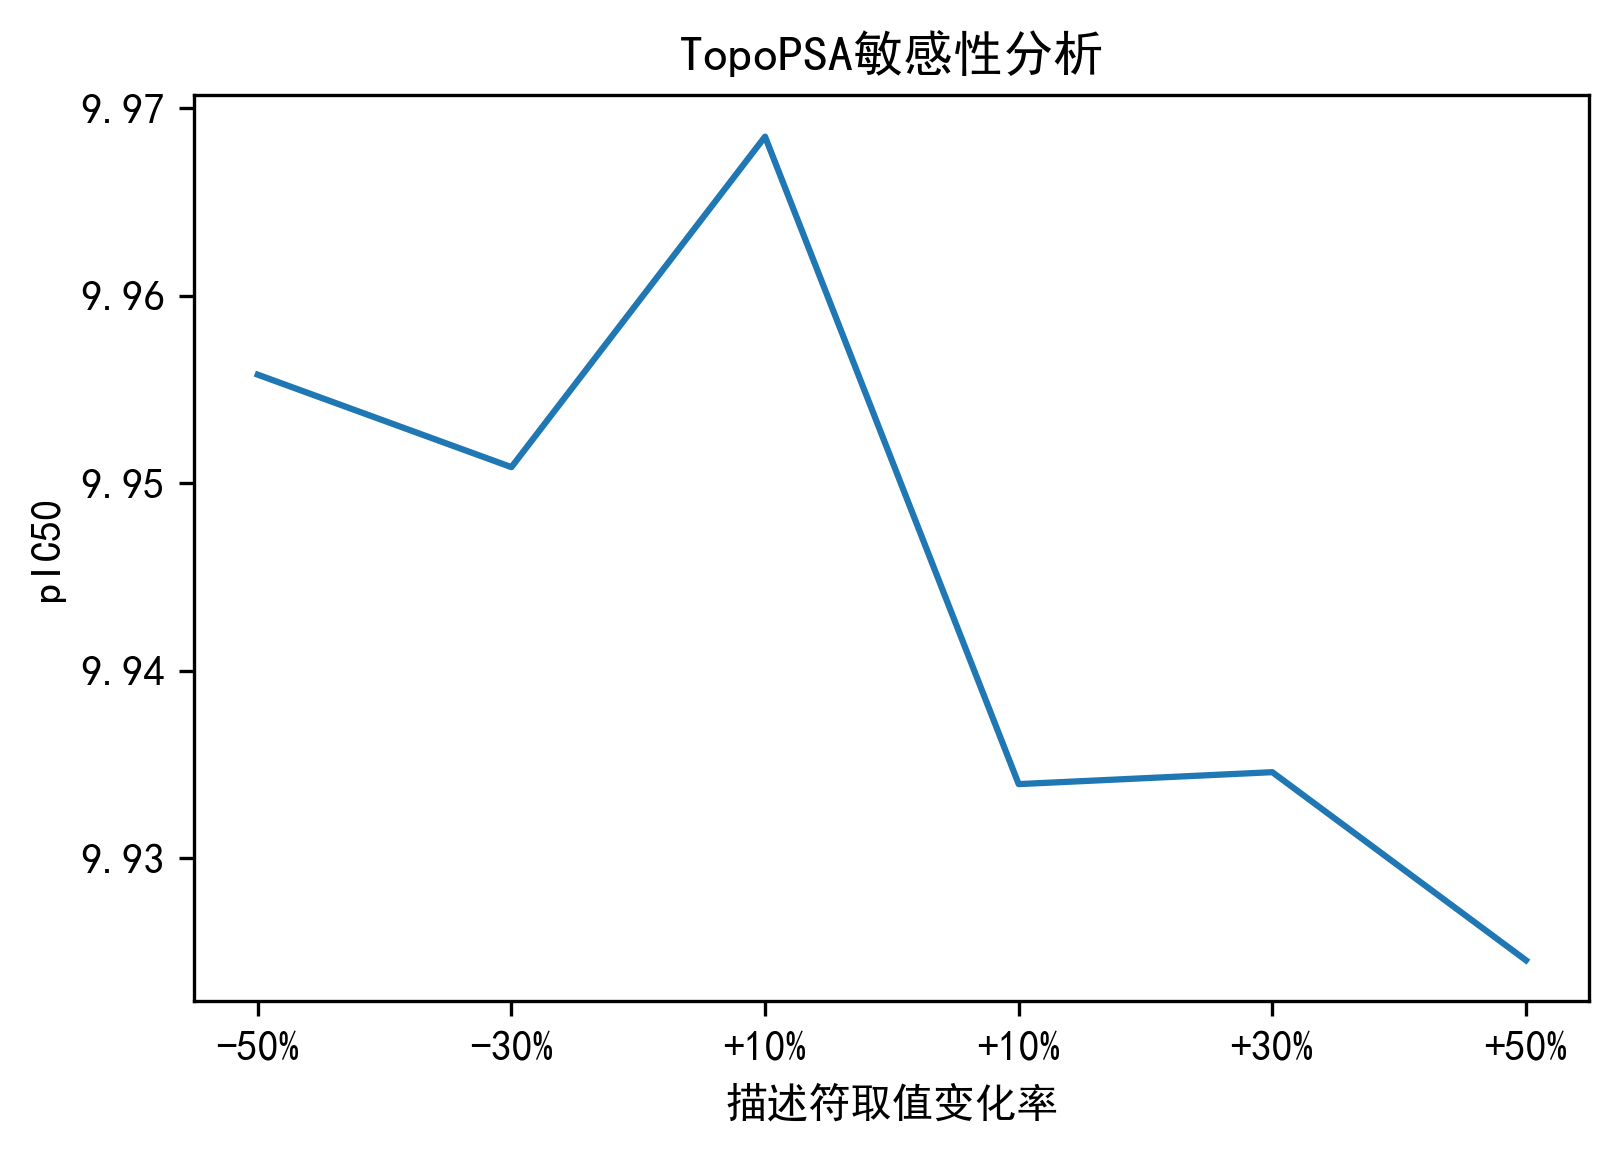

In [468]:
TopoPSA	 = pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
TopoPSA	['TopoPSA'] = np.linspace(44.568965*0.5,44.568965*1.5,6)
X_TMP = min_max_scaler.transform(TopoPSA.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff3 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(6), ["-50%","-30%","+10%","+10%","+30%","+50%"] )
plt.title("TopoPSA敏感性分析",)
plt.xlabel("描述符取值变化率")
plt.ylabel("pIC50")
plt.savefig("TopoPSA敏感性.jpg",dpi = 300)
plt.plot(range(len(ff3)),ff3)
ff3

array([9.07342149, 8.9965036 , 9.37671995, 9.86177338, 9.92168238,
       9.92041871])

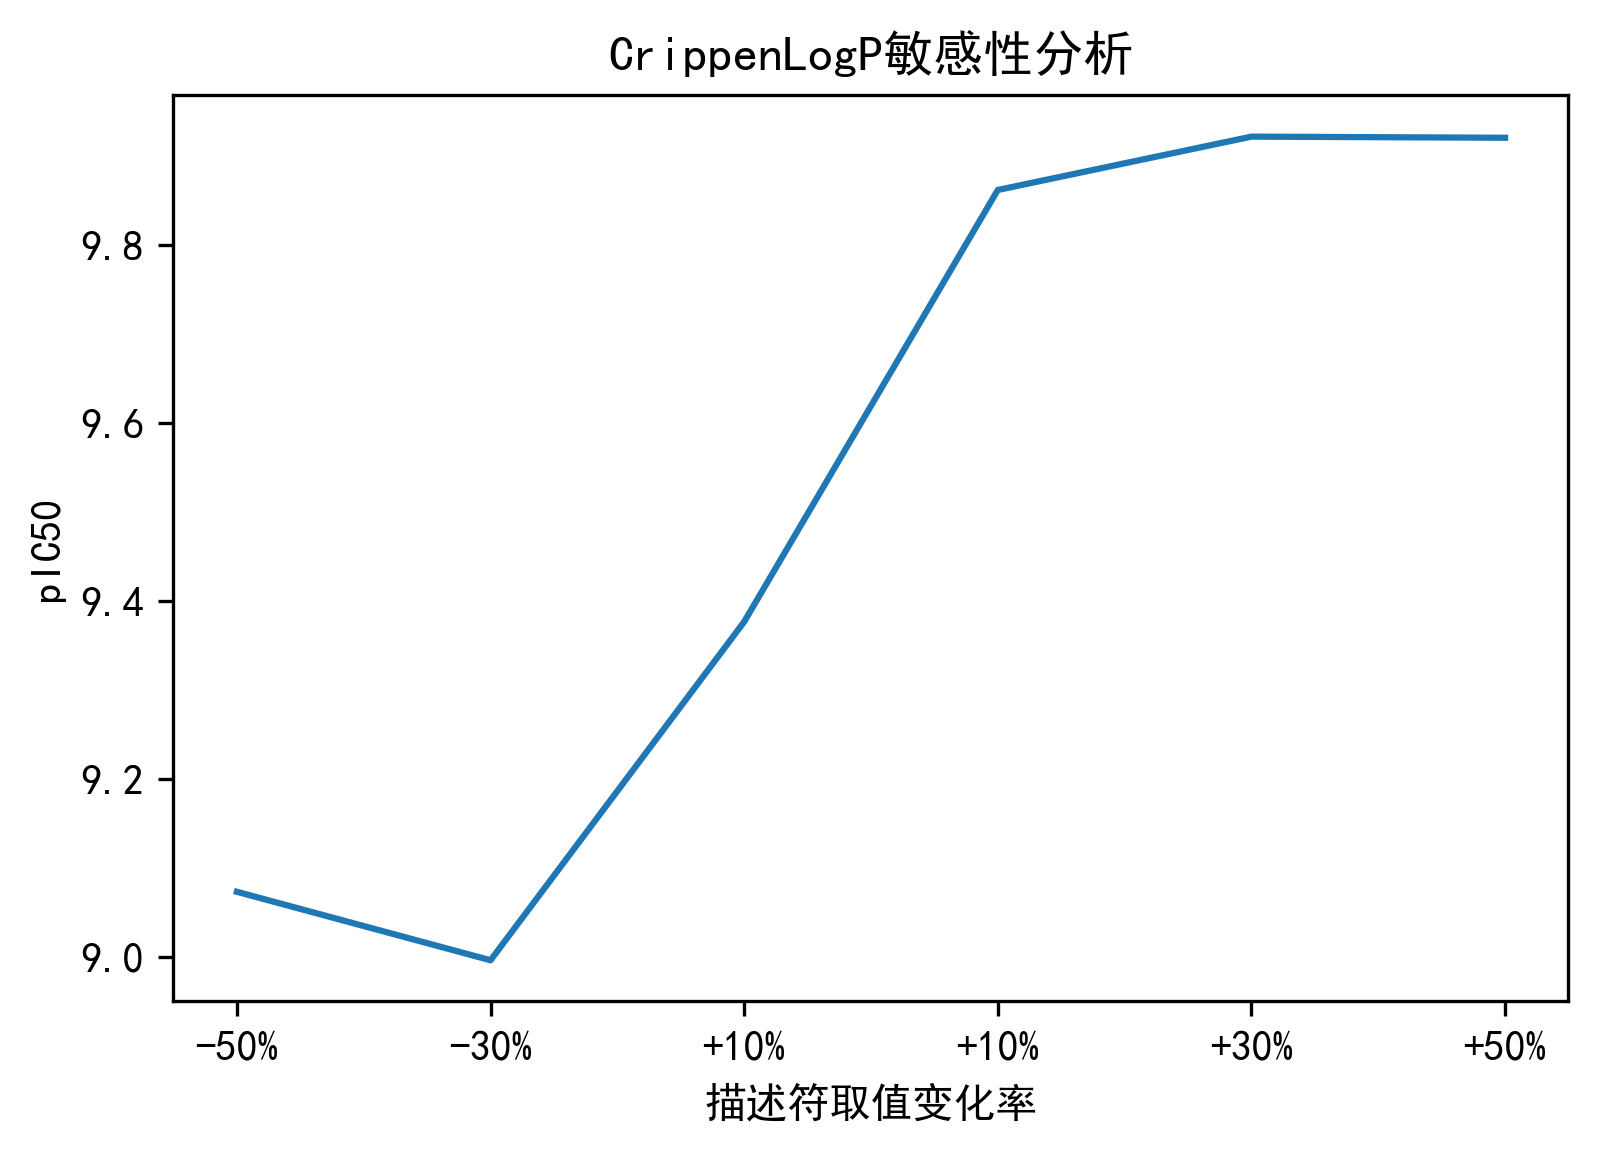

In [469]:
CrippenLogP	 = pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
CrippenLogP	['CrippenLogP'] = np.linspace(5.229181*0.5,5.229181*1.5,6)
X_TMP = min_max_scaler.transform(CrippenLogP.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff3 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(6), ["-50%","-30%","+10%","+10%","+30%","+50%"] )
plt.title("CrippenLogP敏感性分析",)
plt.xlabel("描述符取值变化率")
plt.ylabel("pIC50")
plt.savefig("CrippenLogP敏感性.jpg",dpi = 300)
plt.plot(range(len(ff3)),ff3)
ff3

array([9.98491777, 9.98491777, 9.98491777, 9.98491777, 9.98491777,
       9.98491777])

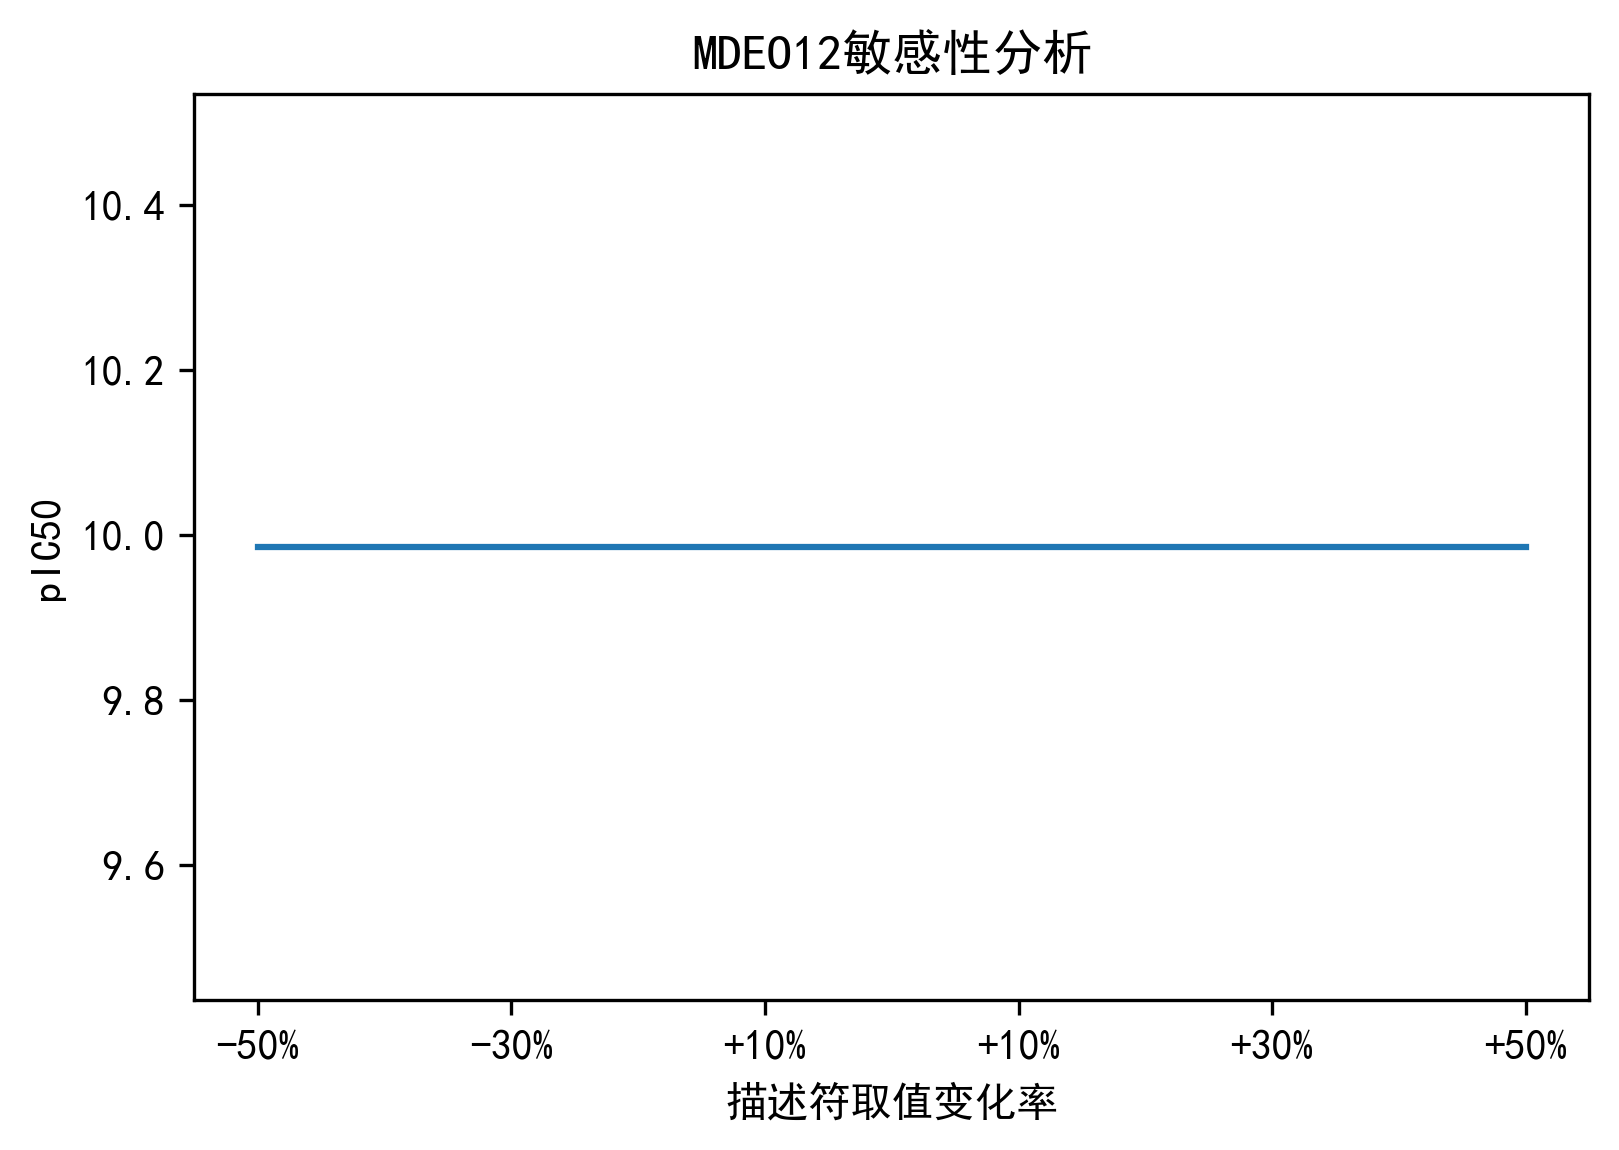

In [470]:
MDEO12	= pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
MDEO12	['MDEO-12'] = np.linspace(4.383745e-08*0.5,4.383745e-08*1.5,6)
X_TMP = min_max_scaler.transform(MDEO12.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff3 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(6), ["-50%","-30%","+10%","+10%","+30%","+50%"] )
plt.title("MDEO12敏感性分析",)
plt.xlabel("描述符取值变化率")
plt.ylabel("pIC50")
plt.savefig("MDEO12敏感性.jpg",dpi = 300)
plt.plot(range(len(ff3)),ff3)
ff3

array([9.98053401, 9.9805734 , 9.9805734 , 9.94755689, 9.87442439,
       9.87442439])

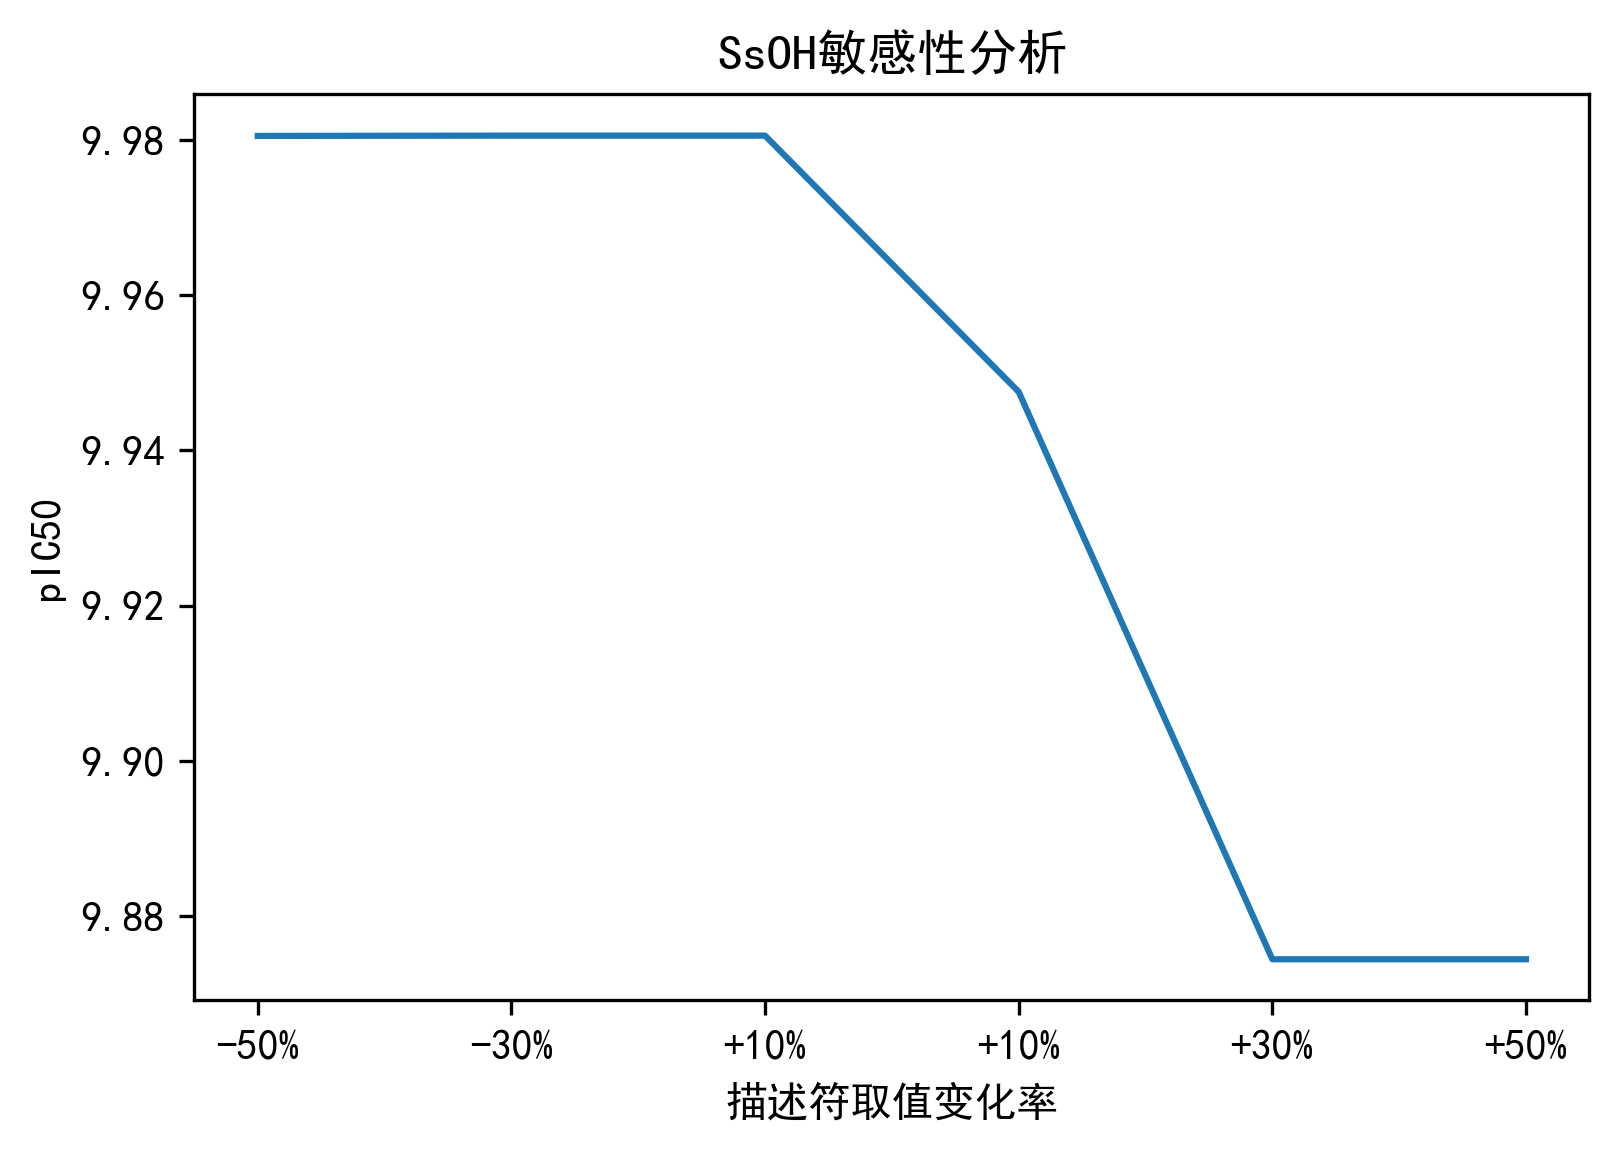

In [471]:
SsOH= pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
SsOH['SsOH'] = np.linspace(8.818537*0.5,8.818537*1.5,6)
X_TMP = min_max_scaler.transform(SsOH.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff3 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(6), ["-50%","-30%","+10%","+10%","+30%","+50%"] )
plt.title("SsOH敏感性分析",)
plt.xlabel("描述符取值变化率")
plt.ylabel("pIC50")
plt.savefig("SsOH敏感性.jpg",dpi = 300)
plt.plot(range(len(ff3)),ff3)
ff3

D:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


array([9.00670989, 8.97405796, 9.77117809, 9.93003451, 9.90082122,
       9.90082122])

D:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


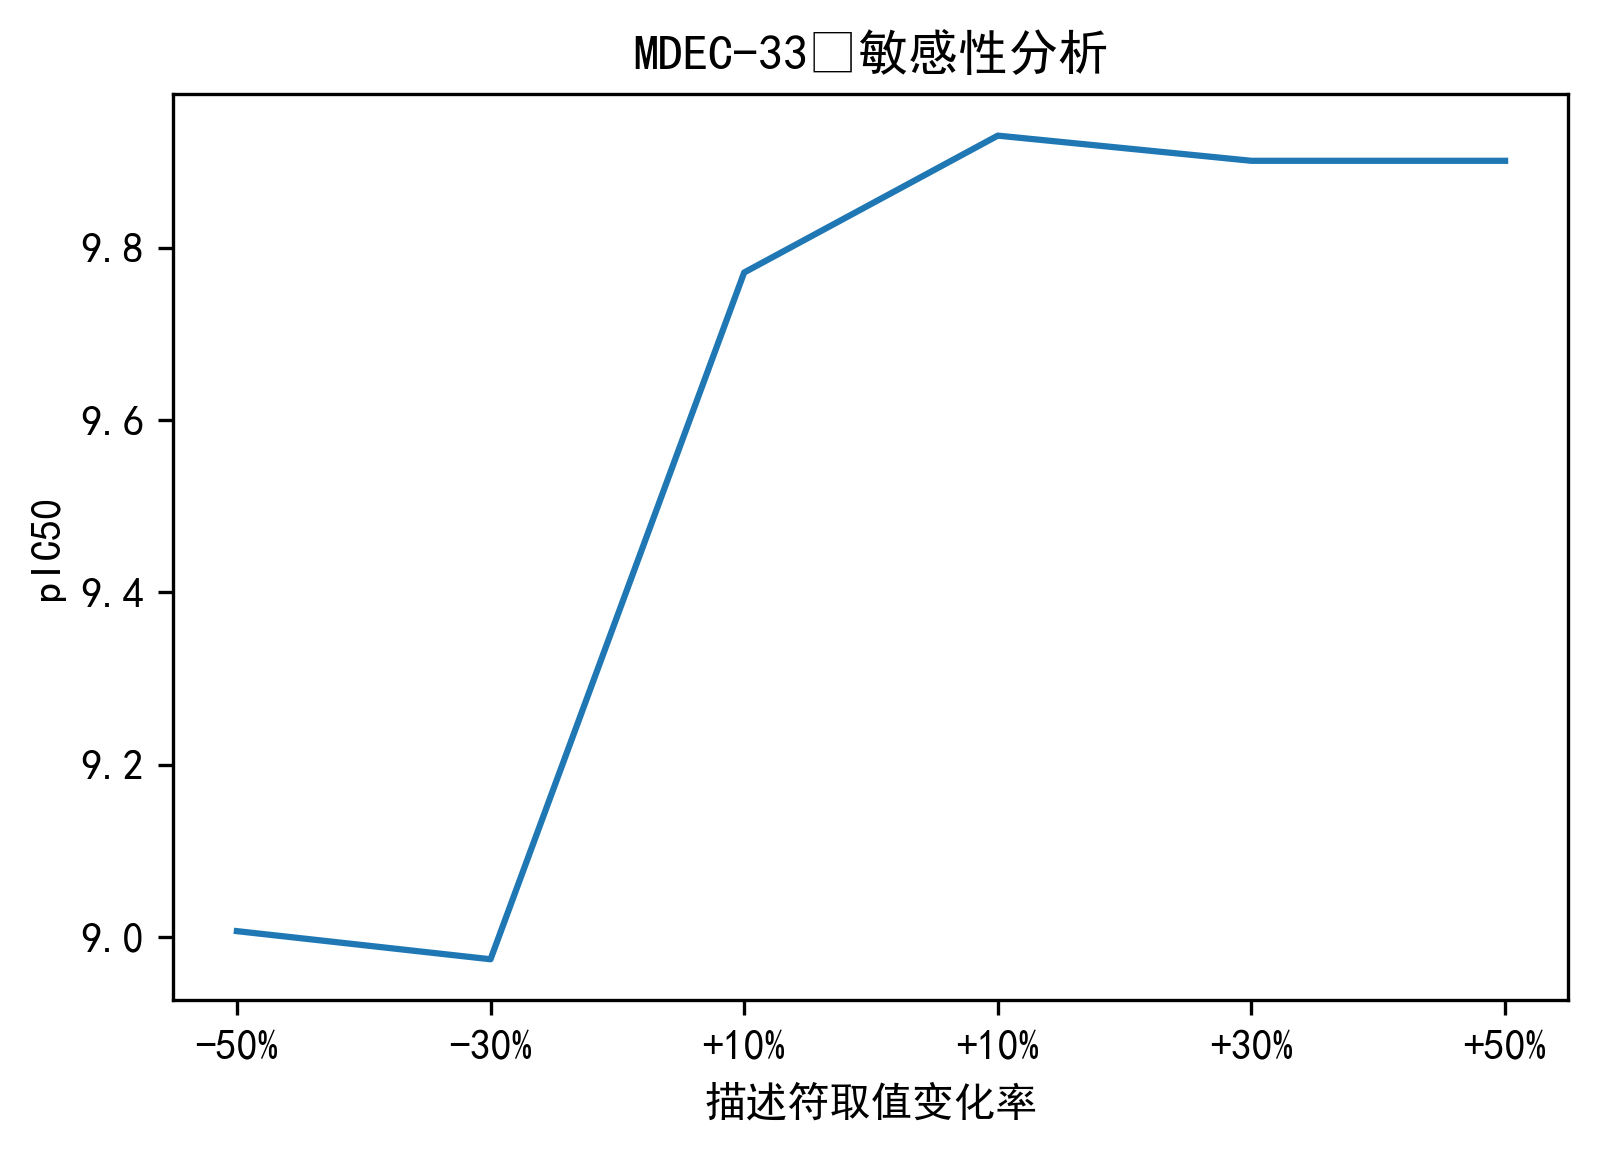

In [473]:
MDEC33	= pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
MDEC33	['MDEC-33'] = np.linspace(17.257408*0.5,17.257408*1.5,6)
X_TMP = min_max_scaler.transform(MDEC33.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff3 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(6), ["-50%","-30%","+10%","+10%","+30%","+50%"] )
plt.title("MDEC-33	敏感性分析",)
plt.xlabel("描述符取值变化率")
plt.ylabel("pIC50")
plt.savefig("MDEC-33敏感性.jpg",dpi = 300)
plt.plot(range(len(ff3)),ff3)
ff3

array([9.83046641, 9.86540707, 9.95324887, 9.97862215, 9.94987716,
       9.81303816])

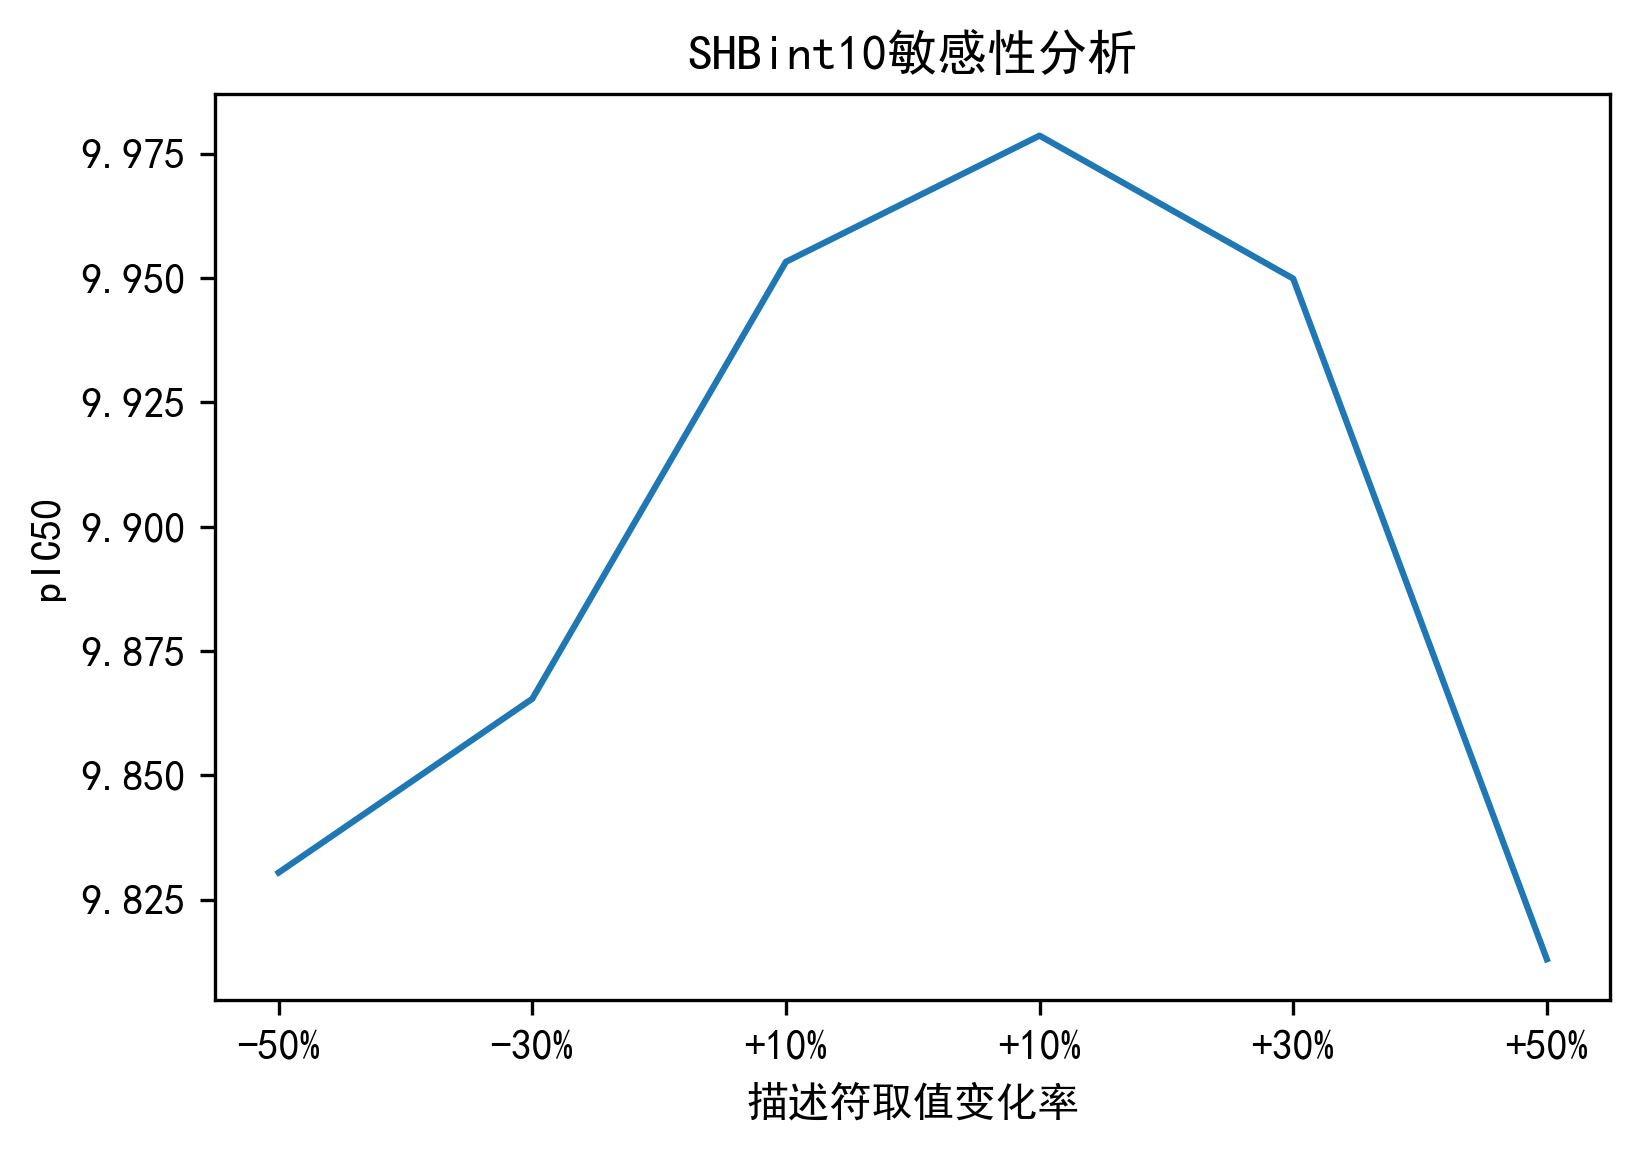

In [474]:
SHBint10= pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
SHBint10['SHBint10'] = np.linspace(8.160617*0.5,8.160617*1.5,6)
X_TMP = min_max_scaler.transform(SHBint10.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff3 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(6), ["-50%","-30%","+10%","+10%","+30%","+50%"] )
plt.title("SHBint10敏感性分析",)
plt.xlabel("描述符取值变化率")
plt.ylabel("pIC50")
plt.savefig("SHBint10敏感性.jpg",dpi = 300)
plt.plot(range(len(ff3)),ff3)
ff3

array([9.37457549, 9.62959626, 9.92314107, 9.95907628, 9.68911947,
       9.67911521])

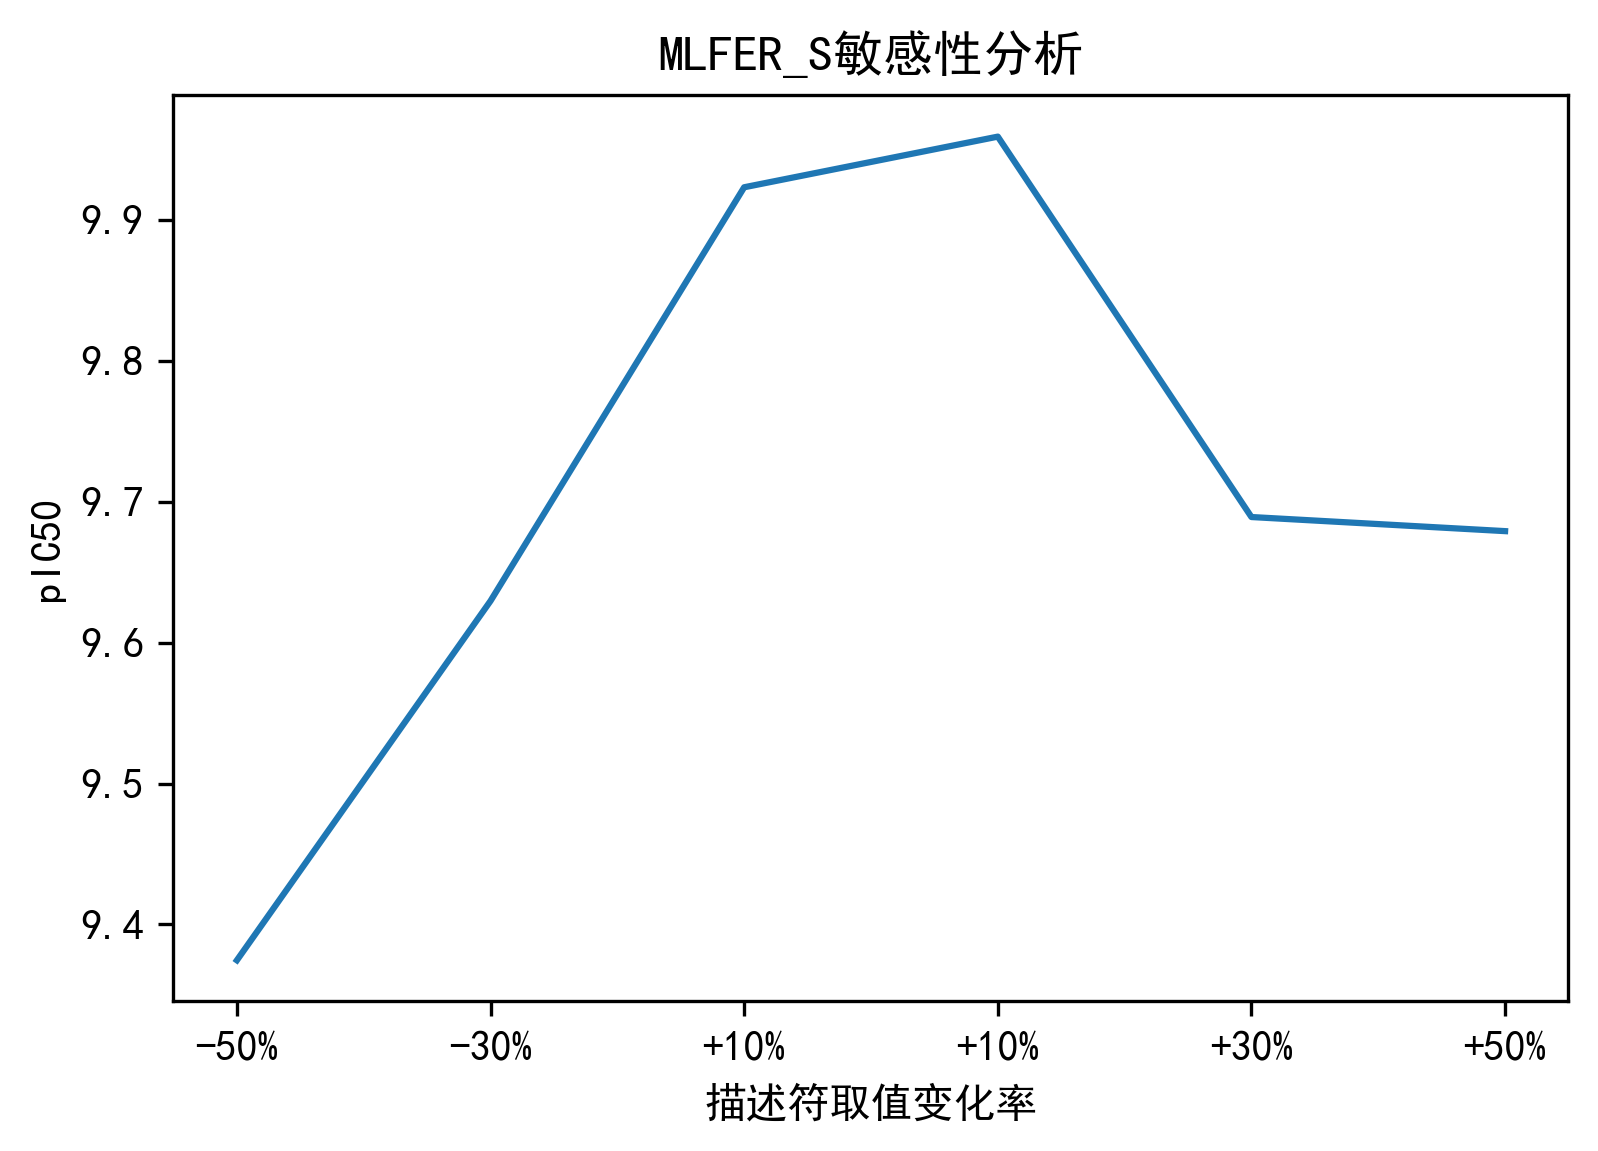

In [478]:
MLFER_S	= pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
MLFER_S	['MLFER_S'] = np.linspace(2.192305*0.5,2.192305*1.5,6)
X_TMP = min_max_scaler.transform(MLFER_S.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff3 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(6), ["-50%","-30%","+10%","+10%","+30%","+50%"] )
plt.title("MLFER_S敏感性分析",)
plt.xlabel("描述符取值变化率")
plt.ylabel("pIC50")
plt.savefig("MLFER_S敏感性.jpg",dpi = 300)
plt.plot(range(len(ff3)),ff3)
ff3

array([8.93972592, 9.87527128, 9.95371638, 9.98455207, 9.96479487,
       9.65072506])

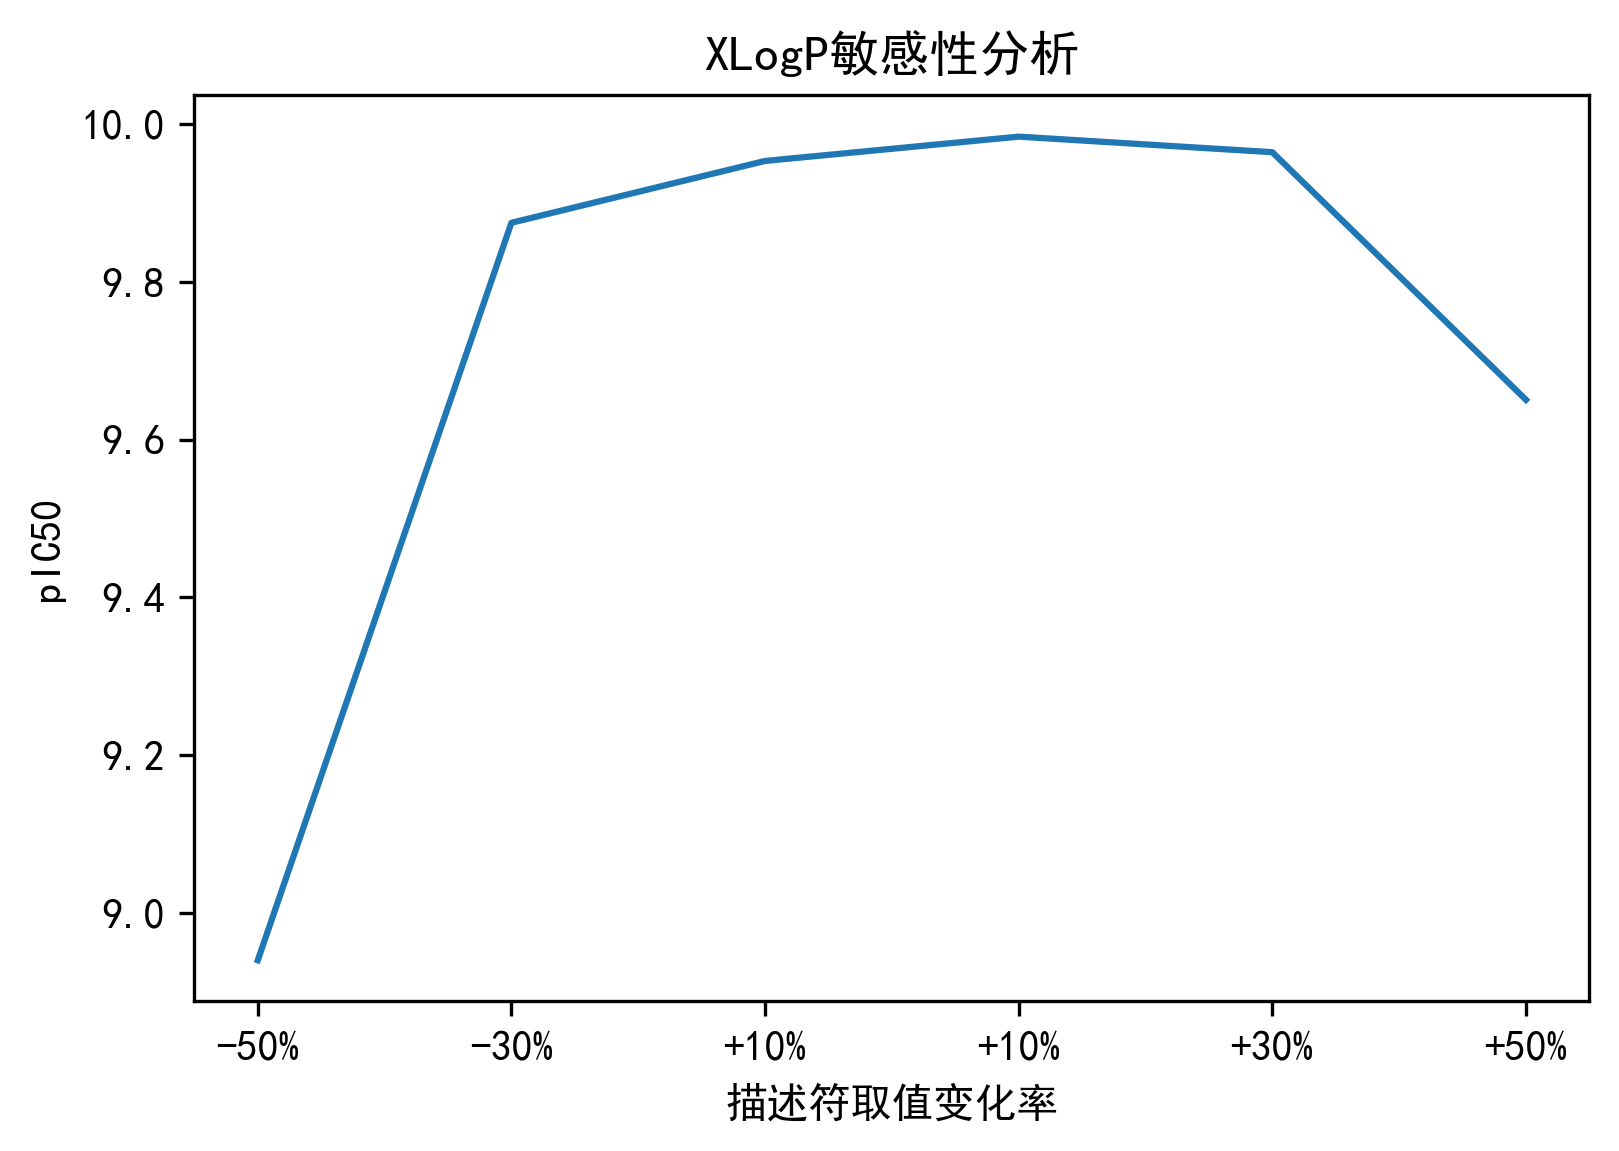

In [479]:
XLogP	= pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
XLogP['XLogP'] = np.linspace(3.125513*0.5,3.125513*1.5,6)
X_TMP = min_max_scaler.transform(XLogP.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff3 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(6), ["-50%","-30%","+10%","+10%","+30%","+50%"] )
plt.title("XLogP敏感性分析",)
plt.xlabel("描述符取值变化率")
plt.ylabel("pIC50")
plt.savefig("XLogP敏感性.jpg",dpi = 300)
plt.plot(range(len(ff3)),ff3)
ff3

array([9.96443473, 9.9655758 , 9.97981084, 9.9879495 , 9.89546591,
       9.88807093])

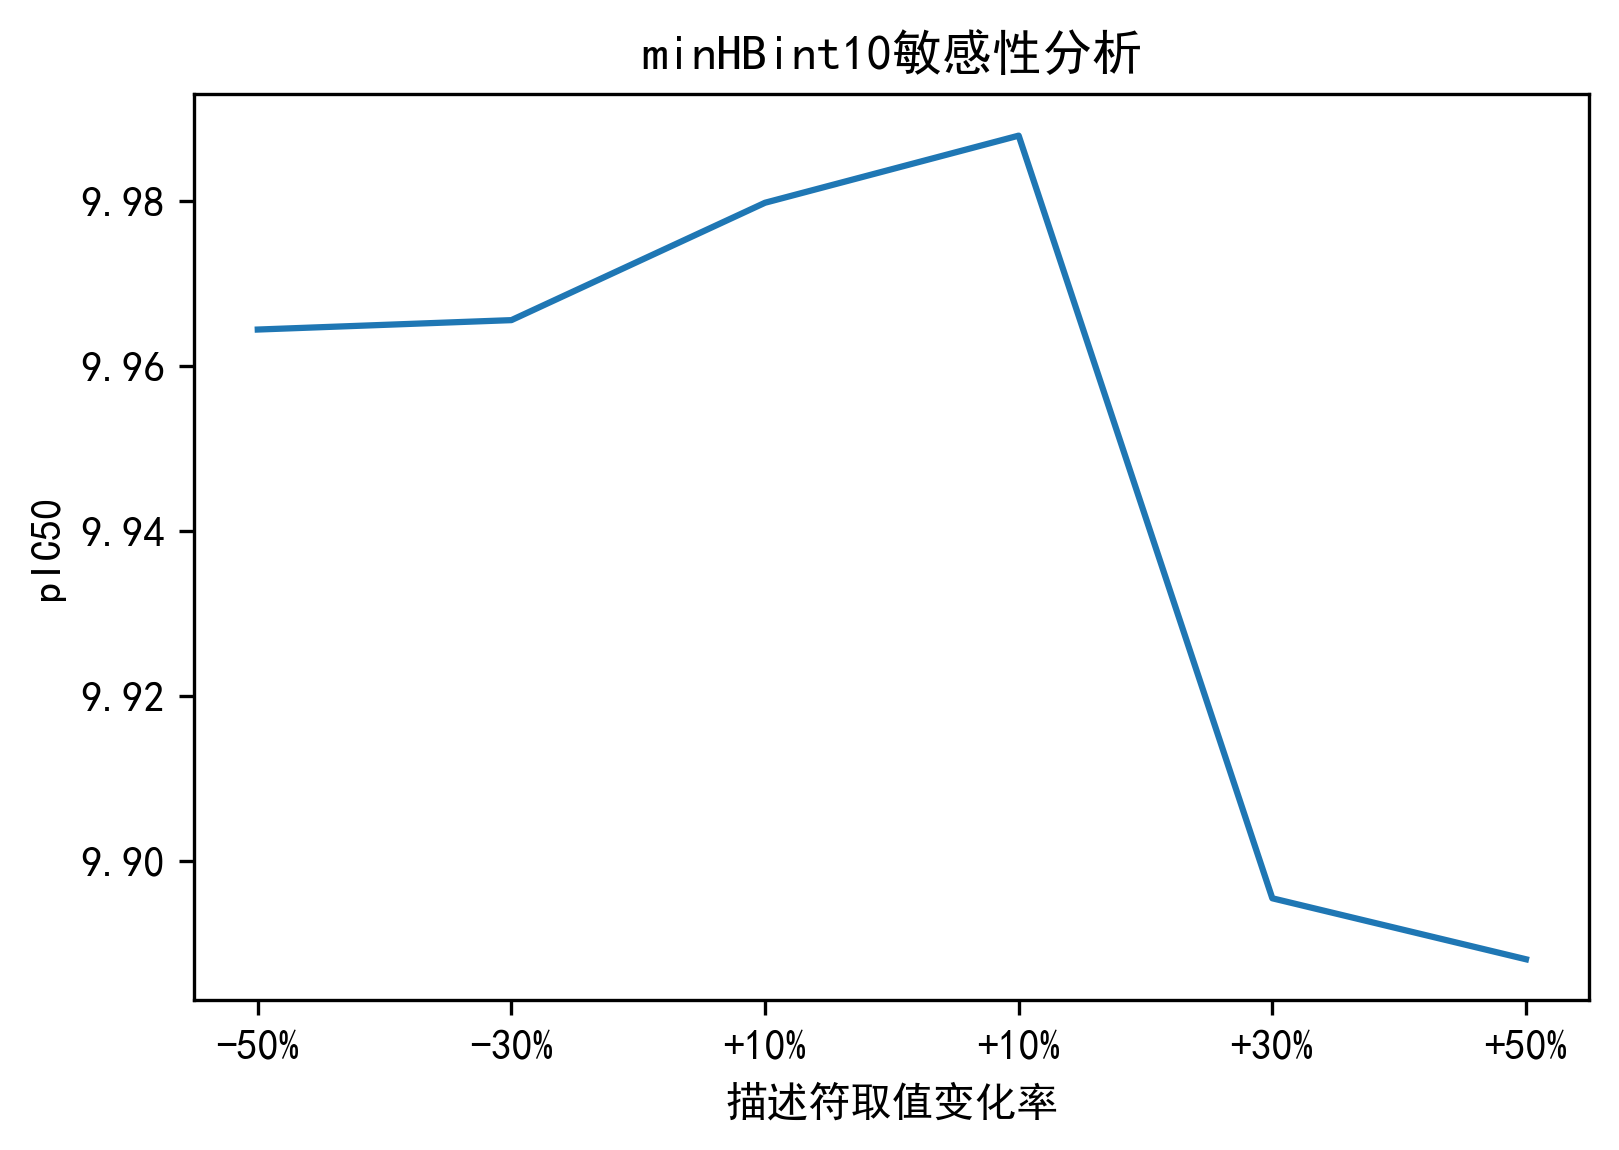

In [480]:
minHBint10	= pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
minHBint10['minHBint10'] = np.linspace(2.339581*0.5,2.339581*1.5,6)
X_TMP = min_max_scaler.transform(minHBint10.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff3 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(6), ["-50%","-30%","+10%","+10%","+30%","+50%"] )
plt.title("minHBint10敏感性分析",)
plt.xlabel("描述符取值变化率")
plt.ylabel("pIC50")
plt.savefig("minHBint10敏感性.jpg",dpi = 300)
plt.plot(range(len(ff3)),ff3)
ff3

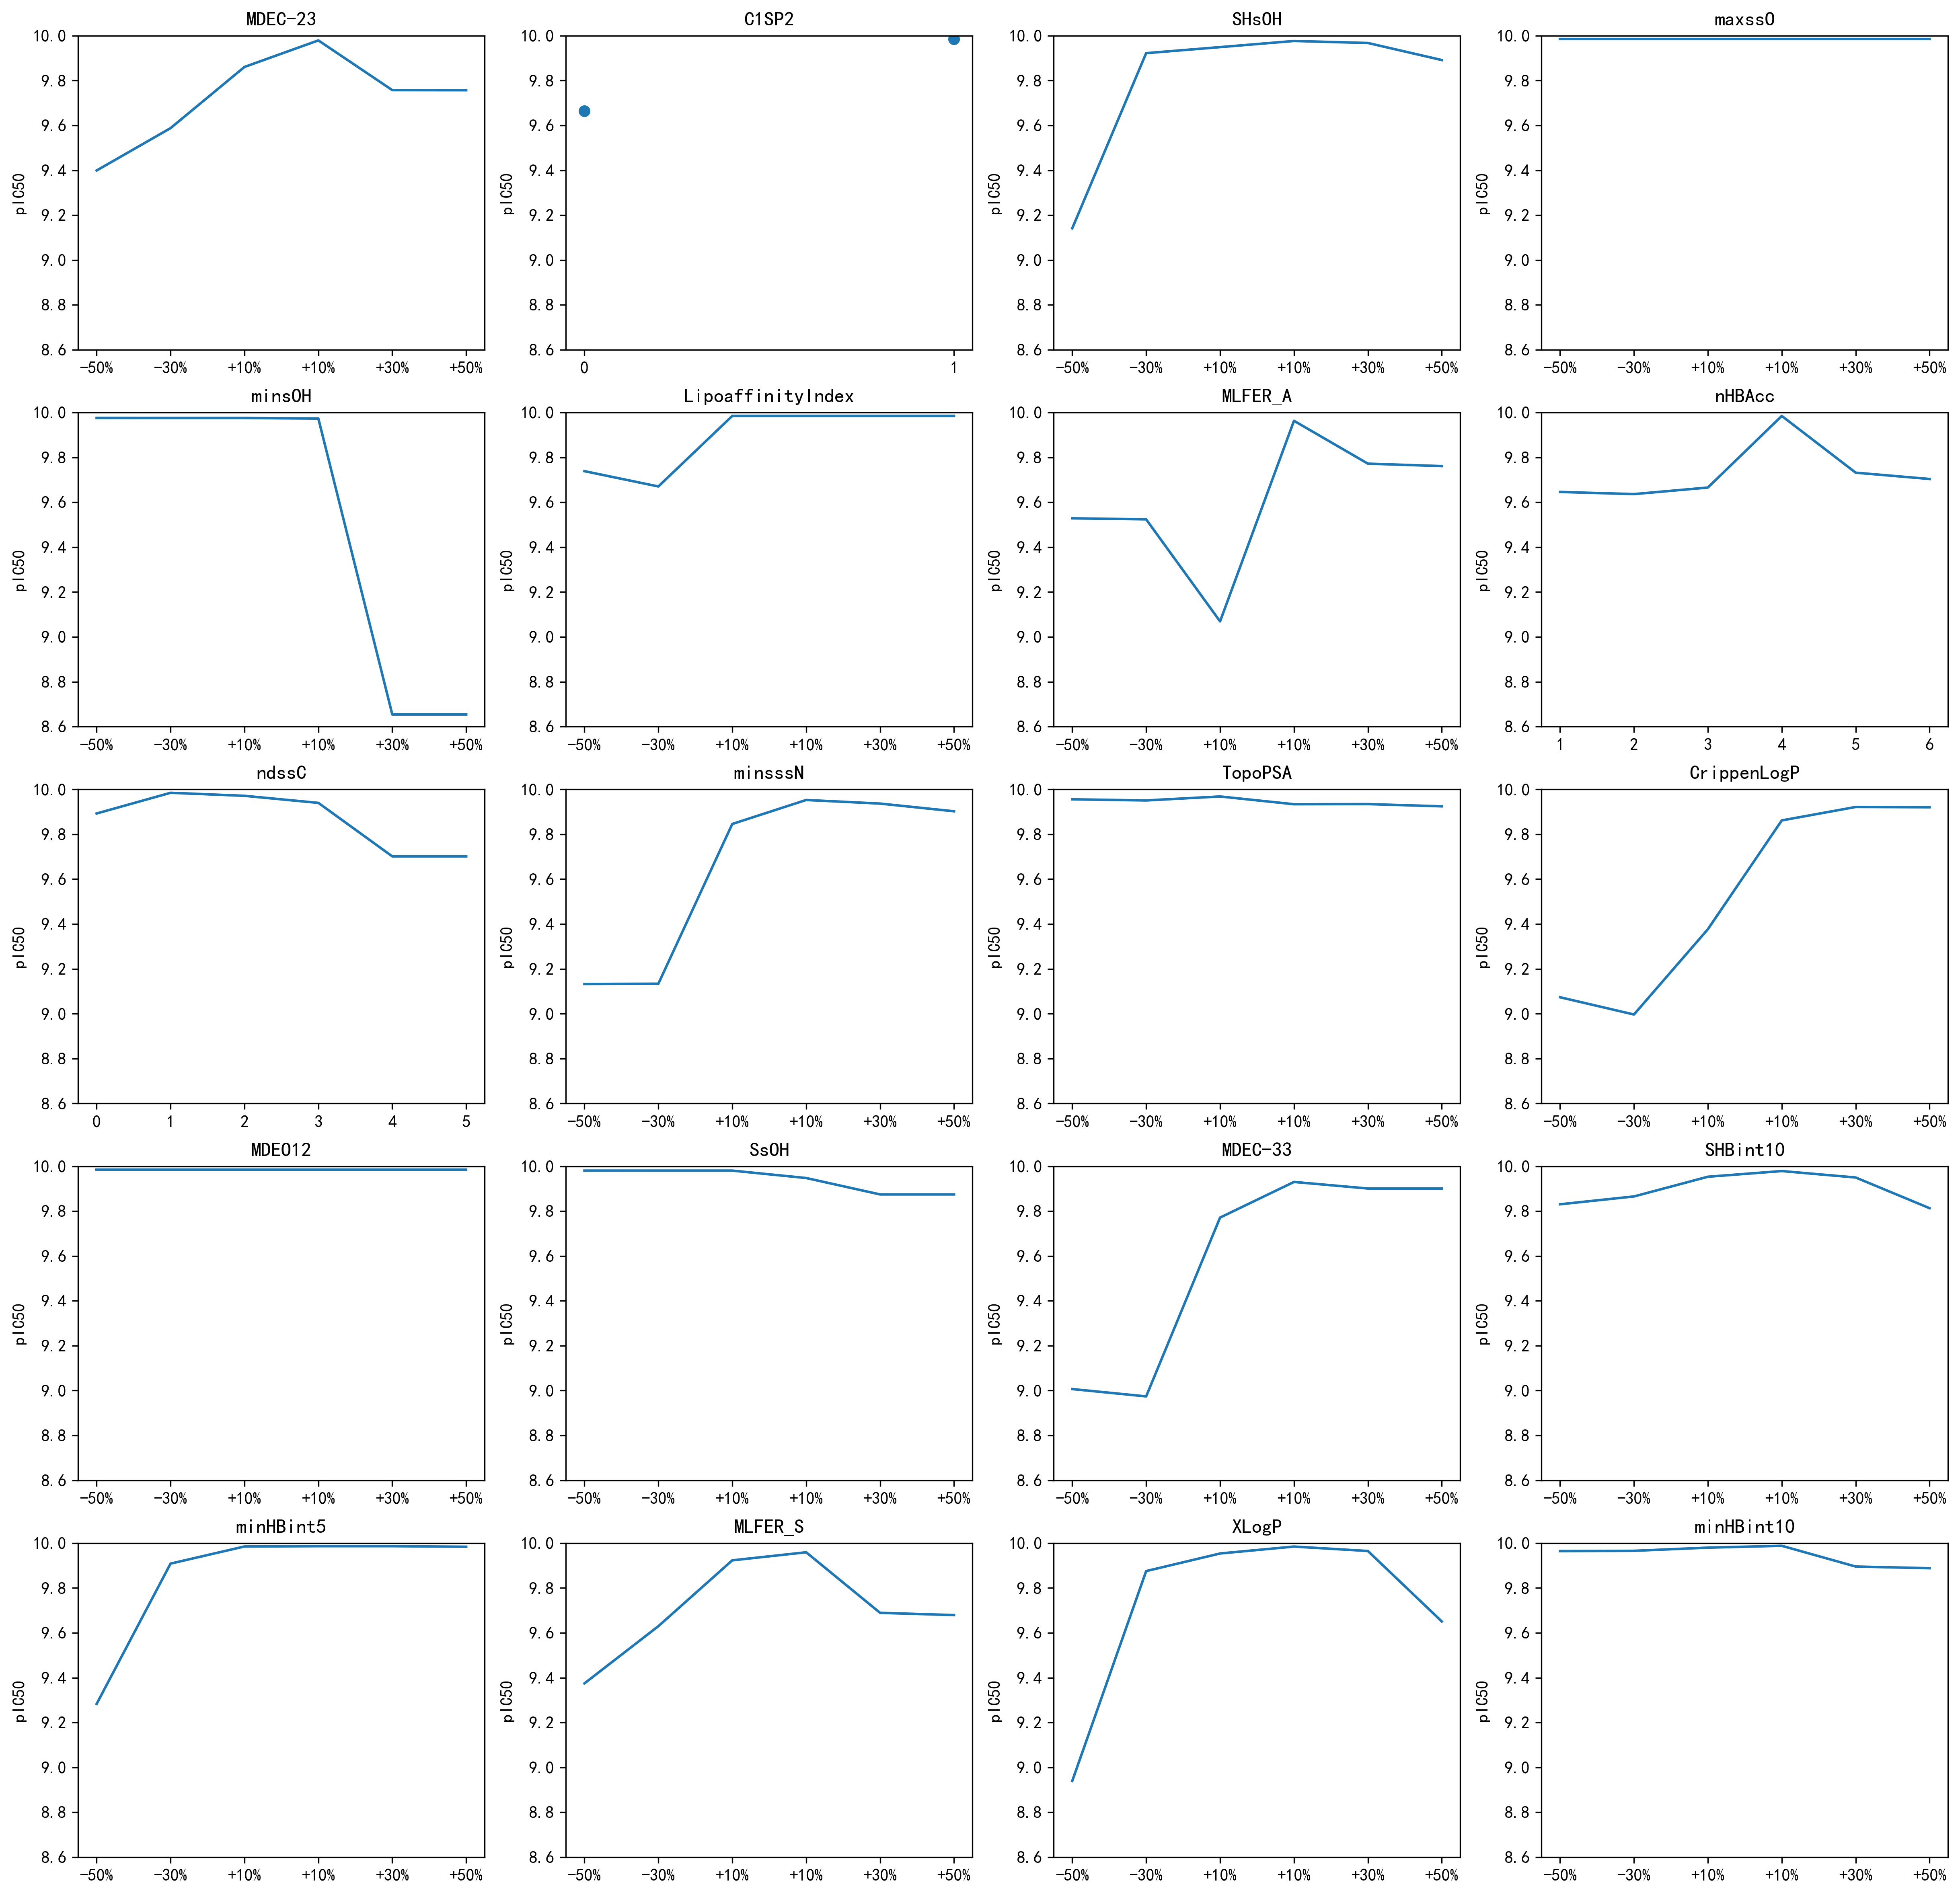

In [493]:
plt.figure(figsize=(20, 20))
plt.subplot(5, 4, 1)
MDEC23 = pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
MDEC23['MDEC-23'] = np.linspace(27.601303*0.5,27.601303*1.5,6)
X_TMP = min_max_scaler.transform(MDEC23.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff1 = (f1+f2) /2
plt.xticks( range(6), ["-50%","-30%","+10%","+10%","+30%","+50%"] )
plt.ylim(8.6,10)
plt.title("MDEC-23",)
# plt.xlabel("描述符取值变化率")
plt.ylabel("pIC50")
# plt.savefig("MDEC23敏感性.jpg",dpi = 300)
plt.plot(range(len(ff1)),ff1)

plt.subplot(5, 4, 2)
plt.ylim(8.6,10)
C1SP2 = pd.DataFrame(np.repeat(BEST.values,2,axis=0), columns=BEST.columns)
C1SP2['C1SP2'] =  range(0,2)
X_TMP = min_max_scaler.transform(C1SP2.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff3 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(2), ["0","1"] )
plt.title("C1SP2",)
# plt.xlabel("描述符取值")
plt.ylabel("pIC50")
# plt.savefig("C1SP2敏感性.jpg",dpi = 300)
plt.scatter(range(len(ff3)),ff3)

plt.subplot(5, 4, 3)
plt.ylim(8.6,10)
SHsOH = pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
SHsOH['SHsOH'] = np.linspace(0.697930*0.5,0.697930*1.5,6)
X_TMP = min_max_scaler.transform(SHsOH.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff2 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(6), ["-50%","-30%","+10%","+10%","+30%","+50%"] )
plt.title("SHsOH",)
# plt.xlabel("描述符取值变化率")
plt.ylabel("pIC50")
# plt.savefig("SHsOH敏感性.jpg",dpi = 300)
plt.plot(range(len(ff2)),ff2)

plt.subplot(5, 4, 4)
plt.ylim(8.6,10)
maxssO = pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
maxssO['maxssO'] = np.linspace(0.28271*0.5,0.28271*1.5,6)
X_TMP = min_max_scaler.transform(maxssO.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff3 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(6), ["-50%","-30%","+10%","+10%","+30%","+50%"] )
plt.title("maxssO",)
# plt.xlabel("描述符取值变化率")
plt.ylabel("pIC50")
# plt.savefig("maxssO敏感性.jpg",dpi = 300)
plt.plot(range(len(ff3)),ff3)
ff3

plt.subplot(5, 4, 5)
plt.ylim(8.6,10)
minsOH = pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
minsOH['minsOH'] = np.linspace(8.801628*0.5,8.801628*1.5,6)
X_TMP = min_max_scaler.transform(minsOH.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff3 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(6), ["-50%","-30%","+10%","+10%","+30%","+50%"] )
plt.title("minsOH",)
# plt.xlabel("描述符取值变化率")
plt.ylabel("pIC50")
# plt.savefig("minsOH敏感性.jpg",dpi = 300)
plt.plot(range(len(ff3)),ff3)
ff3

plt.subplot(5, 4, 6)
plt.ylim(8.6,10)
LipoaffinityIndex = pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
LipoaffinityIndex['LipoaffinityIndex'] = np.linspace(22.709649	*0.5,22.709649	*1.5,6)
X_TMP = min_max_scaler.transform(LipoaffinityIndex.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff3 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(6), ["-50%","-30%","+10%","+10%","+30%","+50%"] )
plt.title("LipoaffinityIndex",)
# plt.xlabel("描述符取值变化率")
plt.ylabel("pIC50")
# plt.savefig("LipoaffinityIndex敏感性.jpg",dpi = 300)
plt.plot(range(len(ff3)),ff3)
ff3

plt.subplot(5, 4, 7)
plt.ylim(8.6,10)
MLFER_A	 = pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
MLFER_A	['MLFER_A'] = np.linspace(0.961799	*0.5,0.961799*1.5,6)
X_TMP = min_max_scaler.transform(MLFER_A.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff3 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(6), ["-50%","-30%","+10%","+10%","+30%","+50%"] )
plt.title("MLFER_A",)
# plt.xlabel("描述符取值变化率")
plt.ylabel("pIC50")
# plt.savefig("MLFER_A敏感性.jpg",dpi = 300)
plt.plot(range(len(ff3)),ff3)
ff3

plt.subplot(5, 4, 8)
plt.ylim(8.6,10)
nHBAcc	 = pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
nHBAcc	['nHBAcc'] = range(1,7)
X_TMP = min_max_scaler.transform(nHBAcc.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff3 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(6), ["1","2","3","4","5","6"] )
plt.title("nHBAcc",)
# plt.xlabel("描述符取值")
plt.ylabel("pIC50")
# plt.savefig("nHBAcc敏感性.jpg",dpi = 300)
plt.plot(range(len(ff3)),ff3)
ff3

plt.subplot(5, 4, 9)
plt.ylim(8.6,10)
ndssC	 = pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
ndssC	['ndssC'] = range(0,6)
X_TMP = min_max_scaler.transform(ndssC.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff3 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(6), ["0","1","2","3","4","5"] )
plt.title("ndssC",)
# plt.xlabel("描述符取值")
plt.ylabel("pIC50")
# plt.savefig("ndssC敏感性.jpg",dpi = 300)
plt.plot(range(len(ff3)),ff3)
ff3

plt.subplot(5, 4, 10)
plt.ylim(8.6,10)
minsssN	 = pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
minsssN	['minsssN'] = np.linspace(1.810968*0.5,1.810968*1.5,6)
X_TMP = min_max_scaler.transform(minsssN.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff3 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(6), ["-50%","-30%","+10%","+10%","+30%","+50%"] )
plt.title("minsssN",)
# plt.xlabel("描述符取值变化率")
plt.ylabel("pIC50")
# plt.savefig("minsssN敏感性.jpg",dpi = 300)
plt.plot(range(len(ff3)),ff3)

plt.subplot(5, 4, 11)
plt.ylim(8.6,10)
TopoPSA	 = pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
TopoPSA	['TopoPSA'] = np.linspace(44.568965*0.5,44.568965*1.5,6)
X_TMP = min_max_scaler.transform(TopoPSA.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff3 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(6), ["-50%","-30%","+10%","+10%","+30%","+50%"] )
plt.title("TopoPSA",)
# plt.xlabel("描述符取值变化率")
plt.ylabel("pIC50")
# plt.savefig("TopoPSA敏感性.jpg",dpi = 300)
plt.plot(range(len(ff3)),ff3)
ff3

plt.subplot(5, 4, 12)
plt.ylim(8.6,10)
CrippenLogP	 = pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
CrippenLogP	['CrippenLogP'] = np.linspace(5.229181*0.5,5.229181*1.5,6)
X_TMP = min_max_scaler.transform(CrippenLogP.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff3 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(6), ["-50%","-30%","+10%","+10%","+30%","+50%"] )
plt.title("CrippenLogP",)
# plt.xlabel("描述符取值变化率")
plt.ylabel("pIC50")
# plt.savefig("CrippenLogP敏感性.jpg",dpi = 300)
plt.plot(range(len(ff3)),ff3)


plt.subplot(5, 4, 13)
plt.ylim(8.6,10)
MDEO12	= pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
MDEO12	['MDEO-12'] = np.linspace(4.383745e-08*0.5,4.383745e-08*1.5,6)
X_TMP = min_max_scaler.transform(MDEO12.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff3 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(6), ["-50%","-30%","+10%","+10%","+30%","+50%"] )
plt.title("MDEO12",)
# plt.xlabel("描述符取值变化率")
plt.ylabel("pIC50")
# plt.savefig("MDEO12敏感性.jpg",dpi = 300)
plt.plot(range(len(ff3)),ff3)


plt.subplot(5, 4, 14)
plt.ylim(8.6,10)
SsOH= pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
SsOH['SsOH'] = np.linspace(8.818537*0.5,8.818537*1.5,6)
X_TMP = min_max_scaler.transform(SsOH.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff3 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(6), ["-50%","-30%","+10%","+10%","+30%","+50%"] )
plt.title("SsOH",)
# plt.xlabel("描述符取值变化率")
plt.ylabel("pIC50")
# plt.savefig("SsOH敏感性.jpg",dpi = 300)
plt.plot(range(len(ff3)),ff3)
ff3

plt.subplot(5, 4, 15)
plt.ylim(8.6,10)
MDEC33	= pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
MDEC33	['MDEC-33'] = np.linspace(17.257408*0.5,17.257408*1.5,6)
X_TMP = min_max_scaler.transform(MDEC33.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff3 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(6), ["-50%","-30%","+10%","+10%","+30%","+50%"] )
plt.title("MDEC-33",)
# plt.xlabel("描述符取值变化率")
plt.ylabel("pIC50")
# plt.savefig("MDEC-33敏感性.jpg",dpi = 300)
plt.plot(range(len(ff3)),ff3)

plt.subplot(5, 4, 16)
plt.ylim(8.6,10)
SHBint10= pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
SHBint10['SHBint10'] = np.linspace(8.160617*0.5,8.160617*1.5,6)
X_TMP = min_max_scaler.transform(SHBint10.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff3 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(6), ["-50%","-30%","+10%","+10%","+30%","+50%"] )
plt.title("SHBint10",)
# plt.xlabel("描述符取值变化率")
plt.ylabel("pIC50")
# plt.savefig("SHBint10敏感性.jpg",dpi = 300)
plt.plot(range(len(ff3)),ff3)

plt.subplot(5, 4, 17)
plt.ylim(8.6,10)
minHBint5= pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
minHBint5['minHBint5'] = np.linspace(4.518629*0.5,4.518629*1.5,6)
X_TMP = min_max_scaler.transform(minHBint5.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff3 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(6), ["-50%","-30%","+10%","+10%","+30%","+50%"] )
plt.title("minHBint5",)
# plt.xlabel("描述符取值变化率")
plt.ylabel("pIC50")
# plt.savefig("minHBint5敏感性.jpg",dpi = 300)
plt.plot(range(len(ff3)),ff3)


plt.subplot(5, 4, 18)
plt.ylim(8.6,10)
MLFER_S	= pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
MLFER_S	['MLFER_S'] = np.linspace(2.192305*0.5,2.192305*1.5,6)
X_TMP = min_max_scaler.transform(MLFER_S.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff3 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(6), ["-50%","-30%","+10%","+10%","+30%","+50%"] )
plt.title("MLFER_S",)
# plt.xlabel("描述符取值变化率")
plt.ylabel("pIC50")
# plt.savefig("MLFER_S敏感性.jpg",dpi = 300)
plt.plot(range(len(ff3)),ff3)

plt.subplot(5, 4, 19)
plt.ylim(8.6,10)
XLogP	= pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
XLogP['XLogP'] = np.linspace(3.125513*0.5,3.125513*1.5,6)
X_TMP = min_max_scaler.transform(XLogP.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff3 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(6), ["-50%","-30%","+10%","+10%","+30%","+50%"] )
plt.title("XLogP",)
# plt.xlabel("描述符取值变化率")
plt.ylabel("pIC50")
# plt.savefig("XLogP敏感性.jpg",dpi = 300)
plt.plot(range(len(ff3)),ff3)
ff3

plt.subplot(5, 4, 20)
plt.ylim(8.6,10)
minHBint10	= pd.DataFrame(np.repeat(BEST.values,6,axis=0), columns=BEST.columns)
minHBint10['minHBint10'] = np.linspace(2.339581*0.5,2.339581*1.5,6)
X_TMP = min_max_scaler.transform(minHBint10.values)
f1 = M1.predict(X_TMP)
f2 = M2.predict(X_TMP)
ff3 = (f1+f2) /2
# plt.xticks(["-50%","-30%","+10%","+10%","+30%","+50%"])
plt.xticks( range(6), ["-50%","-30%","+10%","+10%","+30%","+50%"] )
plt.title("minHBint10",)
# plt.xlabel("描述符取值变化率")
plt.ylabel("pIC50")
# plt.savefig("minHBint10敏感性.jpg",dpi = 300)
plt.plot(range(len(ff3)),ff3)
ff3
plt.savefig("敏感性分析汇总图.jpg",dpi = 1500)